In [2]:
# import pandas as pd
# import numpy as np
# from fbprophet import Prophet
# import matplotlib.pyplot as plt
# import tushare as ts


# de=ts.get_hist_data('002230',start='2017-01-01',end='2019-12-31')

# df=pd.DataFrame()

# df['y']=de['open']
# df['ds']=list(de.index)

# # 定义模型
# m = Prophet()

# # 训练模型
# m.fit(df)

# # 构建预测集
# future = m.make_future_dataframe(periods=60)
# print (future.tail())

# # 进行预测
# forecast = m.predict(future)

# m.plot(forecast)
# plt.show()


In [48]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import json
import pandas_datareader as pdr
from matplotlib import font_manager as fm
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
from pylab import rcParams
from plotly import tools
import math
from sklearn.metrics import mean_squared_error
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format='retina'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from sklearn import svm, datasets
from datetime import *
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, TimeSeriesSplit
from sklearn.metrics import roc_auc_score
warnings.simplefilter('ignore')
sns.set()
plt.style.use('fivethirtyeight') 

/Users/cheriehe/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:46: UserWarning:

Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_9.4.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.



In [59]:
ARIMA?

In [3]:
#pip install baostock -i https://pypi.tuna.tsinghua.edu.cn/simple/ --trusted-host pypi.tuna.tsinghua.edu.cn

## 用baostock获取A股数据

In [4]:
# get_stocks_data('上证指数',['sh.000001'])
sz300 = pd.read_csv('上证指数_stocks_data.csv', index_col='date', parse_dates=['date'])
sz300.head()

code      open      high       low     close  preclose  \
date                                                                      
2019-01-02  sh.000001  2497.880  2500.278  2456.423  2465.291  2493.896   
2019-01-03  sh.000001  2461.782  2488.479  2455.925  2464.362  2465.291   
2019-01-04  sh.000001  2446.019  2515.316  2440.906  2514.868  2464.362   
2019-01-07  sh.000001  2528.698  2536.977  2515.508  2533.088  2514.868   
2019-01-08  sh.000001  2530.300  2531.345  2520.164  2526.462  2533.088   

                 volume        amount  adjustflag      turn  tradestatus  \
date                                                                       
2019-01-02  10993201408  9.759257e+10           3  0.328717            1   
2019-01-03  12439749632  1.069228e+11           3  0.371963            1   
2019-01-04  16887766784  1.392987e+11           3  0.504935            1   
2019-01-07  17730501120  1.455132e+11           3  0.530082            1   
2019-01-08  15809918208  1.233790e+11           3  0.472663            1   

            pctChg  peTTM  pbMRQ  psTTM  pcfNcfTTM  isST  
date                                                      
2019-01-02 -1.1470    0.0    0.0    0.0        0.0     0  
2019-01-03 -0.0377    0.0    0.0    0.0        0.0     0  
2019-01-04  2.0494    0.0    0.0    0.0        0.0     0  
2019-01-07  0.7245    0.0    0.0    0.0        0.0     0  
2019-01-08 -0.2616    0.0    0.0    0.0        0.0     0

In [5]:
# get_stocks_data('kdxf', ['sz.002230'])
result = pd.read_csv('kdxf_stocks_data.csv', index_col='date', parse_dates=['date'])
result.head()

code   open   high    low  close  preclose    volume  \
date                                                                    
2019-01-02  sz.002230  24.63  25.35  24.61  25.04     24.64  32894190   
2019-01-03  sz.002230  24.98  25.85  24.88  25.44     25.04  41748458   
2019-01-04  sz.002230  25.16  27.46  25.01  27.13     25.44  68481699   
2019-01-07  sz.002230  27.49  29.58  27.20  29.27     27.13  81114177   
2019-01-08  sz.002230  29.39  29.88  28.60  29.02     29.27  57752434   

                  amount  adjustflag      turn  tradestatus    pctChg  \
date                                                                    
2019-01-02  8.256631e+08           3  1.805117            1  1.623383   
2019-01-03  1.061824e+09           3  2.291008            1  1.597443   
2019-01-04  1.806189e+09           3  3.758034            1  6.643076   
2019-01-07  2.326280e+09           3  4.451259            1  7.887952   
2019-01-08  1.679223e+09           3  3.169249            1 -0.854117   

                 peTTM     pbMRQ     psTTM  pcfNcfTTM  isST  
date                                                         
2019-01-02  107.999223  6.832481  7.137286 -67.064552     0  
2019-01-03  109.724451  6.941626  7.251300 -68.135871     0  
2019-01-04  117.013536  7.402764  7.733009 -72.662192     0  
2019-01-07  126.243501  7.986690  8.342985 -78.393748     0  
2019-01-08  125.165234  7.918474  8.271726 -77.724173     0

In [50]:
# kdxf = result[['close','turn','pctChg','pbMRQ','psTTM','pcfNcfTTM']]
kdxf=pd.read_csv('market_data.csv')
kdxf.head(3)

Unnamed: 0  close      turn    pctChg  attention  upordown  close_sz300  \
0           0  25.04  1.805117  1.623383        106         1     2465.291   
1           1  25.44  2.291008  1.597443        107         1     2464.362   
2           2  27.13  3.758034  6.643076        142         1     2514.868   

      psTTM  pcfNcfTTM  
0  7.137286 -67.064552  
1  7.251300 -68.135871  
2  7.733009 -72.662192

In [9]:
kdxf.count()

date           258
close          258
turn           258
pctChg         258
attention      258
upordown       258
close_sz300    258
psTTM          258
pcfNcfTTM      258
dtype: int64

In [10]:
kdxf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 9 columns):
date           258 non-null object
close          258 non-null float64
turn           258 non-null float64
pctChg         258 non-null float64
attention      258 non-null int64
upordown       258 non-null int64
close_sz300    258 non-null float64
psTTM          258 non-null float64
pcfNcfTTM      258 non-null float64
dtypes: float64(6), int64(2), object(1)
memory usage: 18.2+ KB


### time series plot

In [19]:
# -*- coding: utf-8 -*-
# plot_data = kdxf.loc['2018':'2020']
def stock_plot(plot_df, name,col_name):
    my_font = fm.FontProperties(fname="PingFang.ttc")
    plot_data = plot_df[col_name]
    plot_data.plot(subplots=True, figsize=(18,18))
#     plot_data.plot(figsize=(16,20))
    plt.title(f'{name}股票价格数据时间序列图', fontproperties=my_font, size =22)
    sns.despine()
    plt.savefig(f'{col_name}stocks.png')
    # plt.show()
    # asfreq method is used to convert a time series to a specified frequency. Here it is monthly frequency.
    plt.show()

In [24]:
col_name = ['close','close_sz300','turn','pctChg','attention']

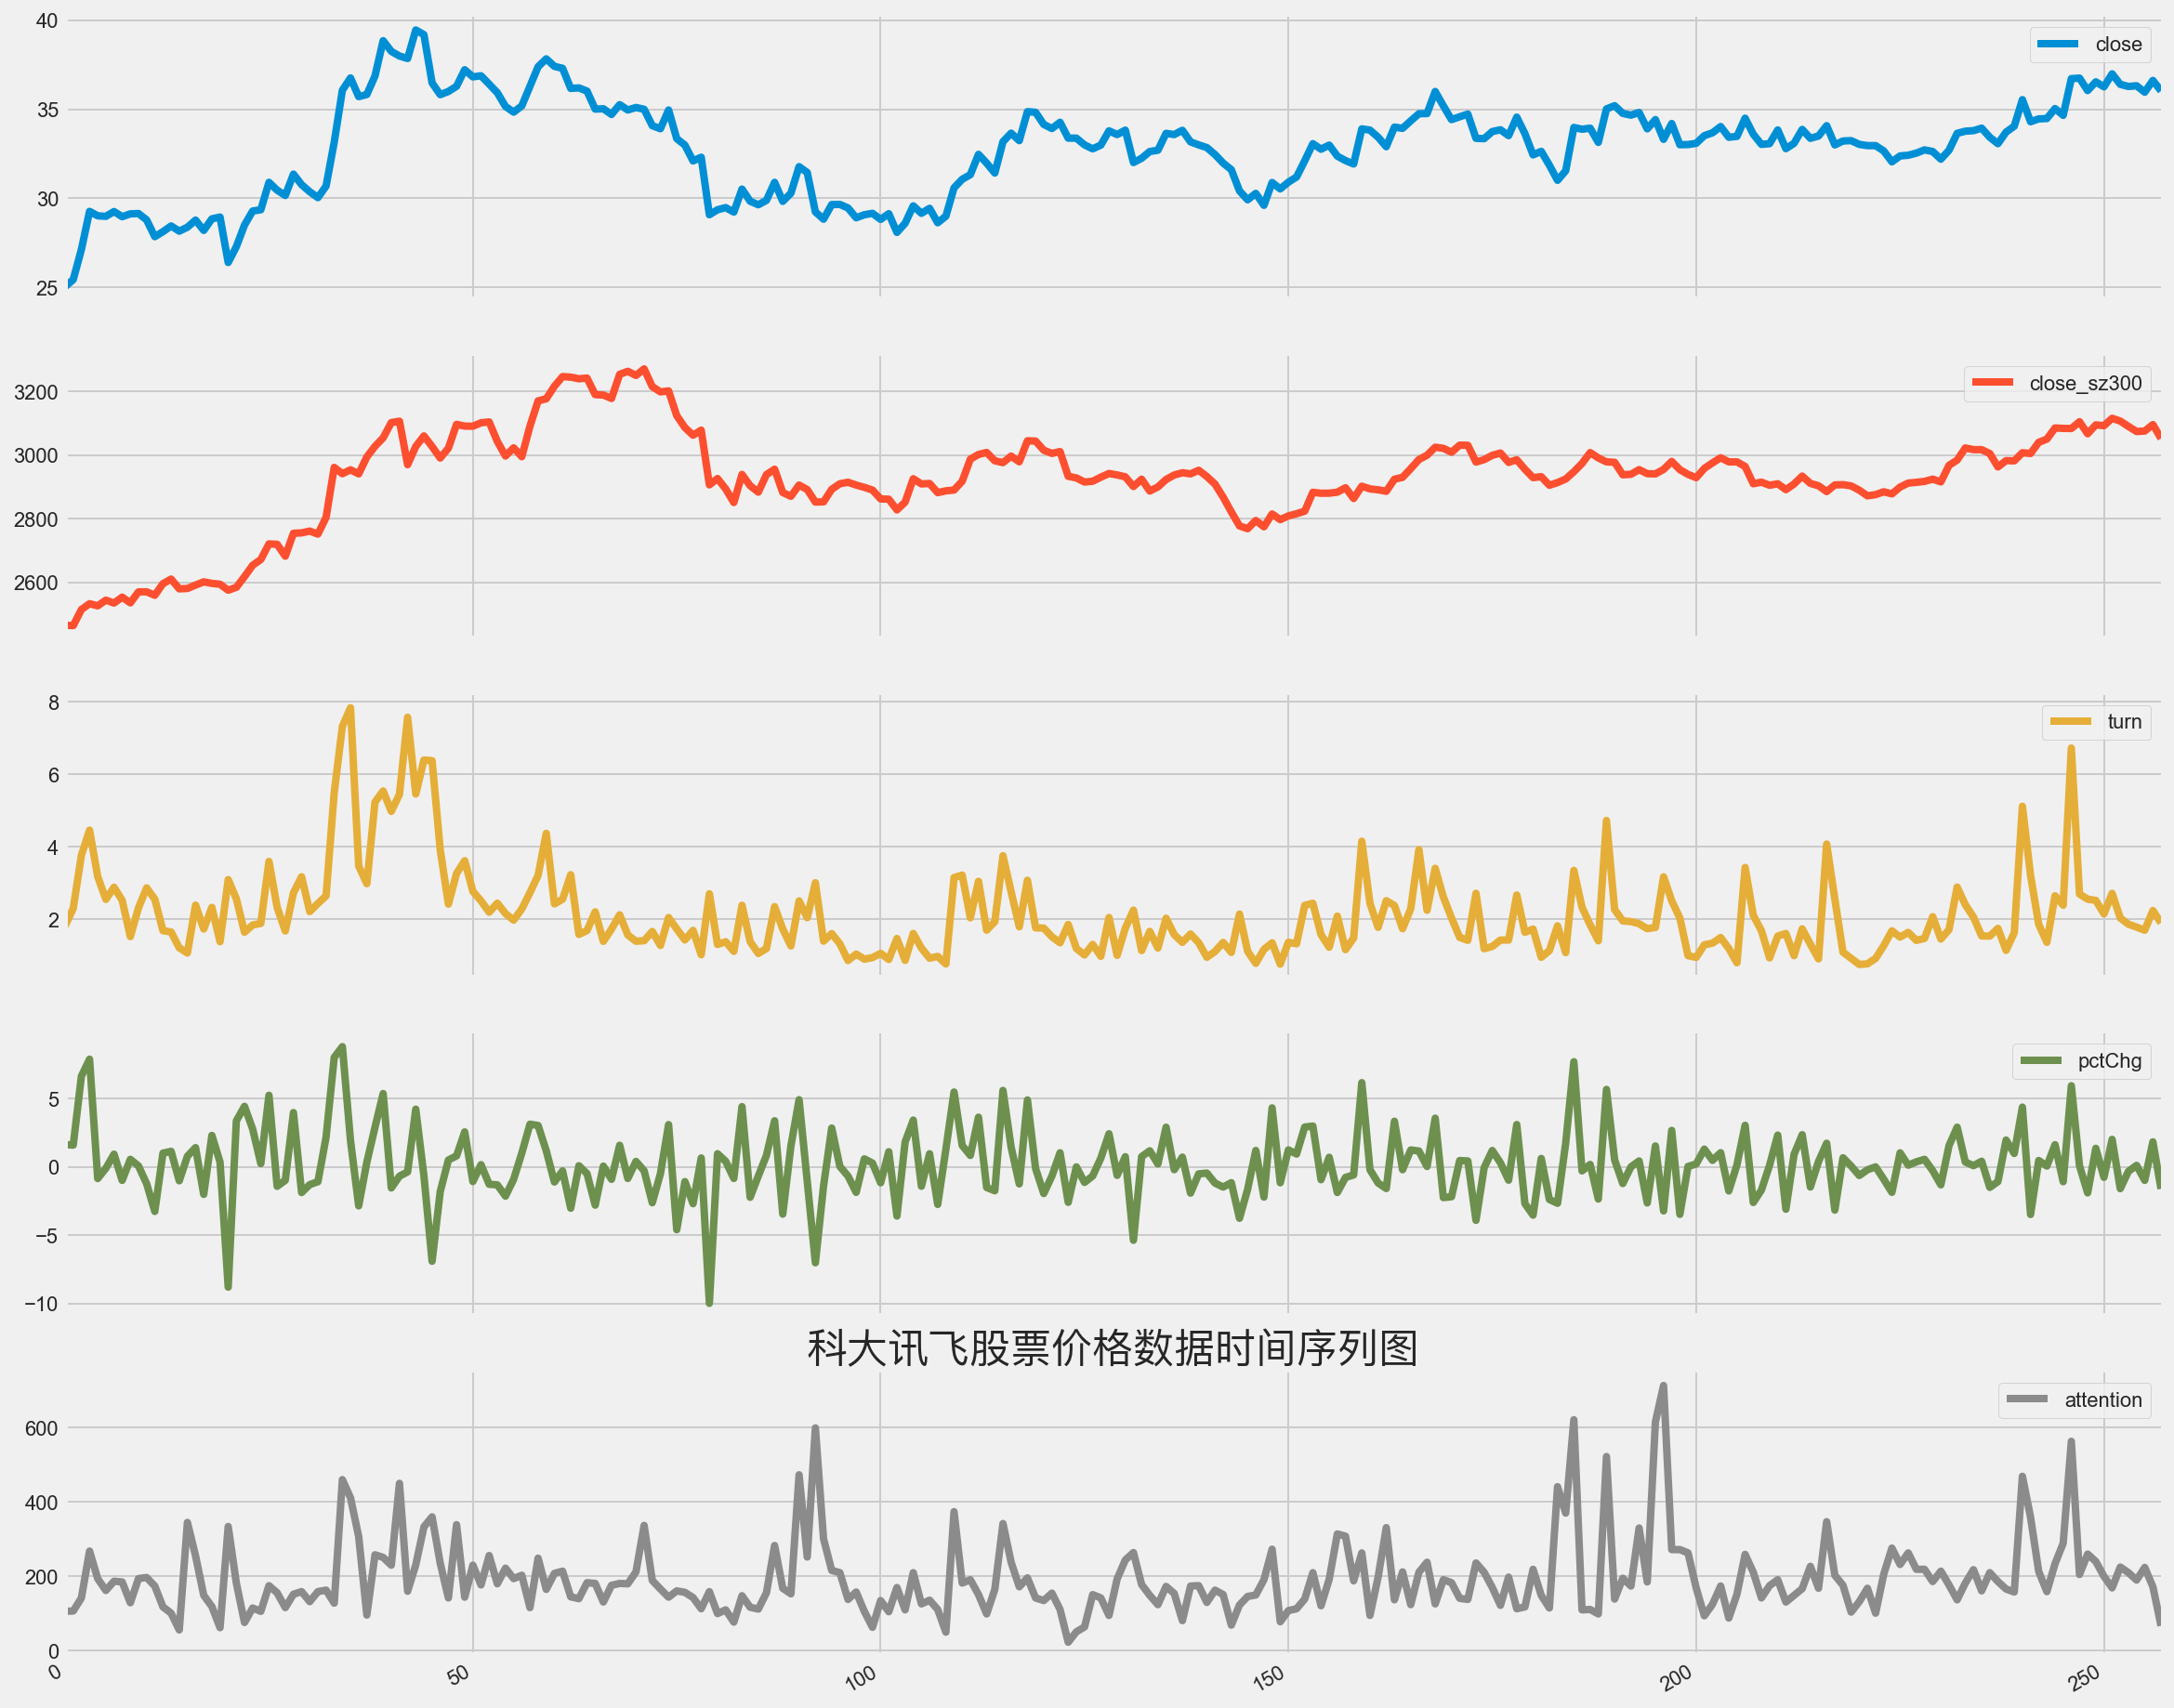

In [25]:
stock_plot(kdxf, '科大讯飞',col_name)

In [26]:
# kdxf['upordown'] = None
upordown = []
for pct in kdxf['pctChg']:
    if pct>0:
        upordown.append('1')
    else:
        upordown.append('-1')
        
kdxf['upordown'] = upordown
kdxf.head(3)

date  close      turn    pctChg  attention upordown  close_sz300  \
0  2019-01-02  25.04  1.805117  1.623383        106        1     2465.291   
1  2019-01-03  25.44  2.291008  1.597443        107        1     2464.362   
2  2019-01-04  27.13  3.758034  6.643076        142        1     2514.868   

      psTTM  pcfNcfTTM  
0  7.137286 -67.064552  
1  7.251300 -68.135871  
2  7.733009 -72.662192

In [27]:
# mkt_data = kdxf[['close', 'turn', 'pctChg','attention','upordown','close_sz300','psTTM','pcfNcfTTM']]
# mkt_data.to_csv('market_data.csv')

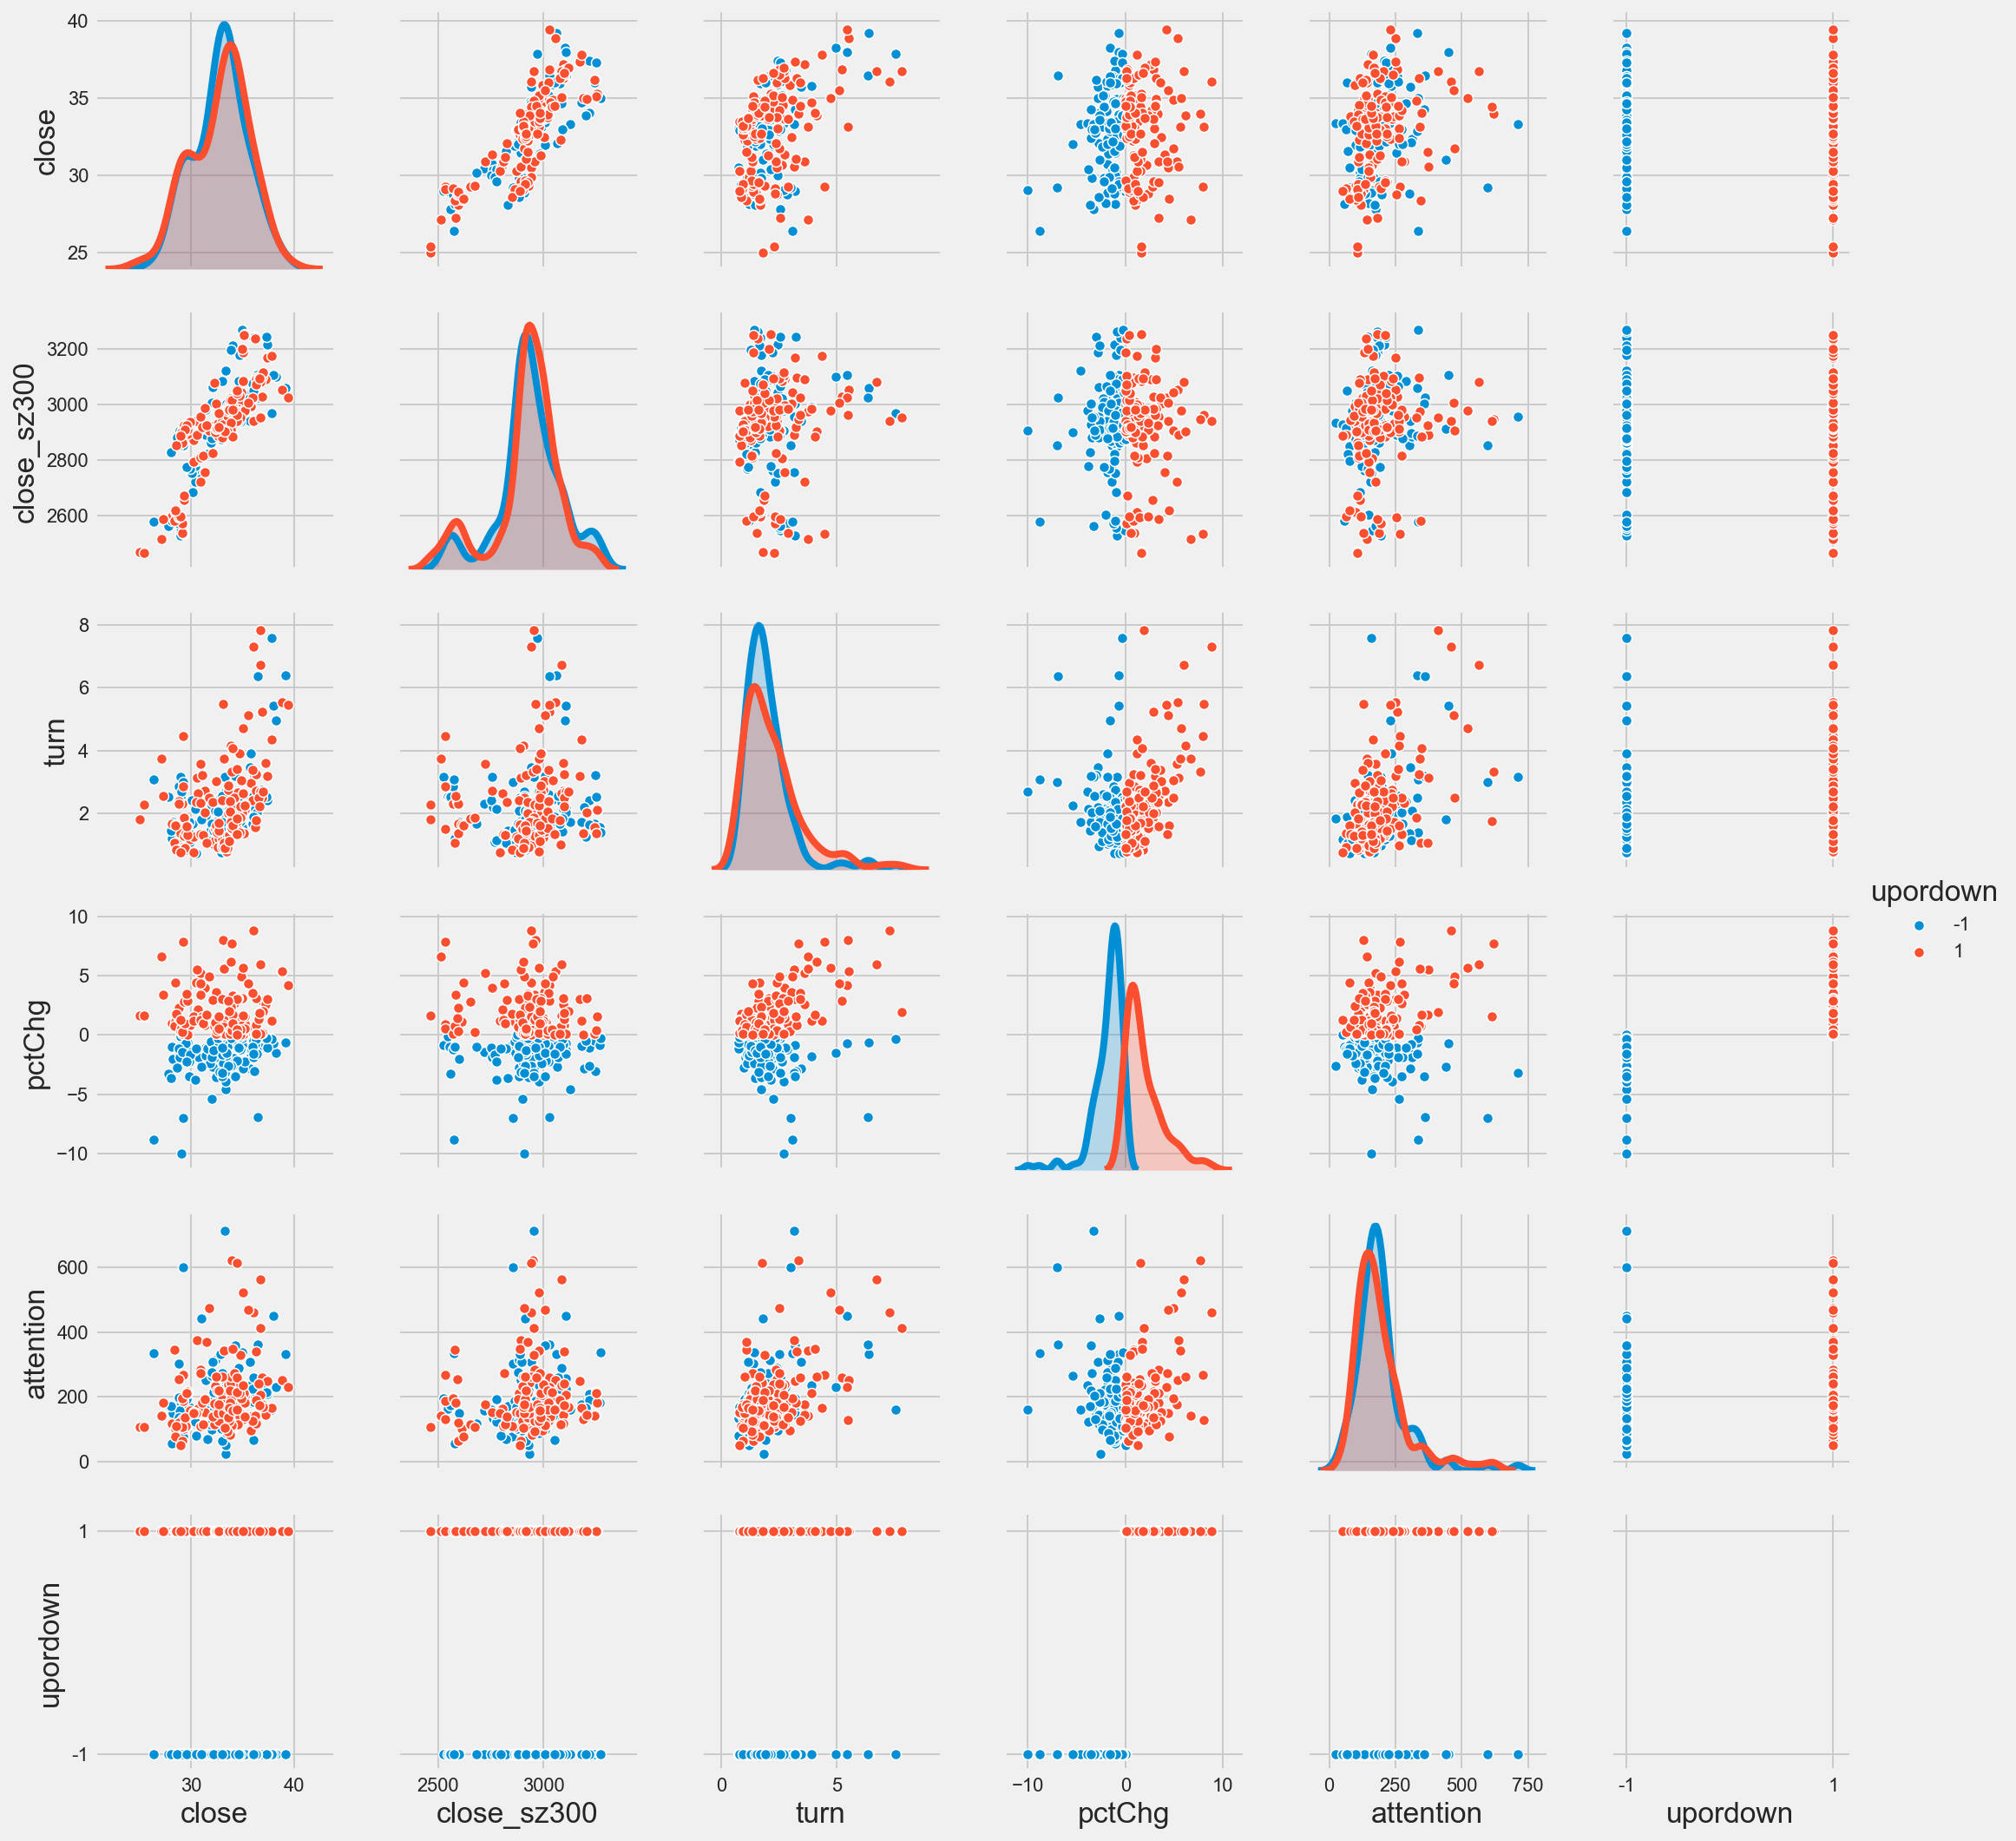

In [32]:
sns.pairplot(kdxf[['close', 'close_sz300','turn', 'pctChg','attention','upordown']], hue='upordown', size=2.5)
plt.show()

_volume_ and *turn* have a complete linear relationship, we can't keep both
*volume* and *amount* also have a strong linear pattern, also we have to choose one
since the *turn* has the smallest number, I decide to keep this feature

In [34]:
data = kdxf[['close','turn', 'pctChg','attention','upordown','close_sz300','psTTM','pcfNcfTTM']]

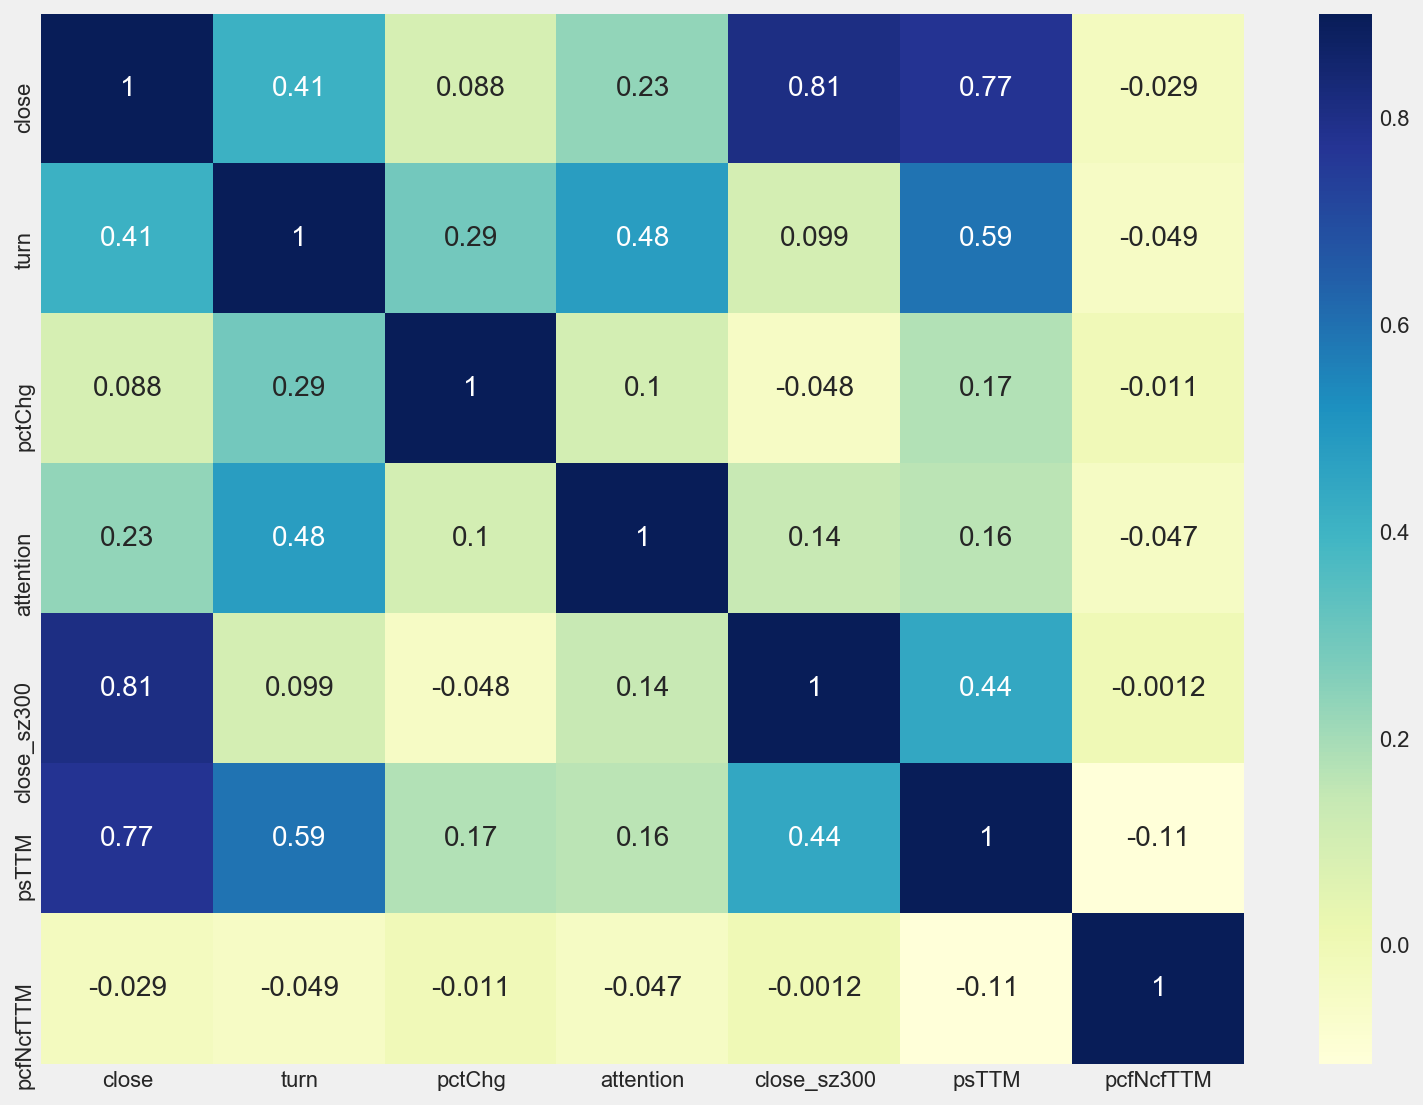

In [35]:
corrmat = data.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9,cmap="YlGnBu",annot=True)

In [36]:
def plot_diff(df):
    sns.set(style='ticks', context='poster')
    my_font = fm.FontProperties(fname="PingFang.ttc")
    kdxf_close = df[['close']]
    kdxf_close['diff_1'] = kdxf_close['close'].diff(1)

    kdxf_close['diff_2'] = kdxf_close['diff_1'].diff(1)

    # kdxf_close['diff_3'] = kdxf_close['diff_2'].diff(1)

    # kdxf_close['diff_4'] = kdxf_close['diff_3'].diff(1)

    kdxf_close.plot(subplots=True, figsize=(16, 20))

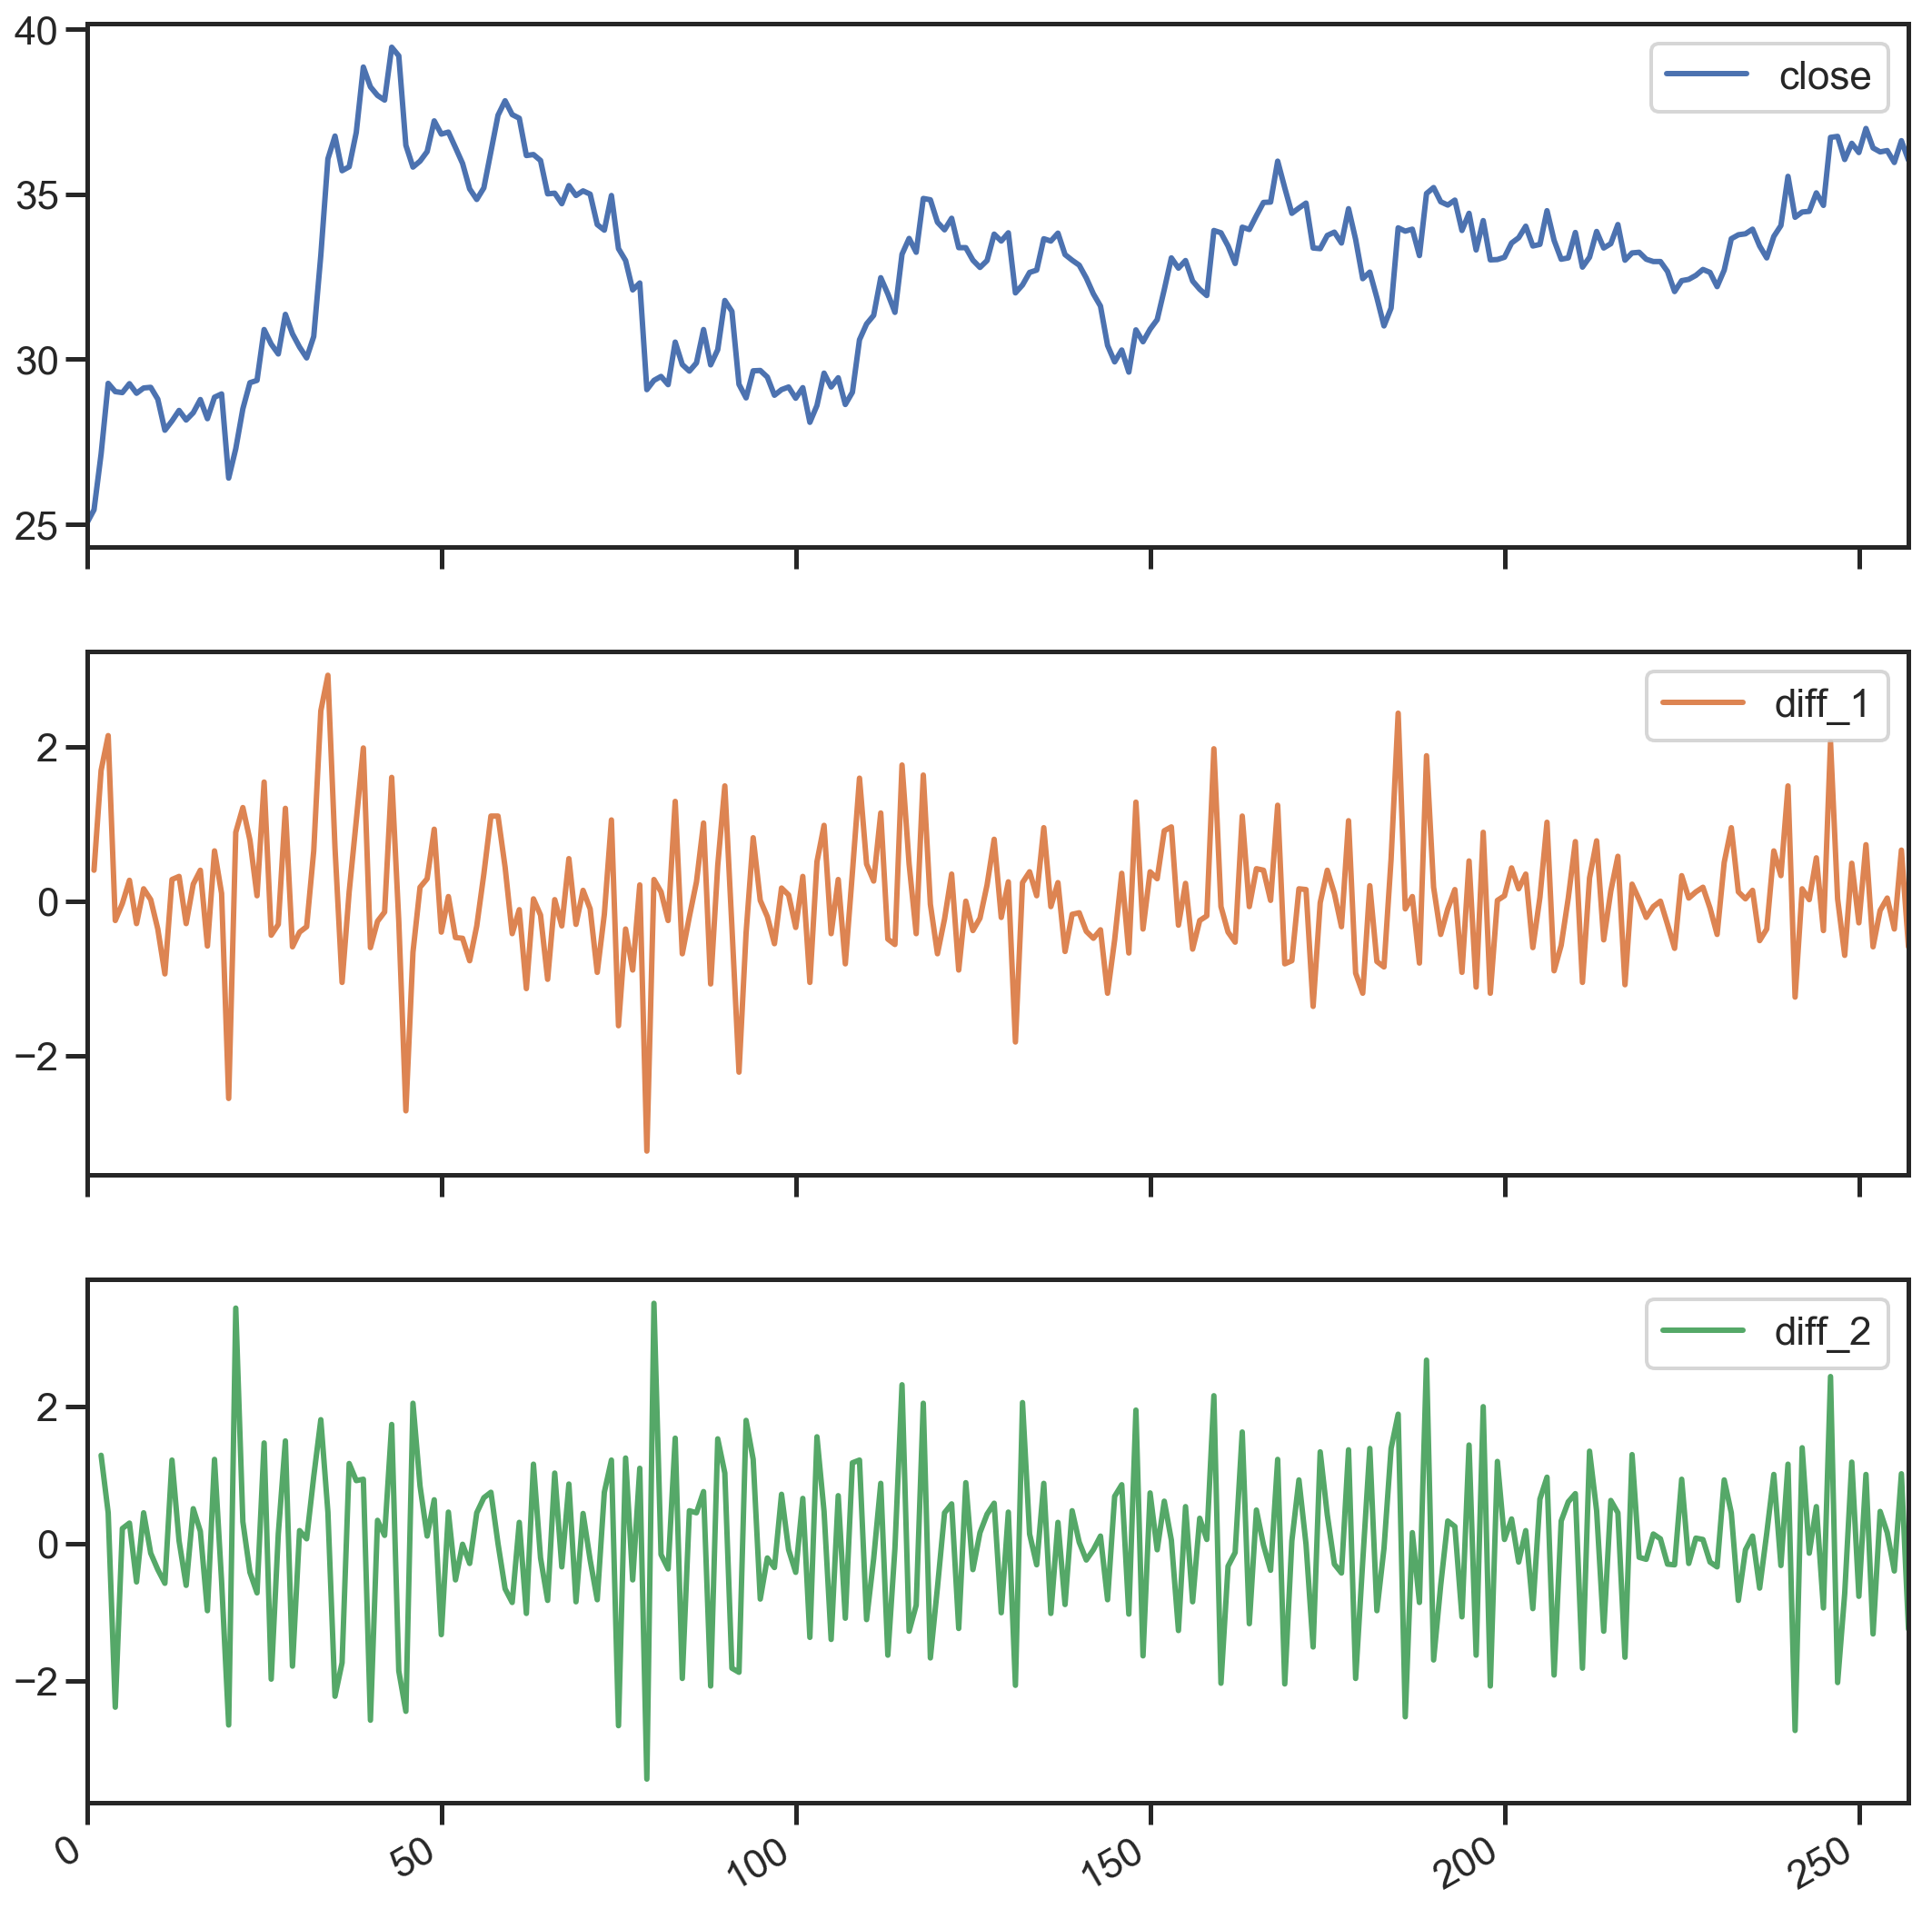

In [37]:
plot_diff(kdxf)

In [38]:
def acf_plot(df):
    sns.set(style='ticks', context='poster')
    fig = plt.figure(figsize=(12,8))

    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(df, lags=20,ax=ax1)
    ax1.xaxis.set_ticks_position('bottom')
    fig.tight_layout();

    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(df, lags=20, ax=ax2)
    ax2.xaxis.set_ticks_position('bottom')
    fig.tight_layout();
    # Partial Autocorrelation of closing price of kdxf stocks

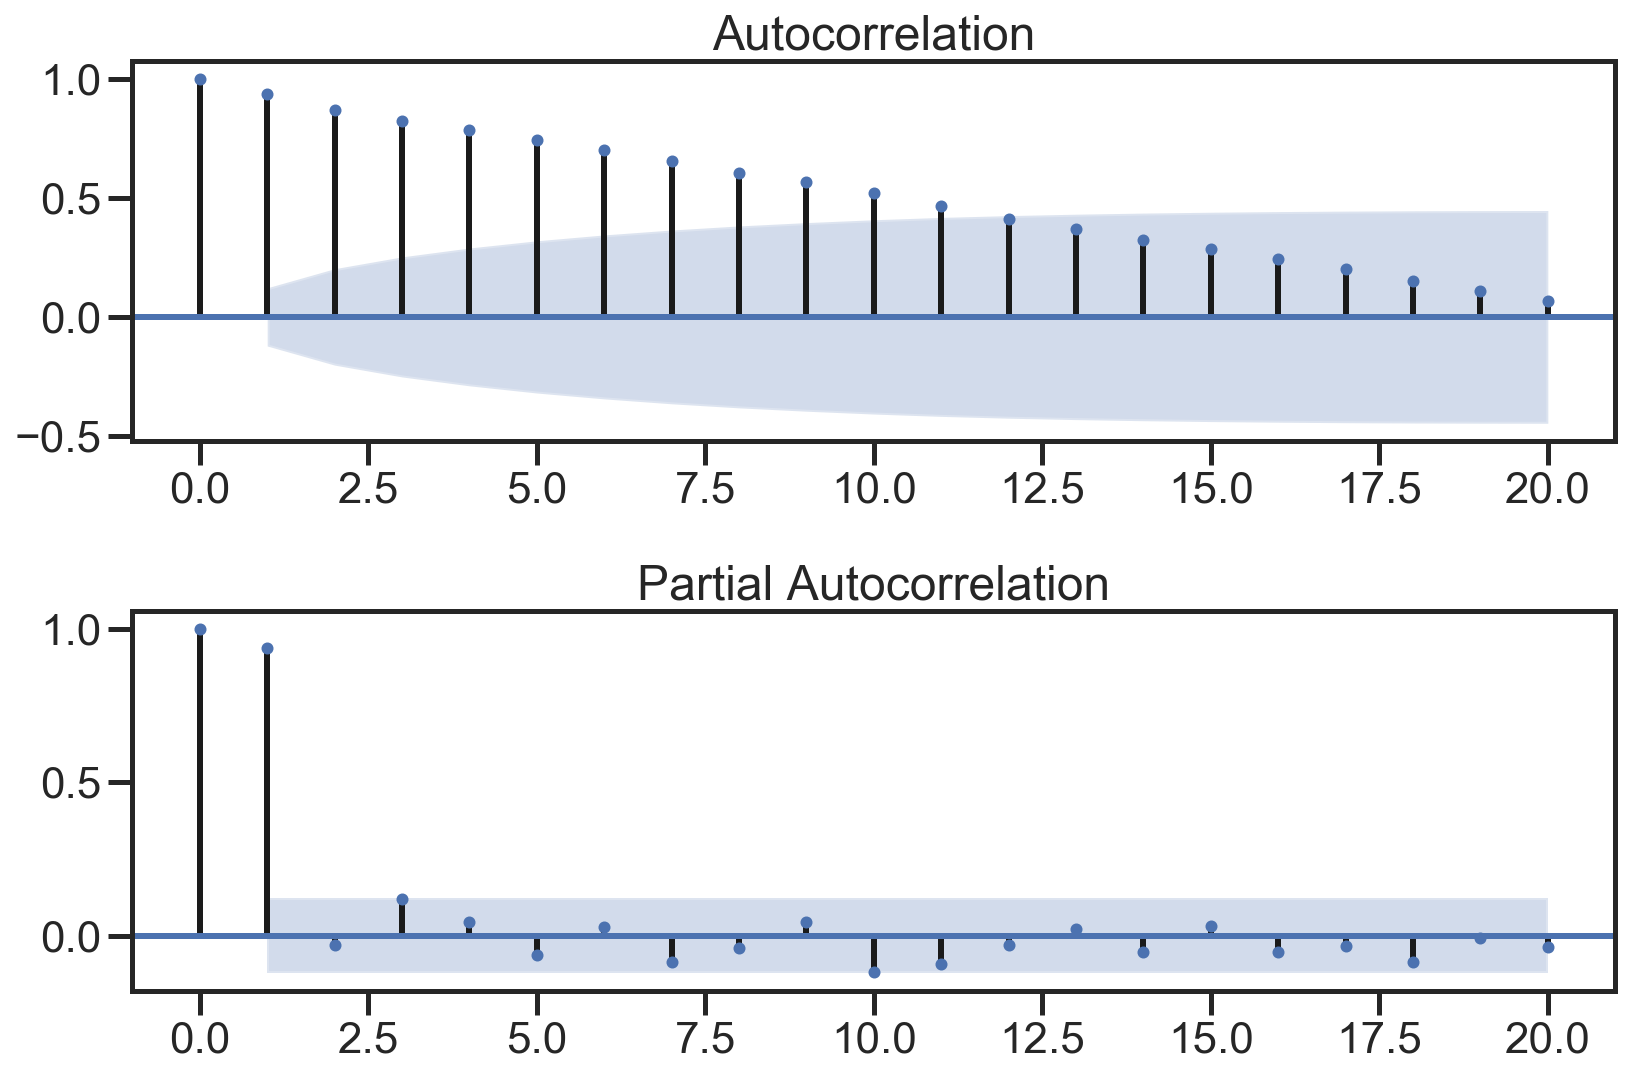

In [39]:
acf_plot(kdxf[['close']])

In [40]:
# 散点图也可以表示
def scater_stplt(df):
    lags=9

    ncols=3
    nrows=int(np.ceil(lags/ncols))
    sns.set(style='ticks', context='poster')
    fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(4*ncols, 4*nrows))

    kdxf_close = df[['close']]
#     kdxf_close['diff_1'] = kdxf_close['close'].diff(1)
#     kdxf_close['diff_2'] = kdxf_close['diff_1'].diff(1)
    for ax, lag in zip(axes.flat, np.arange(1,lags+1, 1)):
        lag_str = 't-{}'.format(lag)
        X = (pd.concat([kdxf_close, kdxf_close.shift(-lag)], axis=1,
                       keys=['y'] + [lag_str]).dropna())

        X.plot(ax=ax, kind='scatter', y='y', x=lag_str);
        corr = X.corr().as_matrix()[0][1]
        ax.set_ylabel('Original')
        ax.set_title('Lag: {} (corr={:.2f})'.format(lag_str, corr));
        ax.set_aspect('equal');
        sns.despine();

    fig.tight_layout();

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

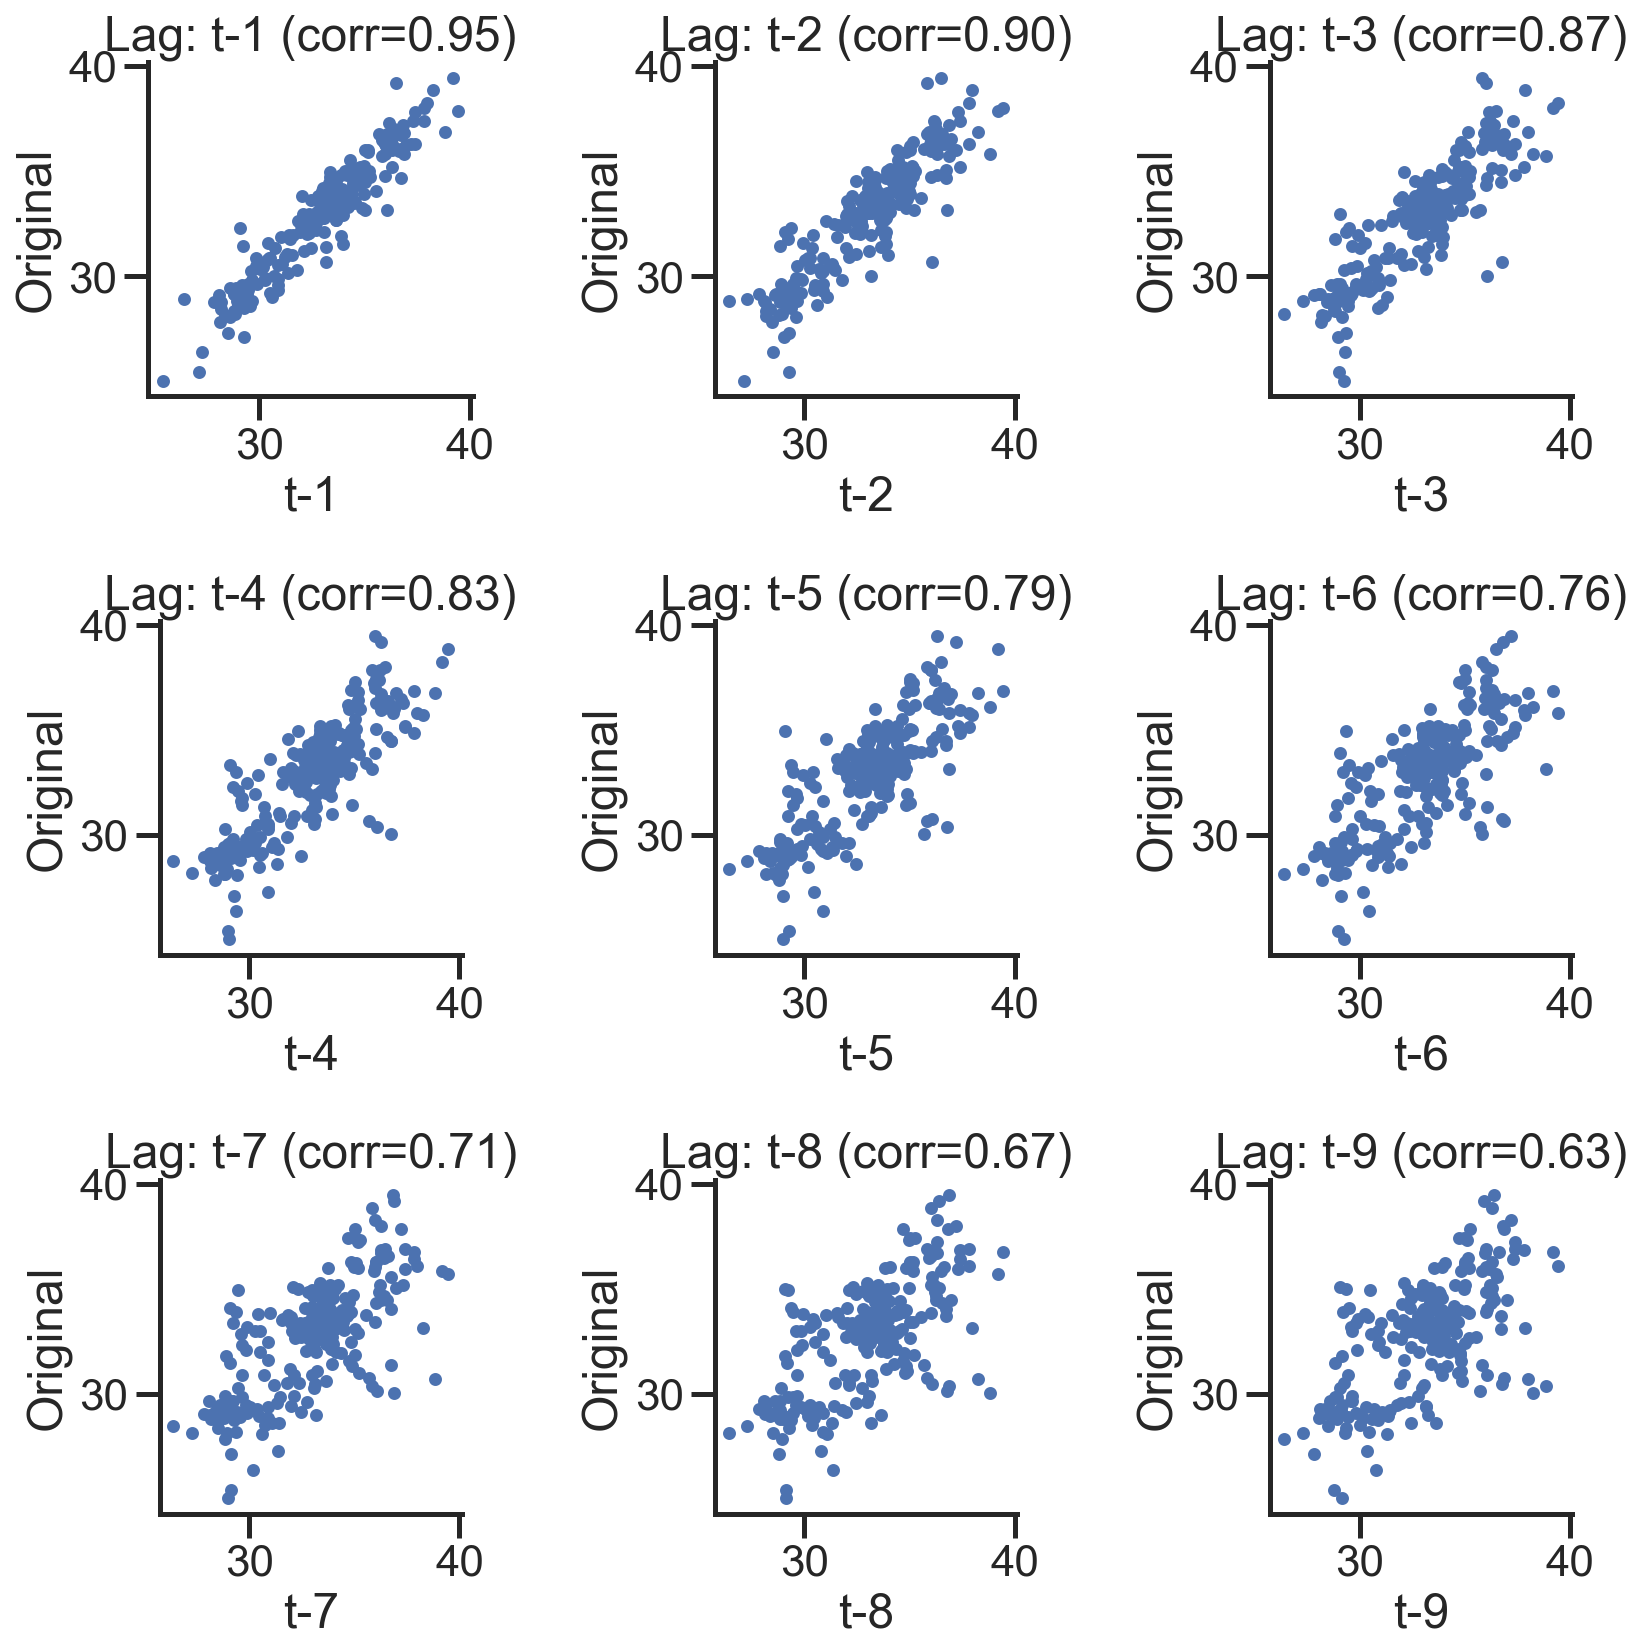

In [41]:
scater_stplt(kdxf)

### ARIMA models
An autoregressive integrated moving average (ARIMA) model is a generalization of an autoregressive moving average (ARMA) model. Both of these models are fitted to time series data either to better understand the data or to predict future points in the series (forecasting). ARIMA models are applied in some cases where data show evidence of non-stationarity, where an initial differencing step (corresponding to the "integrated" part of the model) can be applied one or more times to eliminate the non-stationarity. ARIMA model is of the form: ARIMA(p,d,q): p is AR parameter, d is differential parameter, q is MA parameter

ARIMA(1,0,0)<br>

$y_t = a_1y_{t-1} + ϵ_t$

ARIMA(1,0,1)<br>
$y_t = a_1y_{t-1} + ϵ_t + b_1ϵ_{t-1}$

ARIMA(1,1,1)<br>
$Δy_t = a_1Δy_{t-1} + ϵ_t + b_1ϵ_{t-1}$  <br>where $Δy_t = y_t - y_{t-1}$

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  256
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -374.574
Method:                       css-mle   S.D. of innovations              1.045
Date:                Fri, 03 Apr 2020   AIC                            755.147
Time:                        12:07:58   BIC                            765.783
Sample:                             1   HQIC                           759.425
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0039      0.045     -0.087      0.931      -0.093       0.085
ar.L1.D.y     -0.4462      0.056     -7.963      0.000      -0.556      -0.336
                                    Roots           

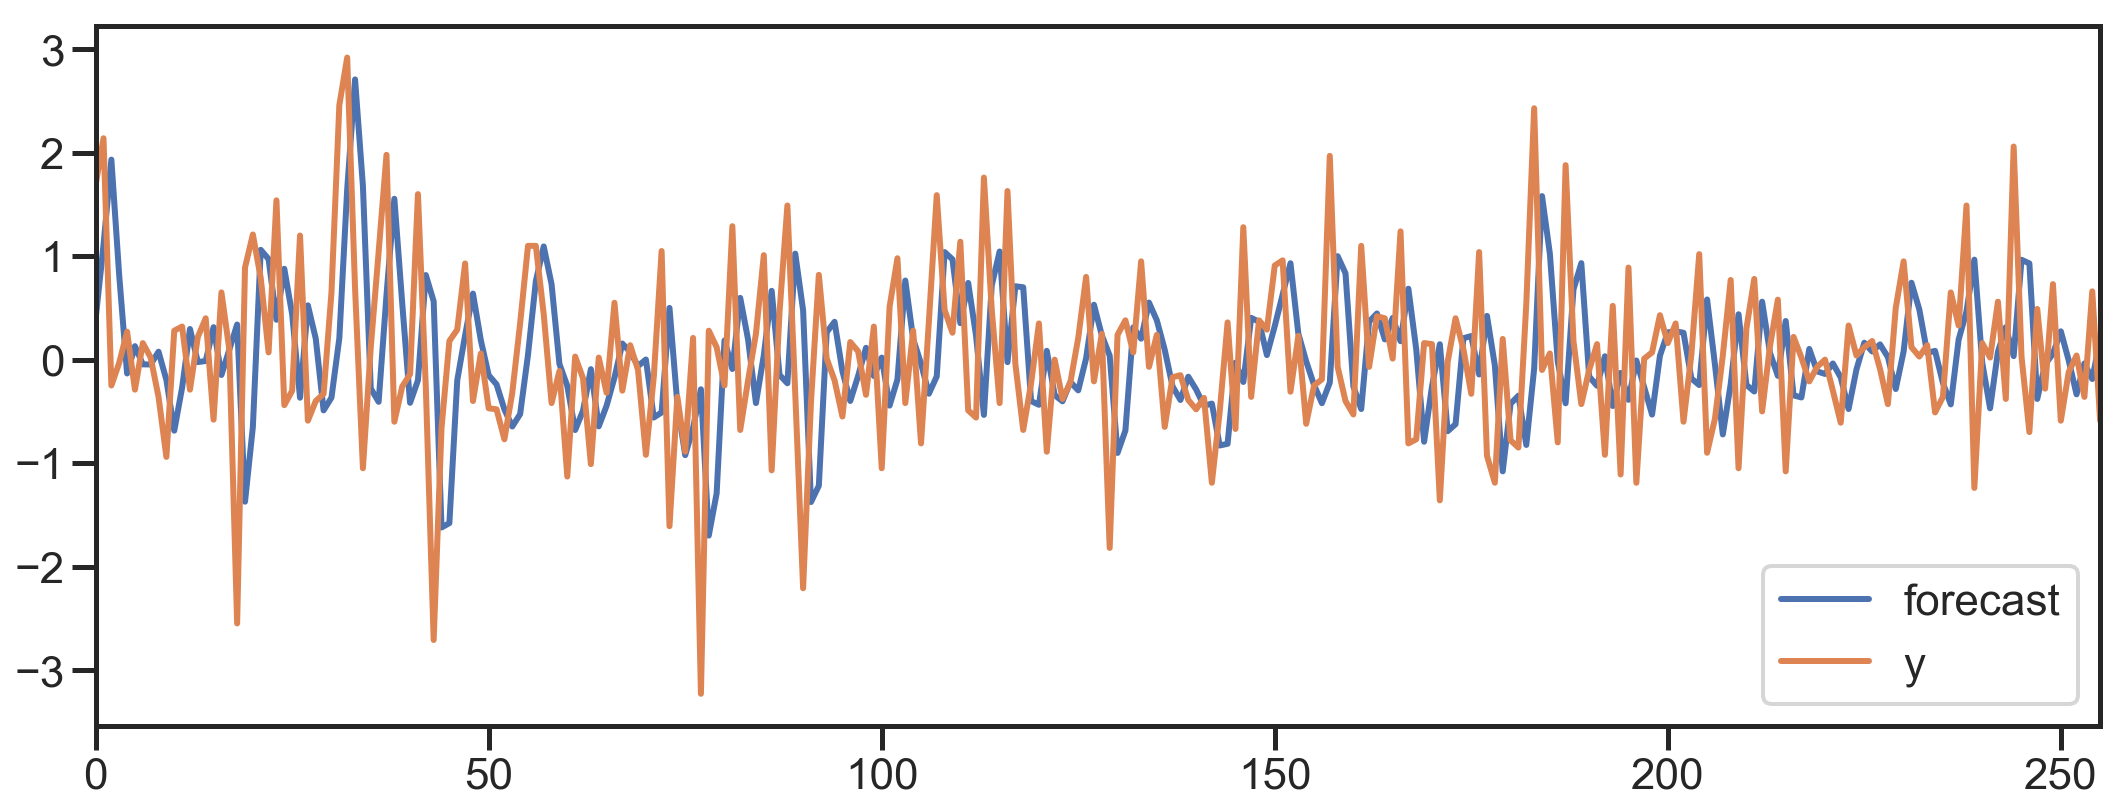

In [42]:
# Predicting the kdxf stocks close
rcParams['figure.figsize'] = 16, 6
model = ARIMA(kdxf["close"].diff().iloc[1:].values, order=(1,1,0))
result = model.fit()
print(result.summary())
# result.plot_predict(start=700, end=1000)
result.plot_predict()
plt.show()

In [58]:
rmse = math.sqrt(mean_squared_error(kdxf["close"].diff().iloc[1:257].values, result.predict(start=1,end=256)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 1.2480587874276359.


### Process Comments Data

In [215]:
comms_total=pd.read_csv('weibo_comms.csv')
del comms_total['usr']
comms_total.head()

date                                            content if_ori  \
0  2019-01-01  元旦回来只求一败，一个月时间盈利50点以上过春节。股魔独孤求败，纵横股市十馀载，以纳米指标为...    1.0   
1  2019-01-01  (1003)"半部论语治天下，三个如果赢A股"之一牛股的几个特点与几大关系。"几番起落，风云...    0.0   
2  2019-01-01  2019愿你又瘦又好看有钱还可爱，新的一年好运爆棚愿望通通实现加油!这是一条纯手动发的说话，...    1.0   
3  2019-01-01  我上传了一个视频 『川爸团队•祝福到』新的一年给您美好祝福科大讯飞川爸冠军团队教育微商全体成...    1.0   
4  2019-01-01  科大讯飞的叮咚智能语音音箱和天猫精灵同价位的比，音质都很渣；天猫精灵内容上比叮咚多很多；沟通...    1.0   

   thumbups  comments_num   numretweets     propn  
0         0              0            0  2.299559  
1         0              1           37  0.825483  
2         2              2            0  0.117926  
3         0              0            0  0.353778  
4         0              1            0  0.058963

In [216]:
comms_total.isnull().any()
# comms_total.fillna(0)

date             False
content          False
if_ori            True
thumbups         False
comments_num     False
numretweets      False
propn            False
dtype: bool

In [217]:
comms_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 7 columns):
date             19237 non-null object
content          19237 non-null object
if_ori           18387 non-null object
thumbups         19237 non-null int64
comments_num     19237 non-null int64
numretweets      19237 non-null int64
propn            19237 non-null float64
dtypes: float64(1), int64(3), object(3)
memory usage: 1.0+ MB


In [218]:
tweets_num =comms_total[['date', 'content']].groupby('date').count()
# .sort_values('content', ascending=False)
tweets_num.head()

content
date               
2019-01-01        9
2019-01-02       65
2019-01-03       58
2019-01-04       61
2019-01-05       38

<h2 style='color:coral'> Guba Comments Data Processing</h2>

In [219]:
def read_news_20(num):
    knews=pd.DataFrame()
    numls = 10*np.arange(num)[10:,]
    for num in numls:
        f_name = f'kdxf_news({num}, {num+10}).csv'
        news = pd.read_csv(f_name)
        knews = knews.append([news],ignore_index=True)
    return knews

In [220]:
def read_news(num):
    knews=pd.DataFrame()
    numls = 5*np.arange(num)[28:,]+np.ones(num-28, dtype=int)
    for num in numls:
        f_name = f'kdxf_news({num}, {num+4}).csv'
        news = pd.read_csv(f_name)
        knews = knews.append([news],ignore_index=True)
    return knews

In [221]:
k20=read_news_20(14)
k20.head()

title  \
0  一大早让我空喜一场。刚开始以为是业绩预报公告，很高兴，心想这下子终于兑现了！再往   
1                                     中标都没用   
2                          科大讯飞的主力病了，病的还不轻！   
3                                       垃圾股   
4                              36.40最后的加仓机会   

                                             content        date  
0  一大早让我空喜一场。刚开始以为是业绩预报公告，很高兴，心想这下子终于兑现了！再往下看，原来是...  2020-01-21  
1                                              中标都没用  2020-01-21  
2                                   科大讯飞的主力病了，病的还不轻！  2020-01-21  
3                                                垃圾股  2020-01-21  
4                                       36.40最后的加仓机会  2020-01-21

In [222]:
k20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3138 entries, 0 to 3137
Data columns (total 3 columns):
title      3138 non-null object
content    3066 non-null object
date       3138 non-null object
dtypes: object(3)
memory usage: 73.6+ KB


In [223]:
k20.drop_duplicates(keep='last', inplace=True)
k20.tail()

title  \
3133                          都说带着绿帽子滴发清漆滴干四托，只能自撸，自撸滴咧   
3134                            不管东方股肾是否打鸡血，他的存在，讯飞只能震荡   
3135                                  又中套路，利好机构出货，散户接单。   
3136                                                老套路   
3137  1、科大讯飞目前市盈率151，实际上就一个人工智能领域的高增长型企业来说在较为合理的范围之内...   

                                                content        date  
3133                          都说带着绿帽子滴发清漆滴干四托，只能自撸，自撸滴咧  2019-12-29  
3134                            不管东方股肾是否打鸡血，他的存在，讯飞只能震荡  2019-12-29  
3135                                            ，，，，，，，  2019-12-28  
3136                                        机构利好出货，散户埋单  2019-12-28  
3137  1、科大讯飞目前市盈率151，实际上就一个人工智能领域的高增长型企业来说在较为合理的范围之内...  2019-12-28

In [224]:
knews = read_news(380)
knews.head()

comments_num                                            content  \
0           0.0  风口来了，“猪”也能飞上天。八哥买股讲究天时地利人和，“天时”即为大势，“地利”为股价的技术...   
1          22.0  大家好，我是格菲大师兄Charlie，专注于上市公司和行业的深度研究，我还有六位师兄妹，他们...   
2           2.0                         俺听说带着绿帽子滴发清漆滴干四托，只能自撸，自撸滴咧   
3           0.0                                       要起飞了，火箭发射成功！   
4           4.0                       俺有件事始终不明白，俺天天撸干四托，它为何却咬阿凡达呢？   

         date                         title  
0  2019-12-28              风口来了，如何提前布局热点板块？  
1  2019-12-28             承包一年笑点的高科技股——科大讯飞  
2  2019-12-28    俺听说带着绿帽子滴发清漆滴干四托，只能自撸，自撸滴咧  
3  2019-12-28                  要起飞了，火箭发射成功！  
4  2019-12-28  俺有件事始终不明白，俺天天撸干四托，它为何却咬阿凡达呢？

In [225]:
knews.count()

comments_num     93877
content         131552
date            135139
title           135137
dtype: int64

In [226]:
# comms_total=comms_total.drop(comms_total[comms_total['发布工具']=="学习强国客户端"].index.tolist())
knews = knews.drop(knews[knews['content'].isnull()==True].index.tolist())

In [227]:
knews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131552 entries, 0 to 135138
Data columns (total 4 columns):
comments_num    91321 non-null float64
content         131552 non-null object
date            131552 non-null object
title           131550 non-null object
dtypes: float64(1), object(3)
memory usage: 5.0+ MB


In [228]:
knews['content'].isnull().any()

False

In [229]:
knews[knews['date']=='2019-01-01']

comments_num                                            content  \
30421           NaN                    这里的黎明静俏俏。爆发随时出发。看空就卖。看好就买。买卖自由。   
33364           NaN  看遍各种年末回顾，眼花缭乱，貌似逻辑都成立。但我想说，在外围新高不断的情况下，我们走出如此大...   
34190           NaN                                             新年吃灰狗。   
34191           NaN                                             新年吃灰狗。   
35418           NaN  看看笑话啦，世界第六聪明公司4美元不到价格，笑话看看啦。看看笑话啦，世界第六聪明公司4美元不...   
35467           NaN  科大讯飞 到底牛不牛？我想让各位用科大讯飞的技术来识别一下手镯上的文字。下图是我在多年前老家...   
35469           NaN  看空科大讯飞的，当时代抛弃你的时候，都不会和你说声再见。  看空科大讯飞的，当时代抛弃你的时...   
35471           NaN  2018年寒流在年底发威，2019年第一天阳光明媚气温己慢慢回暖！严寒过去，春天不会遥远。市...   
35482           NaN  新年会遇到的最大问题：中国式的妒忌，美国式的打压，使得无法在全球产品中有效落地，导致业绩长时...   
35495           NaN                                               飞不起来   

             date                                     title  
30421  2019-01-01           这里的黎明静俏俏。爆发随时出发。看空就卖。看好就买。买卖自由。  
33364  2019-01-01  看遍各种年末回顾，眼花缭乱，貌似逻辑都成立。但我想说，在外围新高不断的情况下，我  
34190  2019-01-01                                    新年吃灰狗。  
34191  2019-01-01                                    新年吃灰狗。  
35418  2019-01-01  看看笑话啦，世界第六聪明公司4美元不到价格，笑话看看啦。[大笑][大笑][大笑]  
35467  2019-01-01  科大讯飞 到底牛不牛？我想让各位用科大讯飞的技术来识别一下手镯上的文字。 下图是  
35469  2019-01-01  [大笑][大笑][大笑][大笑][大笑]看空科大讯飞的，当时代抛弃你的时候，都不  
35471  2019-01-01  2018年寒流在年底发威，2019年第一天阳光明媚气温己慢慢回暖！严寒过去，春天  
35482  2019-01-01  新年会遇到的最大问题：中国式的妒忌，美国式的打压，使得无法在全球产品中有效落地，  
35495  2019-01-01                                      飞不起来

### get comments' contents from 2019-01-01 to 2020-01-21

### get rid of data in other dates

In [230]:
knews[['date', 'comments_num']].groupby('date').count().sort_values(by=['date'],ascending=True).head()


comments_num
date                    
2011-08-21             1
2011-12-06             1
2012-09-06             1
2012-12-27             1
2013-05-29             1


### create index of dates

In [231]:
dr1 = pd.date_range(start='1/1/19', end='01/21/20').date
# type(dr1)
news_dat = [dr.strftime("%Y-%m-%d") for dr in dr1]
np.size(news_dat)

386

In [232]:
df_1=pd.concat([k20, knews], ignore_index=True)
df = pd.DataFrame()
# df.index = knews['date']
for dt in news_dat:
    df = df.append([df_1[df_1['date']==dt]],ignore_index=True)

df.head(3)

comments_num                                            content  \
0           NaN                    这里的黎明静俏俏。爆发随时出发。看空就卖。看好就买。买卖自由。   
1           NaN  看遍各种年末回顾，眼花缭乱，貌似逻辑都成立。但我想说，在外围新高不断的情况下，我们走出如此大...   
2           NaN                                             新年吃灰狗。   

         date                                     title  
0  2019-01-01           这里的黎明静俏俏。爆发随时出发。看空就卖。看好就买。买卖自由。  
1  2019-01-01  看遍各种年末回顾，眼花缭乱，貌似逻辑都成立。但我想说，在外围新高不断的情况下，我  
2  2019-01-01                                    新年吃灰狗。

In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37277 entries, 0 to 37276
Data columns (total 4 columns):
comments_num    382 non-null float64
content         37206 non-null object
date            37277 non-null object
title           37275 non-null object
dtypes: float64(1), object(3)
memory usage: 1.1+ MB


In [234]:
df.drop_duplicates(keep='last', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36558 entries, 0 to 37276
Data columns (total 4 columns):
comments_num    359 non-null float64
content         36487 non-null object
date            36558 non-null object
title           36556 non-null object
dtypes: float64(1), object(3)
memory usage: 1.4+ MB


In [235]:
df.sort_values(by=['date'],ascending=True)
df.tail(3)

comments_num                                            content  \
37274           NaN                                 只要做评价的都是小散户，还有不懂股票   
37275           NaN  不久前，延边大学发布公告称，拟清退136名攻读硕士和博士的学生，原因是这些学生没有在学校规定...   
37276           NaN  作者：卓利伟 高毅资产首席研究官1、时间是每个人唯一稀缺的资产做研究最为重要的是时间管理，我...   

             date                        title  
37274  2020-01-21           只要做评价的都是小散户，还有不懂股票  
37275  2020-01-21     还想混日子？清华等多所高校清退1300多名研究生  
37276  2020-01-21  一份顶尖私募的内部培训笔记：时间是每个人唯一稀缺的资产

In [236]:
# kdxf= pd.merge(kdxf,df[['date', 'content']].groupby(['date']).count()['content'],left_index=True,right_index=True)
# kdxf['attention'] = kdxf['content']
# del kdxf['content_y']
# kdxf.head(3)

In [237]:
df.head(4)

comments_num                                            content  \
0           NaN                    这里的黎明静俏俏。爆发随时出发。看空就卖。看好就买。买卖自由。   
1           NaN  看遍各种年末回顾，眼花缭乱，貌似逻辑都成立。但我想说，在外围新高不断的情况下，我们走出如此大...   
3           NaN                                             新年吃灰狗。   
4           NaN  看看笑话啦，世界第六聪明公司4美元不到价格，笑话看看啦。看看笑话啦，世界第六聪明公司4美元不...   

         date                                     title  
0  2019-01-01           这里的黎明静俏俏。爆发随时出发。看空就卖。看好就买。买卖自由。  
1  2019-01-01  看遍各种年末回顾，眼花缭乱，貌似逻辑都成立。但我想说，在外围新高不断的情况下，我  
3  2019-01-01                                    新年吃灰狗。  
4  2019-01-01  看看笑话啦，世界第六聪明公司4美元不到价格，笑话看看啦。[大笑][大笑][大笑]

In [238]:
# df[df['comments_num'].isnull()==True]['comments_num'].index.tolist()
# = np.zeros(34017, dtype=int)
df= df.fillna(0)
df.tail(3)

comments_num                                            content  \
37274           0.0                                 只要做评价的都是小散户，还有不懂股票   
37275           0.0  不久前，延边大学发布公告称，拟清退136名攻读硕士和博士的学生，原因是这些学生没有在学校规定...   
37276           0.0  作者：卓利伟 高毅资产首席研究官1、时间是每个人唯一稀缺的资产做研究最为重要的是时间管理，我...   

             date                        title  
37274  2020-01-21           只要做评价的都是小散户，还有不懂股票  
37275  2020-01-21     还想混日子？清华等多所高校清退1300多名研究生  
37276  2020-01-21  一份顶尖私募的内部培训笔记：时间是每个人唯一稀缺的资产

In [239]:
del df['title']
df.head(4)

comments_num                                            content        date
0           0.0                    这里的黎明静俏俏。爆发随时出发。看空就卖。看好就买。买卖自由。  2019-01-01
1           0.0  看遍各种年末回顾，眼花缭乱，貌似逻辑都成立。但我想说，在外围新高不断的情况下，我们走出如此大...  2019-01-01
3           0.0                                             新年吃灰狗。  2019-01-01
4           0.0  看看笑话啦，世界第六聪明公司4美元不到价格，笑话看看啦。看看笑话啦，世界第六聪明公司4美元不...  2019-01-01

In [240]:
df[['date','comments_num',]].groupby('date').count().head()

comments_num
date                    
2019-01-01             9
2019-01-02            40
2019-01-03            49
2019-01-04            82
2019-01-05            13

In [241]:
comms = pd.concat([comms_total,df],axis=0,join='outer',join_axes=[comms_total.columns],ignore_index=False)
comms.sample(3)

date                                            content if_ori  \
27038  2019-10-28                              我草卖了就涨对不起大家了要卖这个垃圾就好了    NaN   
17167  2019-12-08  希望一个很有意思的，很酷的技术，能够让他广泛的应用，这是工作，创业，的一个科学原理。当你接触...   True   
17336  2019-12-11  科大讯飞董事长刘庆峰作主题演讲  \n原始用户 平度发布\n转发内容 #宣理弘德# 科大讯飞...  False   

       thumbups  comments_num   numretweets     propn  
27038       NaN            NaN          NaN       NaN  
17167       0.0            1.0          0.0  0.058963  
17336       0.0            0.0          1.0  0.058963

In [242]:
comms[comms['date'].isnull()==True]

Empty DataFrame
Columns: [date, content, if_ori, thumbups, comments_num , numretweets, propn]
Index: []

In [243]:
comms.head()

date                                            content if_ori  \
0  2019-01-01  元旦回来只求一败，一个月时间盈利50点以上过春节。股魔独孤求败，纵横股市十馀载，以纳米指标为...    1.0   
1  2019-01-01  (1003)"半部论语治天下，三个如果赢A股"之一牛股的几个特点与几大关系。"几番起落，风云...    0.0   
2  2019-01-01  2019愿你又瘦又好看有钱还可爱，新的一年好运爆棚愿望通通实现加油!这是一条纯手动发的说话，...    1.0   
3  2019-01-01  我上传了一个视频 『川爸团队•祝福到』新的一年给您美好祝福科大讯飞川爸冠军团队教育微商全体成...    1.0   
4  2019-01-01  科大讯飞的叮咚智能语音音箱和天猫精灵同价位的比，音质都很渣；天猫精灵内容上比叮咚多很多；沟通...    1.0   

   thumbups  comments_num   numretweets     propn  
0       0.0            0.0          0.0  2.299559  
1       0.0            1.0         37.0  0.825483  
2       2.0            2.0          0.0  0.117926  
3       0.0            0.0          0.0  0.353778  
4       0.0            1.0          0.0  0.058963

In [253]:
# comms[comms['if_ori']==True]=np.ones(len(comms[comms['if_ori']==True]))
# comms['if_ori'][comms['if_ori']==False]=np.zeros(len(comms[comms['if_ori']==False]))
comms.sample(5)

date                                            content if_ori  \
5310   2019-04-19  #东方财富#科大讯飞(002230.SZ)2018年净利润升24.71%至5.42亿元科大讯...    1.0   
7110   2019-05-23  黑名單與備胎美国彭博社22日早些时候报道称，知情人士透露，美国正在考虑将杭州海康威视数字技术...    1.0   
15694  2019-11-09  #锦江时光# 【⚡迎新晚会⚡】文学与传媒学院、计算机学院、人工智能科大讯飞学院联合举办的“2...    1.0   
30526  2019-12-03            股婶通行证上都要加盖“假如”两字印章才有效。注意，凡没有假如二字的，都不算股婶      1   
30833  2019-12-05                              昨天是哪个说科大讯飞弄虚做假的？出来再说下      1   

       thumbups  comments_num   numretweets     propn  
5310        4.0            0.0          0.0  0.058963  
7110        6.0            0.0          0.0  0.117926  
15694       9.0            1.0          0.0  0.058963  
30526       0.0            NaN          0.0  0.000000  
30833       0.0            NaN          0.0  0.000000

In [261]:
comms=comms.drop(comms[comms['date']==1].index.tolist())
comms['if_ori'] = comms['if_ori'].fillna(float(1.0))
comms[['thumbups','numretweets','propn']] = comms[['thumbups','numretweets','propn']].fillna(float(0.0))
comms.fillna(0)
comms.sample(10)

date                                            content if_ori  \
16699  2019-07-01                                               飞了飞了      1   
8461   2019-03-30       天天关心科大讯飞的股票，倒不如你去尝试一下讯飞输入法。就目前来讲，讯飞输入法是最好用的。      1   
25751  2019-10-22                            至少跌2个月，每天跌一点，这比就这样，傻逼公司      1   
13533  2019-05-25  一家企业的管理层过渡的关心股价是一件非常危险的游戏，乐视网，康美药业，包括长生制药最后闹出问...      1   
17671  2019-07-17  来源：证券时报网  　　中信证券指出，AI战略2.0聚焦产品化、经营质量与人均毛利，公司收入...      1   
2954   2019-02-17  海通证券认为，在人工智能领域，科创板的潜在热门公司主要包括寒武纪、优必选、旷视科技、云从科技...      1   
5199   2019-04-17                    //@飞马537//@TYJ田家村--暗色斯图卡//@安西杂谈    0.0   
592    2019-01-10                                         今天6万卖在了最高点      1   
6021   2019-05-12  市场消息面：1.人工智能项目指南和细则即将发布，行业有望迎来风口人工智能概念股：中科信息（3...    1.0   
25363  2019-10-18                                              融资盘出货      1   

       thumbups  comments_num   numretweets     propn cleaned_contents  
16699       0.0            NaN          0.0  0.000000             None  
8461        0.0            NaN          0.0  0.000000             None  
25751       0.0            NaN          0.0  0.000000             None  
13533       0.0            NaN          0.0  0.000000             None  
17671       0.0            NaN          0.0  0.000000             None  
2954        0.0            NaN          0.0  0.000000             None  
5199        0.0            1.0          0.0  0.058963             None  
592         0.0            NaN          0.0  0.000000             None  
6021        1.0            0.0          0.0  0.058963             None  
25363       0.0            NaN          0.0  0.000000             None

In [263]:
comms.drop_duplicates(keep='last', inplace=True)

In [264]:
comms.count()

date                54247
content             54247
if_ori              54247
thumbups            54247
comments_num        17994
numretweets         54247
propn               54247
cleaned_contents        0
dtype: int64

In [265]:
comms=comms.drop(comms[comms['content']==0].index.tolist())

In [266]:
comms[comms['content']==0]

Empty DataFrame
Columns: [date, content, if_ori, thumbups, comments_num , numretweets, propn, cleaned_contents]
Index: []

In [267]:
comms['content'].count()

54247

In [268]:
comms['cleaned_contents'] = None
cleaned_contents=[]

In [269]:
for com in comms['content']:
    try:
        if len(com)>=100:
            com=com[:101]
        elif len(com)<=50:
            com = com[:36]
        cleaned_contents.append(com)
    except:
        print(f"fail to read : {com}")
    
#     print(type(com))

In [270]:
len(cleaned_contents)

54247

In [271]:
# cleaned_contents.append(comms['content'].loc[0].values[0][:36])
comms['cleaned_contents'] = cleaned_contents
del comms['content']

In [272]:
comms['cleaned_contents'].head(10)

0    元旦回来只求一败，一个月时间盈利50点以上过春节。股魔独孤求败，纵横股市十馀载，以纳米指标为...
1    (1003)"半部论语治天下，三个如果赢A股"之一牛股的几个特点与几大关系。"几番起落，风云...
2    2019愿你又瘦又好看有钱还可爱，新的一年好运爆棚愿望通通实现加油!这是一条纯手动发的说话，...
3    我上传了一个视频 『川爸团队•祝福到』新的一年给您美好祝福科大讯飞川爸冠军团队教育微商全体成...
4    科大讯飞的叮咚智能语音音箱和天猫精灵同价位的比，音质都很渣；天猫精灵内容上比叮咚多很多；沟通...
5    转发微博//@斯威汽车#SWM斯威X7互联版#科大讯飞智能语音控制系统，为用户带来便捷的智能...
6    #口袋神器# 华为，大疆，科大讯飞……欣喜看到这些自主品牌完胜竞品，去年十月美国用大疆的Os...
7               索菲亚和科大讯飞的AI已经能理解了  \n原始用户 爱可可-爱生活\n转发内
8    #字述一年# 我是@科大讯飞 ，2018年就是一个字：智。【VIVI积极扩散，期待好运哦】！...
9    1、         今日超大单：上证（000001）-9.35亿、深成（399001）-1...
Name: cleaned_contents, dtype: object

In [273]:
comms.head()

date if_ori  thumbups  comments_num   numretweets     propn  \
0  2019-01-01    1.0       0.0            0.0          0.0  2.299559   
1  2019-01-01    0.0       0.0            1.0         37.0  0.825483   
2  2019-01-01    1.0       2.0            2.0          0.0  0.117926   
3  2019-01-01    1.0       0.0            0.0          0.0  0.353778   
4  2019-01-01    1.0       0.0            1.0          0.0  0.058963   

                                    cleaned_contents  
0  元旦回来只求一败，一个月时间盈利50点以上过春节。股魔独孤求败，纵横股市十馀载，以纳米指标为...  
1  (1003)"半部论语治天下，三个如果赢A股"之一牛股的几个特点与几大关系。"几番起落，风云...  
2  2019愿你又瘦又好看有钱还可爱，新的一年好运爆棚愿望通通实现加油!这是一条纯手动发的说话，...  
3  我上传了一个视频 『川爸团队•祝福到』新的一年给您美好祝福科大讯飞川爸冠军团队教育微商全体成...  
4  科大讯飞的叮咚智能语音音箱和天猫精灵同价位的比，音质都很渣；天猫精灵内容上比叮咚多很多；沟通...

In [274]:
comms.to_csv('news_data.csv',index=False)

In [213]:
# kdxf= pd.merge(kdxf,comms[['date','cleaned_contents']].groupby('date').count(),left_index = True, right_index = True)
# kdxf.head()

In [214]:
#  # comms['attention'] = None
# kdxf['attention'] = kdxf['cleaned_contents']
# del kdxf['cleaned_contents']
# kdxf.head(3)

### Sentiment Analysis

In [3]:
import pandas as pd
comms=pd.read_csv('news_data.csv')
comms['sentiment'] = None

In [ ]:
import senti as ST
import numpy as np
for i in 10*np.arange(int(len(comms['cleaned_contents'])/10 + 1))[:,]:
    try:
#         sentiment = ST.get_label(comms['content'].iloc[i:i+10,])
#         senti.extend(sentiment)
        comms['sentiment'].iloc[i:i+10,] = ST.get_label(comms['cleaned_contents'].iloc[i:i+10,])
        print("\n-----page",int(i/10),"---------\n")
        #     print(senti)
    except:
        print(f"\n-- page {i}-{i+10} fail to read\n")

元旦回来只求一败，一个月时间盈利50点以上过春节。股魔独孤求败，纵横股市十馀载，以纳米指标为友，其操盘手法犀利，快、准、狠、稳，我将以每天战绩令世人惊叹！正元智慧，恒立实业，贵州茅台，上证指数，上证50 
 1 
--------------------
(1003)"半部论语治天下，三个如果赢A股"之一牛股的几个特点与几大关系。"几番起落，风云振作，赶他个天时地利与人和"。资本市场的兴旺，必将造就更多华为·腾讯·阿里巴巴，小米·联想·大族激光，东软·浪 
 1 
--------------------
2019愿你又瘦又好看有钱还可爱，新的一年好运爆棚愿望通通实现加油!这是一条纯手动发的说话，感谢科大讯飞提供文本支持，感谢腾讯网提供技术支持，感谢小米集团提供硬件支持！  原图  
 1 
--------------------
我上传了一个视频 『川爸团队•祝福到』新的一年给您美好祝福科大讯飞川爸冠军团队教育微商全体成员祝愿大家元旦快乐心想事成……[爱心] http//t.cn/Ebm6mVL  原图  
 1 
--------------------
科大讯飞的叮咚智能语音音箱和天猫精灵同价位的比，音质都很渣；天猫精灵内容上比叮咚多很多；沟通上天猫更丰富一些，叮咚比较生硬；开放性天猫没的说，支持大部分，配合黑豆或者小方传统家电也可以控制。结论：选天猫 
 1 
--------------------
转发微博//@斯威汽车#SWM斯威X7互联版#科大讯飞智能语音控制系统，为用户带来便捷的智能操控体验。让你“动口不动手”，大大提高行车安全。   
原始用户 斯威汽车
转发内容 
 1 
--------------------
#口袋神器# 华为，大疆，科大讯飞……欣喜看到这些自主品牌完胜竞品，去年十月美国用大疆的Osmo手机云台就引来歪果仁目瞪口呆，如今这款口袋神器云台相机更是完胜gopro！ 上海  显示地图 原图  
 1 
--------------------
索菲亚和科大讯飞的AI已经能理解了  
原始用户 爱可可-爱生活
转发内 
 1 
--------------------
#字述一年# 我是@科大讯飞 ，2018年就是一个字：智。【VIVI积极扩散，期待好运哦】！@Superman我是女超人 @陪老公看世界杯 @宝贝是我最美的情书 

/Users/cheriehe/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


002230科大讯飞，这只今年要飞  
原始用户 证券时报网
转发内容 
 1 
--------------------
止盈$科大讯飞 sz002230$ 。落袋为安  原图  
 0 
--------------------
002230科大讯飞，明年语言智能会爆发的  
原始用户 证券时报网
转 
 1 
--------------------
$沪电股份 sz002463$$科大讯飞 sz002230$ http//t.cn/EbD8GZf   
 1 
--------------------
【1月2日市场主力资金流向】#军工# 主力净流入行业板块前五：包装材料、航天军工、化纤、木业家具、船舶制造 主力净流入概念板块前五：赛马、军工、数字中国、冷链物流、上海自贸 主力净流入个股前十：通产丽星 
 1 
--------------------
002230科大讯飞啊，搏一把吧！嘿嘿😁  
原始用户 证券时报网
转发 
 1 
--------------------
发布了头条文章：《2019年A股开门黑后，是风险还是机会？》 2019年A股开门黑后，是风险还是机会？$贵州茅台 sh600519$  $格力电器 sz000651$  $东方财富 sz300059$  
 1 
--------------------
#世界的中国力量# 科技改变生活，有A.I.，更美好。@科大讯飞 与 @零跑汽车 一起邀您关注来自中国的科技力量，关注我们同时转发本微博，1月9日由@微博抽奖平台 抽出两个小伙伴送零跑汽车定制纸质双层背 
 1 
--------------------
1月2日资金流向 主力净流入行业板块前五：包装材料、航天军工、化纤、木业家具、船舶制造 主力净流入概念板块前五：赛马、军工、数字中国、冷链物流、上海自贸 主力净流入个股前十：$通产丽星 sz002243 
 1 
--------------------
【1月2日资金流向】主力净流入行业板块前五：包装材料、航天军工、化纤、木业家具、船舶制造；主力净流入概念板块前五：赛马、军工、数字中国、冷链物流、上海自贸；主力净流入个股前十：通产丽星、上机数控、罗牛山 
 1 
--------------------

-----page 1 ---------

 002230科大讯飞  
原

【1月3日资金流向】主力净流入行业板块前五：券商、航天航空、黄金、保险、有色金属主力净流入概念板块前五：军工、高校系、中字头，铁路基建、二胎概念主力净流入个股前十：方正证券、中国平安、长城军工、中山金马 
 1 
--------------------
1月3日资金流向 ：主力净流入行业板块前五：券商、航天航空、黄金、保险、有色金属 主力净流入概念板块前五：军工、高校系、中字头，铁路基建、二胎概念 主力净流入个股前十：方正证券、中国平安、长城军工、中山 
 1 
--------------------
三阴夹一光头阳，什么形态？//@FG988 估计明天有希望破//@亟兮般若我不是一个死空头！//@francywoaini 
 1 
--------------------
自从你你说起不看空就一直首艘噢张  科大讯飞你的菜  
原始用户 亟兮般 
 0 
--------------------
回复@ludabao 说到$科大讯飞(SZ002230)$ ，笔者从长远期的数据结构模型上看，有些担忧，缘于过去几年一直保持上涨，尚未有深度的风险释放，因而有些担忧，目前股价还坚守在多条支撑线上方，不过 
 1 
--------------------

-----page 9 ---------

本月要盈利50个点以上，错过就不参与或买一成仓其他个股。股魔独孤求败，纵横股市十馀载，以纳米指标为友，其操盘手法犀利，快、准、狠、稳，我将以每天战绩令世人惊叹！谨慎风范股份，东方通信，正元智慧，恒立实业 
 1 
--------------------
#世界的中国力量#世界的，中国造🇨🇳@科大讯飞   
原始用户 科大讯飞 
 1 
--------------------
『绘本遇见智能』人人都有梦想，与年龄、性别、身世背景无关。人人都有难言的隐痛在心里，或大或小，有些可能会改变人的看法甚至一生。敞开怀抱关心身边的人，亦或是勇敢面对自己的内心，超越自我。图｜来自绘本《天空 
 1 
--------------------
牛弩韬厅长主持召开推进中国声谷建设工作专题会　12月24日上午，部省共同推进安徽智能语音产业发展领导小组副组长、办公室主任、省经信厅厅长牛弩韬主持召开推进中国声谷建设协调会，厅党组成员徐文章、合肥市政府 
 1 
---------------

1月4日资金流向 主力净流入行业板块前五：券商、国产软件、银行、医药、工程建设 主力净流入概念板块前五：国企改革、深圳特区、次新股、独角兽、人工智能 主力净流入个股前十：$第一创业 sz002797$  
 1 
--------------------

-----page 16 ---------

#股市点评[超话]# #V影响力峰会# 全天市场表现还可以，大盘稳稳的收在了2500点之上；$创业板 sz395004$ 指大涨2.4%。成交量有明显的放大，多方的反攻是有力度的。。金融板块稳住市场指数 
 1 
--------------------
【1月4日资金流向】主力净流入行业板块前五：券商、国产软件、银行、医药、工程建设主力净流入概念板块前五：国企改革、深圳特区、次新股、独角兽、人工智能主力净流入个股前十：第一创业、格力电器、罗牛山、科大讯 
 1 
--------------------
【1月4日资金流向】主力净流入行业板块前五：券商、国产软件、银行、医药、工程建设主力净流入概念板块前五：国企改革、深圳特区、次新股、独角兽、人工智能主力净流入个股前十：第一创业、格力电器、罗牛山、科大讯 
 1 
--------------------
(1003)"半部论语治天下，三个如果赢A股"之一牛股的几个特点与几大关系。"几番起落，风云振作，赶他个天时地利与人和"。资本市场的兴旺，必将造就更多华为·腾讯·阿里巴巴，小米·联想·大族激光，东软·浪 
 1 
--------------------
发布了头条文章：《揭秘主力惯用的洗盘手法，看破主力陷阱》 #永泰能源 sh600157[股票]# #摩恩电气 sz002451[股票]# #科大讯飞 sz002230[股票]#  揭秘主力惯用的洗盘手法 
 1 
--------------------
资金流向(1.4）：                                ～～主力净流入行业板块前：券商、国产软件、银行、医药、工程建设 .                           
 1 
--------------------
主力净流入行业板块前五：券商、国产软件、银行、医药、工程建设主力净流入概念板块前五：国企改革、深圳特区、次新股、独角兽、人工智能主力净流入个股前十：第一创业、

《又一科技巨头崛起：靠人工智能发家，市值突破1000亿，难逢敌手》我们如今所用的智能语音系统，离不开科大讯飞，在我们使用导航系统的时候，为我们提供服务的就是科大讯飞。http//t.cn/EGSR3px 
 1 
--------------------
主力净流入行业板块前五：券商、国产软件、银行、医药、工程建设主力净流入概念板块前五：国企改革、深圳特区、次新股、独角兽、人工智能主力净流入个股前十：第一创业、格力电器、罗牛山、科大讯飞、平安银行、长城证 
 1 
--------------------
原来开个电视还能投个屏！现在不知咋搞的屏都投不上啦！气死！不开了！//@桐吱吱一摸一样//@PomodoroSalsa科大讯飞就搞了个语音识别的电视，针对老年人//@老WS 
 1 
--------------------
发布了头条文章：《科大讯飞(002230)：机构5亿抢筹溢价，将迎来主升浪》 $安妮股份 sz002235$ $科大讯飞 sz002230$ 科大讯飞(002230)：机构5亿抢筹溢价，将迎来主升浪   
 1 
--------------------
读半天的英语口测又都没了？？科大讯飞zhei什么破系统毁我青春   
 0 
--------------------

-----page 23 ---------

(080)*司马迁《史记》"王侯将相，宁有种乎？"*长江经济带有上海、杭州、南京、武汉、重庆、成都、丽江，有京沪、沪杭、京广等高铁承东启西接南通北，会成就更多阿里巴巴·科大讯飞·大富科技·凤凰传媒·苏宁 
 1 
--------------------
科大讯飞就搞了个语音识别的电视，针对老年人//@老WS是这样的//@眠鸟_ 简直情景再现//@鋼筆様子 
 1 
--------------------
我刚刚调仓了微博股票【A股组合】余文勇 zh333240，委托买入$科大讯飞 sz002230$，幸运大转盘现金红包100%中奖，立即参与->幸运大转盘   
 1 
--------------------
一摸一样//@PomodoroSalsa科大讯飞就搞了个语音识别的电视，针对老年人//@老WS是这样的//@眠鸟_ 
 1 
--------------------
截止1月4日，沪深两市共有581只个股连续上涨

#对话#改革开放40年来，民营企业是中国社会创新的主要推动者，正是无数民营企业突破壁垒，不断创新，打造核心技术，才有了今天中国的财富增长和持续发展，有了人民的美好生活。在新时代下，创新的内涵有哪些发展和 
 1 
--------------------
1月7日资金流向 主力净流入行业板块前五：国防军工、通信设备、计算机应用、半导体、新材料 主力净流入概念板块前五：军工、5G、物联网、人工智能、云计算 主力净流入个股前十：中兴通讯、科大讯飞、海康威视、 
 1 
--------------------
科大訊飛，情緒標的。^__^   
 1 
--------------------
今天清空科大讯飞，价格28.40，同时7.07买入40000股。  [组 
 1 
--------------------

-----page 30 ---------

人工智能板块午后异动，龙头川大智胜冲击涨停，科大讯飞大涨8%，汉王科技、美亚柏科、科大智能跟涨。#川大智胜 sz002253[股票]#   
 1 
--------------------
人工智能板块午后异动，龙头川大智胜冲击涨停，科大讯飞大涨8%，汉王科技、美亚柏科、科大智能跟涨。2019年兔爷最看好的就是人工智能   
 1 
--------------------
人工智能板块午后异动，龙头川大智胜冲击涨停，科大讯飞大涨8%，汉王科技、美亚柏科、科大智能跟涨$上证指数 sh000001$   
 1 
--------------------
截止到1323，两市主力资金净流入居前的个股——中兴通讯、科大讯飞、天风证券、海康威视、航天发展、春兴精工、方正证券、新疆交建、超声电子两市主力资金净流出居前的个股——新华保险、国海证券、格力电器、第一 
 1 
--------------------
话说，癌股跌了3年，科大讯飞的估值还有200倍，不得不服   
 0 
--------------------
最近人工智能板块的大中军科大讯飞走出了趋势了成了人工智能板块的定海神针  
 1 
--------------------
$上证指数 sh000001$这两个交易日人工智能同样有异动，其中龙头 科大讯飞近期持续放量进场，有望带动该板块超跌反弹。今天中小创资金呈现净流入，主板稍微出了点货，主

@科大讯飞 积极备展#2019CES# 中，几小时后，在拉斯维加斯会展中心南馆#26025找到我们，A.I.等你品鉴！  [组图共6张] 原图  
 1 
--------------------
【人工智能中小学教育2018年发布教材大盘点 - 今日头条】http//t.cn/EGnvssg科大讯飞制作的人工智能教材也在列，希望明年我们的小初高师生手册和课程大卖 武汉·关山街区  显示地图  
 1 
--------------------
这牛吹的，市值差着好几个腾讯呢吧『CES 2019：科大讯飞正全力追赶亚马逊_手机新浪网』CES 2019：科大讯飞正全力追赶亚马逊   
 1 
--------------------
CES 2019：科大讯飞正全力追赶亚马逊_手机新浪网  CES 2019：科大讯飞正全力追赶亚马逊   
 1 
--------------------
周二收盘，持有以下票的，有拿不准、被套的评论或留言(002229)鸿博股份(002230)科大讯飞(002231)奥维通信(002232)启明信息(002233)塔牌集团(002234)民和股份(002 
 0 
--------------------
上次科大讯飞那个AI“同传”的事都忘了吗  
原始用户 Vista看天下 
 1 
--------------------

-----page 39 ---------

发布了头条文章：《经典东邪西毒“蛤蟆”战法，想看的抓紧了，仅分享一次》 #科大讯飞 sz002230[股票]# #中国平安 sh601318[股票]# #国元证券 sz000728[股票]#  经典东邪 
 1 
--------------------
当地时间1月6日下午，科大讯飞#2019CES# 媒体见面会在拉斯维加斯举办。科大讯飞副总裁、消费者BG副总裁李传刚博士为大家分享了讯飞A.I.的发展过程、重点应用产品以及A.I.+生态的理念，吸引了众 
 1 
--------------------
@爱吃零食的小汤圆大讯飞#信用青年说# 嘉宾海娜画师张林晏说： #把热爱当成工作没那么难# 。追寻热爱的事业，道路总是充满未知的坎坷，@招联金融 愿意清理前进路障， #为你的热爱助力# ，即日起，随手粉 
 1 
--------------------
持

我围观了@水晶苍蝇拍 的回答，该问题价值399.00元，围观仅1元，快来一起围观~ http//t.cn/EvLg9tK   
 1 
--------------------
有没有想过，只需要录入你的几句话，你就能说各地方言，还能说几十种国家的语言？在近期央视新闻播出的改革开放40周年特别报道中，科大讯飞的讯飞留声就向大家介绍了这项可以复刻声音的黑科技。看完之后，你是不是也 
 1 
--------------------
这个月绩效轮到D,开心也是一天，难受也是一天，励志这种事情偶尔也需要立下Flag!公司的同事原来与我一样喜欢《陋室铭》@科大讯飞 合肥·大铺头  显示地图 原图  
 1 
--------------------

-----page 46 ---------

#2019CES# 进行时，科大讯飞携@讯飞翻译机 、@讯飞听见 、@阿尔法蛋 等多款产品亮相，共同参展的还有中国声谷孵化企业、合作伙伴代表产品，欢迎大家持续关注！  原图  
 1 
--------------------
红包行情即将来临，持有以下股票不懂操作的，拿不准走势、被套的可以评论或留言互动：(002229)鸿博股份(002230)科大讯飞(002231)奥维通信(002232)启明信息(002233)塔牌集团( 
 1 
--------------------
#财经##财经达人说#发布了头条文章：《科大讯飞  股价能否承受估值之重》 科大讯飞  股价能否承受估值之重   
 1 
--------------------
随身实时翻译官 科大讯飞AI产品亮相CES 2019 http//t.c 
 1 
--------------------
持有以下股票不懂操作的，拿不准走势、被套的可以评论或留言互动：#头条文章# #财经头条文章# (002221)东华能源(002222)福晶科技(002223)鱼跃医疗(002224)三力士(002225 
 0 
--------------------
#科技# 有没有想过，只需要录入你的几句话，你就能说各地方言，还能说几十种国家的语言？在近期央视新闻播出的改革开放40周年特别报道中，科大讯飞的讯飞留声就向大家介绍了这项可以复刻声音的黑科技。看完之后， 
 1 
--------------------
有没有想过，

我刚刚调仓了微博股票【A股组合】七月廿六2018 zh315554，以成交价29.75买入$科大讯飞 sz002230$，幸运大转盘现金红包100%中奖，立即参与->幸运大转盘   
 1 
--------------------
科大讯飞好股票，短期应该还有上升的空间。   
 1 
--------------------
“A.I.+时代不仅是从业者的时代，更是每个人的新时代。”当地时间1月8日，#2019CES# 正式开启。这场世界瞩目的科技盛会，正为我们展现一个智能、共享的新时代。来，让我们一起看看科大讯飞的A.I. 
 1 
--------------------
科大讯飞很强哦，这个要注意   
 1 
--------------------
我刚刚调仓了微博股票【A股组合】七月廿六2018 zh315554，以成交价30.15买入$科大讯飞 sz002230$，幸运大转盘现金红包100%中奖，立即参与->幸运大转盘   
 1 
--------------------
#今日看盘[超话]#$科大讯飞 sz002230$ 这几天比较活跃，智能股，$奋达科技 sz002681$ 也算智能股，也算超跌股，大科技股范畴   
 0 
--------------------
科大讯飞现价止盈   
 0 
--------------------
持有以下股票不懂操作的，拿不准走势、被套的可以评论或留言互动：#头条文章# #财经头条文章# (002221)东华能源(002222)福晶科技(002223)鱼跃医疗(002224)三力士(002225 
 0 
--------------------
人工智能科大讯飞002230短期以大幅上涨近30%今继续做多,关注板块个 
 1 
--------------------

-----page 54 ---------

#上证快讯# #财经头条文章#  #头条快讯# #财经头条# #新浪财经# #头条新闻# #财经头条视频##上证指数sh000001# #盈方微 sz000670[股票]# #通产丽星 sz002243 
 1 
--------------------
【首期产能20万辆/年 广汽智联新能源汽车产业园竣工】广汽集团日前宣布，广汽新能源智能生态工厂20万产能项目正式竣工。据了解，广汽

#股票# #股市# 商汤科技准备开展20亿美元融资，相关公司受关注商汤科技概念股：云赛智联（600602）、东方网力（300367）、立昂技术(300603)、科大讯飞（002230）   
 1 
--------------------
商汤科技准备开展20亿美元融资，相关公司受关注商汤科技概念股：云赛智联（600602）、东方网力（300367）、立昂技术(300603)、科大讯飞（002230）   
 1 
--------------------
〇 商汤科技准备开展20亿美元融资，相关公司受关注。相关概念股：云赛智联、东方网力、立昂技术、科大讯飞〇 卫健委拟发展远程医疗、推进生育政策相关研究。相关概念股：卫宁健康、万达信息、爱婴室、安正时尚等  
 1 
--------------------
外媒称商汤科技今年将融资20亿美元 。利好商汤科技相关股。点评：商汤科技已成为全球人工智能领域的佼佼者，人工智能技术已经进入安防、金融、手机、自动驾驶、零售等领域，并将业务拓展至日本、东南亚等地区。作为 
 1 
--------------------
【新智元导读】刚刚开幕的CES 2019，科大讯飞带着升级后的讯飞翻译机，讯飞听见转写系列产品以及最新产品讯飞智能录音笔、讯飞智能办公本出席，并再一次获得CES创新奖。而在生态建设上，讯飞吸引了92万开 
 1 
--------------------
发布了头条文章：《科大讯飞语音复刻黑技术再登央视新闻，3分钟就可以让央视主播流利“说”外语！》 科大讯飞语音复刻黑技术再登央视新闻，3分钟就可以让央视主播流利...   
 1 
--------------------
人民日报数字传播有限公司将与科大讯飞股份有限公司成立联合实验室，在互联网舆情、媒体监审、智慧媒体平台、人工智能行业应用等领域进行前瞻性研究，共同推进“人民日报智慧媒体国家重点实验室”建设，为人民日报各类 
 1 
--------------------

-----page 61 ---------

//@科大讯飞人民日报数字传播有限公司将与科大讯飞股份有限公司成立联合实验室，在互联网舆情、媒体监审、智慧媒体平台、人工智能行业应用等领域进行前瞻性研究，共同推进“人民日报智慧媒体国家重点实验室”建设， 
 1 
-------------

1月11日消息，科大讯飞与中国医科大学近日就医学人工智能联合实验室项目正式签约，双方将在人才、技术等方面展开深度合作。根据协议，该联合实验室探索人工智能技术在医学领域的科研与应用，运用医学语言处理、医学 
 1 
--------------------
1月12日-智联职通车早报✨ ✨ #头条##智联校园##互动话题##智联盟# 1雷军：启动“手机+AIoT”双引擎战略，5年100亿元All in AIoT。2互联网金融反洗钱和反恐怖融资网络监测平台已 
 1 
--------------------
科大讯飞的工作环境好吗？ 合肥·井岗镇  显示地图  
 1 
--------------------
在地球另一端的美国拉斯维加斯，CES 2019刚刚落下帷幕。作为中国人工智能代表企业的科大讯飞再次受邀参展，围绕“A.I.+”推出一系列最新的科技产品，覆盖会议、翻译、智能硬件、开放平台、智慧家庭、智能 
 1 
--------------------
沸腾新十年 | 中国语音产业江湖和科大讯飞的前半生_刘庆峰 http// 
 1 
--------------------
2018年5月在天津召开的第二届世界智能大会上，科大讯飞刘庆峰用当场演示方式，清晰展示了AI人工智能已经发展到了何种地步，语音合成把文字念出来分辨不出真假😱😱😱新科技的发展，大数据的应用，在带来诸多便利 
 1 
--------------------
1月12日智联校园早报1雷军：启动“手机+AIoT”双引擎战略，5年100亿元All in AIoT；2互联网金融反洗钱和反恐怖融资网络监测平台已上线试运行；3 
 1 
--------------------

-----page 68 ---------

捋一波盘面，这波行情大资金的几个方向。第一个方向是证券银行，二波的启动是11月19，这天国海没有涨停，国盛烂板，最后只剩下一个次新天风，再反观大票东财当天阴线十字星，二波的起势之日如此之弱，后市资金也就 
 0 
--------------------
科大讯飞真滴厉害  
原始用户 梨视频
转发内容 
 1 
--------------------
1月12日-早报#早安心语# 1雷军：启动“手机+AIoT”双引擎战略，5年100亿元All in AIoT。2互联网金融

#汤圆看大陆# 创立以来，科大讯飞一直在智能语音技术领域深耕，也取得不凡成果。但在今年9月，讯飞听见却遭遇了严重的舆论危机。同传译员爆料称科大讯飞AI同传造假，人类翻译冒充AI。事情真相到底如何？@我有 
 0 
--------------------
科大讯飞翻译机2.0！ ¥2899 ｜ 直降100 离线拍照翻译 支持34种语言 走遍世界不尬聊 @云集官方 http//t.cn/EqpAlvs  原图  
 1 
--------------------

-----page 75 ---------

#讯飞周要闻# 上周，科大讯飞参展#CES2019# ，举办媒体见面会，新品惊艳首发；@讯飞翻译机 2.0再夺CES 2019创新奖；科大讯飞与人民日报数字传播有限公司战略合作签约；科大讯飞与中国医科大 
 1 
--------------------
收盘了，持有以下票，有拿不准，被套的下方评论或者留言！祝大家2019股市长虹！  科大讯飞 sz002230   海欣食品 sz002702 药明康德 sh603259 联诚精密 sz002921 柳钢 
 0 
--------------------
回头看已走远复旦复华、星源材质、开山股份、瑞凌股份、莲花健康、上海电力、科大讯飞、菲林格尔、川投能源、三联虹普、华荣股份、博威合金、德赛西威、用友网络、上海九百、豫园股份、五洲交通、华媒控股、三维股份、 
 1 
--------------------
我围观了@水晶苍蝇拍 的回答，该问题价值399.00元，围观仅1元，快来一起围观~ http//t.cn/EvLg9tK   
 1 
--------------------
发布了头条文章：《科大讯飞(002230)：遭机构疯狂抢筹，将成1月新妖王》 $科大讯飞 sz002230$ 科大讯飞(002230)：遭机构疯狂抢筹，将成1月新妖王   
 1 
--------------------
废物一个，有能耐不要删啊，我建议你抽自己俩耳光，清醒清醒，锤科帮科大讯飞宣传力度不小吧，这么捧你们，再说你再讨厌他，你还是不得不承认他牛逼，你说气不气。  
原始用户 北冥乘海生
转发内容 
 1 
--------------------
改革开放四十年来，中国数字经济规模不断突破，以新产业、新模式为核心的新经

科大讯飞阿尔法超能蛋智能机器人儿童玩具对话阿尔法超能蛋机器人 科大讯飞阿尔法超能蛋智能机器人儿童玩具对话阿尔法超能蛋机器人  原图  
 1 
--------------------
科大讯飞做硬件真的是不可描述。你说他能力不够吧，倒也做出了很多666的硬件，例如翻译机。但是定价真的是无法评论的传统思路--每卖一个就坑一笔。用手机装个谷歌翻译，好用，还免费。小米做硬件就让人如沐春风的 
 1 
--------------------

-----page 82 ---------

我免费围观了 @lesliesay 的回答，问题价值 58.88 元，快来一起免费围观~ <br />微博问答皮皮好！我们都知道08年价值投资科大讯飞赚的盆满钵满，能说说当初为什么选中科大讯飞？(主要怎 
 1 
--------------------
昨天和导关于论文进行初稿探讨只是对与论文相关的地方进行录音机打出来竟然有七页！！七页！！ps科大讯飞的听打，真的很靠谱，#今日贴纸打卡# 推荐！！  [组图共2张] 原图  
 1 
--------------------
我免费围观了 @lesliesay 的回答，问题价值 58.88 元，快来一起免费围观~ <br />微博问答皮皮好！我们都知道08年价值投资科大讯飞赚的盆满钵满，能说说当初为什么选中科大讯飞？(主要怎 
 1 
--------------------
科大讯飞也快选择方向了   
 1 
--------------------
#新年锦鲤趴#深圳地铁新年送大礼！第三波深铁锦鲤开始啦，速速来转发！第三波抽奖时间为1月21日上午十点，同样关注@深圳地铁，转发这条置顶微博，同时@一个好友，就有机会参与抽奖！本期主题亲子娱乐，抽5个人 
 1 
--------------------
科技的发展，中美金融无人区这个观点或许是个事实，但从科大讯飞的这个角度来讲的话，我觉得他们还不够格。他们离真正的创新还是有一段距离。这种回答典型的给自己脸上贴金。  
原始用户 胡舒立
转发内容 #财新 
 1 
--------------------
同意。//@叶峰：科技的发展，中美金融无人区这个观点或许是个事实，但从科大讯飞的这个角度来讲的话，我觉得他们还不够格。他们离真正的创新还是有一段距离。这种回答典型的给自己脸上贴金

科大讯飞会涨   
 1 
--------------------
收盘了，持有以下票，有拿不准，被套的下方评论或者留言！祝大家2019股市长虹！  科大讯飞 sz002230   海欣食品 sz002702 药明康德 sh603259 联诚精密 sz002921 柳钢 
 0 
--------------------

-----page 89 ---------

2019-1-16复盘沉闷行情，寡淡无味。自然涨停数29只（昨51只），5g、科创板、券商等主流板块调整，氢燃料电池随龙头雄韬股份结束，工业4.0分化，国产软件、新零售、食品饮料、文化传媒等春节应季大消 
 1 
--------------------
发表了一篇转载博文《[转载]300408三环集团、002230科大讯飞、300014亿纬锂能——个股分》[转载]300408三环集团、002230科大讯飞、300014亿纬锂能——个股分   
 1 
--------------------
科大讯飞机器人 阿尔法超能蛋智能机器人  @云集官方 http//t.c 
 1 
--------------------
发布了头条文章：《一顶级操盘手论：股市不变的均线规律，看懂等于成功了一半！》 #科大讯飞 sz002230[股票]# #贵州茅台 sh600519[股票]#  #华讯方舟 sz000687[股票]# 一 
 1 
--------------------
买入002230科大讯飞   
 1 
--------------------
发布了头条文章：《到底是要人还是要鳄鱼市长被约谈科大讯飞已停工事先不知情针对发现mjqj7w》  到底是要人还是要鳄鱼市长被约谈科大讯飞已停工事先不知情针对发现mjq   
 1 
--------------------
中孚实业，科大讯飞，开盘就买入  [组图共2张] 原图  
 1 
--------------------
我免费围观了 @lesliesay 的回答，问题价值 58.88 元，快来一起免费围观~ <br />微博问答皮皮好！我们都知道08年价值投资科大讯飞赚的盆满钵满，能说说当初为什么选中科大讯飞？(主要怎 
 1 
--------------------
我免费围观了 @鲍迪克 的回答，问题价值 72.00 元，快来一起免费

2018已经悄悄过去，回首过去一年，许多非凡的时刻因为AI赋能，宛如夜空中的点点星辰，连缀成一整年的光荣和闪耀。平台助力讯飞，讯飞成就平台，2019年继续努力！    @科大讯飞  2018年终盘点丨讯 
 1 
--------------------
提示个中线机会，科大讯飞今天回踩144天均线附近好买点。   
 1 
--------------------
科大讯飞，先落袋为安，还需更踏实的研究。大资金账户，留有一半的利润持有， 
 1 
--------------------
发布了头条文章：《涉事企业科大讯飞在月日对此次事件作出了书面答复他善于观察1dpI07》  涉事企业科大讯飞在月日对此次事件作出了书面答复他善于观察1dpI07   
 1 
--------------------
发布了头条文章：《尾盘涨停不一定是好事，小心主力护盘式尾盘急拉，超精准！》 #鸿博股份 sz002229[股票]# #科大讯飞 sz002230[股票]# #奥维通信 sz002231[股票]#   尾 
 1 
--------------------
发布了头条文章：《今天会绿吗？会的》 个股解析：$科大讯飞 sz002230$ $特发信息 sz000070$                                        $平安银行  
 0 
--------------------
28.08买回了减仓的科大讯飞，哈哈唯一不变的就是东方财富。别的今年转换了方式，做点短差，赚点生活费。我不信科大只为这点小利润。成本进一步降低，暂时心态稳定。   
 1 
--------------------
#2019中国数博会# #2019数博会#【2018年大数据企业主营业务增长22.4%——贵阳纵深推进大数据战略行动】近年来贵阳市坚定不移持续推进大数据战略行动,产生了一批新业态、新技术、新模式,形成了 
 1 
--------------------
发布了头条文章：《为什么这么多人佩服犹太人？也有那么多人以犹太人为榜样》 #海南瑞泽 sz002596[股票]# #科大讯飞 sz002230[股票]# #阳光电源 sz300274[股票]#  为什么 
 1 
--------------------

-----page 97 ---------

我免费围观了 @lesliesay 的回答，问题价值 58.88 元，快来一起免费围观~ <br />微博问答皮皮好！我们都知道08年价值投资科大讯飞赚的盆满钵满，能说说当初为什么选中科大讯飞？(主要怎 
 1 
--------------------
发布了头条文章：《操盘手独创抓牛战法：一招“大阳不破”，让你资金快速翻倍！》 #科大讯飞 sz002230[股票]# #中国平安 sh601318[股票]# #国元证券 sz000728[股票]#  操 
 1 
--------------------
#广州两会咩都知##南都短视频#【广州市政协委员杜兰：建议政府在人才选择方面给予企业一定自由】“我们现在招AI产业方面的人才非常贵，因为人才非常稀少，我们招人很困难，人才很紧缺，整个人工智能产业人才很紧 
 1 
--------------------
发表了博文《智能机器人市场，各独角兽迎风而起》2018年以来，全球芯片、互联网巨头都在不断发力，奋力加强人工智能领域的布局，其中就包括NVIDIA、华为、谷歌、科大讯飞等行业龙头，与此同时也促使了行业智 
 1 
--------------------
#新浪理财师# #今日看盘# 我刚刚回答了网友的问题" $科大讯飞(sz002230)$ ", 大家有任何投资理财相关问题都可以来找我！提问请猛戳http//t.cn/EqeIp2P   
 1 
--------------------
#CBG快新闻# 2019/1/18 爱思唯尔发布2018年中国高被引学者榜单 @ChemBeanGo 1月17日，爱思唯尔正式发布了2018年中国高被引学者榜单，本次国内共有来自229个高校/科研单位 
 1 
--------------------
发布了头条文章：《一个母鸡的故事告诉你：利用人性的弱点赚钱，看懂的没一个是穷人》 #航天长峰 sh600855[股票]# #科大讯飞 sz002230[股票]# #海欣食品 sz002702[股票]#  
 1 
--------------------
我免费围观了 @zangyn 的回答，问题价值 18.00 元，快来一起免费围观~ <br />微博问答手哥怎么看待最近百度语音平台免费策略还有对科大讯飞能否造成致命的打击，科大讯飞能不能在bat这些大 
 0 
-----

【谈车帮】奔腾T77上市仅俩月，销量破万，铸就国产巨作2019年1月18日，在一汽轿车整车物流基地，奔腾T77摆出了“10000”的造型，标志着自去年11月广州车展正式上市以来，在短短的两个月内，奔腾T 
 1 
--------------------
谢谢//@深圳地铁恭喜@西西喜欢吃瓜瓜 等5名用户获得【科大讯飞阿尔法蛋智能机器人】。微博官方唯一抽奖工具@微博抽奖平台 对本次抽奖进行监督，结果公正有效。公示链接：微博抽奖平台  
原始用户 深圳地铁 
 1 
--------------------
看来2019年日子不好过啊//@侯宁 新浪微博也裁员了？//@潘益兵 苏宁、科大讯飞也裁？之前没听说嘛。//@国内国际足球观察 
 0 
--------------------
科大讯飞翻译机2.0  @云集官方 http//t.cn/E5XRlPN和wifi.💰.一样重要的旅行必备神器。已买且用过，推荐)  原图  
 1 
--------------------
不错，因为  1.     东方财富终于在证券板块中涨幅排名第一(华林除外)，早说过东财有后劲。  2.     科大讯飞企稳回暖，可能会这两天突破。  3.     4片仔癀，中信稳如狗，可期待。   
 1 
--------------------

-----page 111 ---------

【科大讯飞任萍萍：科技为善 AI是这个时代最大的公益】什么是科技为善？为什么说AI是这个时代最大的公益？寒冷的冬季，愿AI给你些许温暖http//t.cn/E5ibd5V  原图  
 1 
--------------------
科大讯飞 科大讯飞任萍萍：科技为善 AI是这个时代最大的公益   
 1 
--------------------
发布了头条文章：《做为一个老股民，中国股市暴跌背后的故事是什么，看不懂就退市吧》 #科大讯飞 sz002230[股票]# #贵州茅台 sh600519[股票]#  #华讯方舟 sz000687[股票]# 
 0 
--------------------
//@侯宁新浪微博也裁员了？//@潘益兵 苏宁、科大讯飞也裁？之前没听说 
 0 
--------------------
发布了头条文章：《一位交易员的良心赠言："一枝独秀"是警钟，适时坚决多翻

【科大讯飞辟谣裁员传闻：系正常末位淘汰，公司正在招聘】2019.01月22日晚，有自媒体发文称，科大讯飞准备优化30%的正式员工，要求员工半天签字走人。对此，科大讯飞回应称，相关传言系不实信息，公司正在 
 0 
--------------------
听到看不到的世界（图像识别），看到听不到的世界（语音识别），还有一个就是说出说不出但能写出的世界（语音合成），当然还有语音转文字和机器翻译。  
原始用户 微博科技
转发内容 
 1 
--------------------
公司有资金压力然后裁员，这能怪谁呢。……还帮你找了一家不错的下家。 科大讯飞裁员30%，华为裁员3000， ……动不动就扯上情怀，标题党  
原始用户 新浪科技
转发内容 
 0 
--------------------
/@每日经济新闻【科大讯飞任萍萍：希望用科技帮助到更多的人】日前，科大讯飞市场部总经理任萍萍接受《每日经济新闻》记者采访时表示，科技是这个时代最伟大的公益，科大讯飞会用科技帮助更多的人。比如公司发起的A 
 1 
--------------------
普洱茶中的七子饼茶很有特点。七子为多子多孙多富贵之意。有的少数民族地区，儿女亲事，非送七子饼茶不可，相传至今，在旅居东南亚一带的侨胞中，现在也很盛行这种风俗，所以，七子饼茶又名侨销圆茶、侨销七子饼茶。七 
 1 
--------------------
#科技零售.微观察# 【科大讯飞裁员30%，董事长刘庆峰坦言：市场不相信眼泪，内部需要新陈代谢】针对科大30%裁员事件，刘坦言：“面对激烈的竞争格局，对员工的过度宽容是对员工的伤害；裁员，是正常的新陈代 
 1 
--------------------
有网友匿名爆料，科大讯飞准备优化30%的正式员工，并用无补助报销出差加班，迫使员工离职。对此，@科大讯飞 董事长刘庆峰表示：“市场不相信眼泪，面对激烈的竞争格局，对员工的过度宽容是对员工的害。” 科大讯 
 0 
--------------------

-----page 119 ---------

#科大讯飞裁员#【科大讯飞刘庆峰回应裁员：市场不相信眼泪 内部需新陈代谢】有网友匿名爆料，科大讯飞准备优化30%的正式员工，并用无补助报销出差加班，迫使员工离职。对此，@科大讯飞 董事长刘庆峰表示：“市 
 0 
-

【午报 |抖音无法用微信账号登录；消息称华为4月正式发布智能电视】新闻摘要：1）抖音回应无法用微信账号登录：不清楚是否人为因素；2）微信小程序“桌面式”入口登场；3）百度搜索再陷风波 股价跌幅6.40% 
 0 
--------------------
【刘庆峰：商业模式的不同决定了你生死存亡】科大讯飞刘庆峰在央视财经《对话》节目中谈到了以前创业的辛酸史，表示当年中国盗版软件猖獗，同样的技术，同样的产品服务模式，商业模式的不同决定了生死存亡。雷军曾经说 
 0 
--------------------
【科大讯飞辟谣裁员传闻：系正常末位淘汰 公司正在招聘】财联社1月23日讯，有自媒体发文称，科大讯飞准备优化30%的正式员工，要求员工半天签字走人。对此，科大讯飞回应称，相关传言系不实信息，公司正在进行年 
 1 
--------------------

-----page 126 ---------

#科大讯飞裁员# 科大讯飞裁员、发不出年会奖品的背后是整个人工智能行业的落寞，人工智能的出路到底在何方   
 0 
--------------------
#科大讯飞裁员#【科大讯飞刘庆峰回应裁员：市场不相信眼泪 内部需新陈代谢】有网友匿名爆料，科大讯飞准备优化30%的正式员工，并用无补助报销出差加班，迫使员工离职。对此，科大讯飞董事长刘庆峰表示：“市场不 
 0 
--------------------
#科大讯飞裁员#董事长说：绩效考核现实处于末尾、效率极低的，而且在价值观上有问题的，我们用案例说话、数据说话，也要做最末端的优化。这是一个组织要活下去必须做的事，不然整个组织就会失去了上进的动力。科大讯 
 1 
--------------------
持有以下票的,有拿不准趋势买卖点、被套的评论或留言：(002225)濮耐股份(002226)江南化工(002227)奥特迅(002228)合兴包装(002229)鸿博股份(002230)科大讯飞(002 
 0 
--------------------
【传科大讯飞裁员 回应称：系正常末位淘汰 公司正在招聘】1月23日，有媒体发文称，科大讯飞准备优化30%的正式员工，要求员工半天签字走人。对此，科大讯飞回应称，相关传言系不实信息，公司正在进行年末业绩考 
 0 
-------------------

【科大讯飞辟谣裁员传闻：系正常末位淘汰 公司正在招聘】有自媒体发文称，科大讯飞准备优化30%的正式员工，要求员工半天签字走人。对此，科大讯飞回应称，相关传言系不实信息，公司正在进行年末业绩考评及末位淘汰 
 0 
--------------------
科大讯飞被曝裁员：优化30%正式员工 半天签字走人 科大讯飞被曝裁员：优化30%正式员工 半天签字走人  原图  
 0 
--------------------
有自媒体发文称，科大讯飞准备优化30%的正式员工，要求员工半天签字走人。对此，科大讯飞回应称，相关传言系不实信息，公司正在进行年末业绩考评及末位淘汰工作，也同步为被优化员工提供转岗等人性化选项。（腾讯新 
 1 
--------------------
1月22日晚，有自媒体发文称，科大讯飞准备优化30%的正式员工，要求员工半天签字走人。对此，科大讯飞向腾讯《一线》回应称，相关传言系不实信息，公司正在进行年末业绩考评及末位淘汰工作，也同步为被优化员工提 
 1 
--------------------
【科大讯飞辟谣裁员传闻：系正常末位淘汰，公司正在招聘】23日消息，有自媒体发文称，科大讯飞准备优化30%的正式员工，要求员工半天签字走人。科大讯飞回应称，相关传言系不实信息，公司正在进行年末业绩考评及末 
 0 
--------------------
【科大讯飞回应裁员传闻：正常末位淘汰 公司正在同步招聘】Bianews 1月23日消息，近日有自媒体发文称，科大讯飞准备优化30%的正式员工，要求员工半天签字走人。科大讯飞回应称，相关报道不实，公司正照 
 0 
--------------------
【科大讯飞辟谣裁员传闻：系正常末位淘汰 公司正在招聘】有自媒体发文称，科大讯飞准备优化30%的正式员工，要求员工半天签字走人。对此，科大讯飞回应称，相关传言系不实信息，公司正在进行年末业绩考评及末位淘汰 
 0 
--------------------
发布了头条文章：《中国股市2600点岌岌可危！三雄鼎立轮番表现，本周A股能走牛吗？》 #科大讯飞 sz002230[股票]# #亚普股份 sh603013[股票]# #中海达 sz300177[股票]# 
 1 
--------------------
【科大讯飞辟谣裁员传闻：系正常末位淘汰 公

高端装备制造和新材料：是比较符合科创板胃口的“硬科技”行业，我们挑选的23家高端制造和新材料、机器人等公司中，有3家有上市公司持股。康力电梯、紫光股份分别持有康力科技24.63%、3.42%的股份，赛象 
 1 
--------------------
别人家的年会喜气洋洋，科大讯飞的年会怎么会如此凄惨？公司发通知要求员工必须去，自己去不了也要找个人代替去，否则会影响个人信用……好可怕啊  原图  
 1 
--------------------
安徽日报：有自媒体发文称，科大讯飞准备优化30%的正式员工，要求员工半天签字走人。科大讯飞回应称，相关传言系不实信息，公司正在进行年末业绩考评及末位淘汰工作。   
 1 
--------------------
在过去的一年里，科大讯飞受到了多方质疑，质疑的声音不外乎盈利疲软、靠政府补助、技术优势逐渐变弱等。种种质疑均来自科大讯飞每季度披露的财报数据，以及阿里、腾讯、百度等互联网公司步入智能语音领域后形成的竞争 
 1 
--------------------
据贵阳日报消息，在贵阳市委十届五次全会上，贵阳市委决定将清镇撤市设区。清镇将深入推进大数据与实体经济融合发展，以物联网、人工智能、区块链等新一代信息技术手段在三次产业的应用为核心，持续抓好清镇市人工智能 
 1 
--------------------

-----page 141 ---------

科大讯飞要裁员30％？总裁：对员工的过度宽容是对员工的伤害进入2019年，各大公司裁员的消息仍不断传出。近日，科大讯飞将要裁掉30%正式员工的消息引发外界关注。1月23日，科大讯飞回应称，公司正在照常进 
 0 
--------------------
【科大讯飞回应裁员：报道不实 系正常末位淘汰】  
原始用户 金牛服务
 
 0 
--------------------
在贵阳市委十届五次全会上，贵阳市委决定将清镇撤市设区。清镇将深入推进大数据与实体经济融合发展，以物联网、人工智能、区块链等新一代信息技术手段在三次产业的应用为核心，持续抓好清镇市人工智能产业园、科大讯飞 
 1 
--------------------
科大讯飞回应裁员传闻：系正常末位淘汰  
原始用户 安徽反邪教
转发内容 
 0 
--------------------


裁员点评（科大讯飞）：一直听说科大讯飞其实是一家披着AI皮的外包公司，福利在安徽还是很不错的，但是裁员不给钱是有那么点。。。无奈裁员可以理解，变相耍流氓实在可恶企业：科大讯飞鬼哭狼嚎指数：★★★★了解科 
 0 
--------------------
转发微博  
原始用户 家庭理财频道
转发内容 #科大讯飞裁员# 【王小川：科大讯飞商业模式还没跑通 】老板联播的秒拍视频（#秒拍#http 
 1 
--------------------
安徽日报：有自媒体发文称，科大讯飞准备优化30%的正式员工，要求员工半天签字走人。科大讯飞回应称，相关传言系不实信息，公司正在进行年末业绩考评及末位淘汰工作。   
 1 
--------------------
【科大讯飞董事长谈裁员：对员工的过度宽容是对员工的害】科大讯飞准备优化30%的正式员工，科大讯飞董事长刘庆峰今日就此事表示：“市场不相信眼泪，面对激烈的竞争格局，对员工的过度宽容是对员工的害；如果，我们 
 1 
--------------------
#新浪理财师# #今日看盘# 我刚刚回答了网友的问题" $科大讯飞(sz002230)$  麻烦老师看下002230现在能买入吗谢谢 ", 大家有任何投资理财相关问题都可以来找我！提问请猛戳http// 
 1 
--------------------
安徽日报：有自媒体发文称，科大讯飞准备优化30%的正式员工，要求员工半天签字走人。科大讯飞回应称，相关传言系不实信息，公司正在进行年末业绩考评及末位淘汰工作。   
 1 
--------------------
盘中抽空复盘看股票，持有以下票的，拿不准走势、被套的评论或留言：鱼跃医疗(002224)三力士(002225)濮耐股份(002226)江南化工(002227)奥特迅(002228)合兴包装(002229 
 0 
--------------------
安徽日报：有自媒体发文称，科大讯飞准备优化30%的正式员工，要求员工半天签字走人。  
原始用户 烟台房天下
转发内容 
 1 
--------------------
实至名归！祝贺长城皮卡风骏7荣获金钥匙汽车奖年度最受欢迎的皮卡。新一代互联网皮卡——风骏7搭载科大讯飞智能语音交互系统，开启中国皮卡互联网时代。长城皮卡，连续21年销量冠军，中国

我刚刚调仓了微博股票【A股组合】大胆干早点散 zh298133，以价格28.56委托买入$科大讯飞 sz002230$，幸运大转盘新春红包雨来袭，现金红包100%中奖，立即参与->幸运大转盘   
 1 
--------------------
科大讯飞 sz002230 科大讯飞跌落神坛：有员工称无事做也被强制要求加班，科大讯飞跌落神坛：有员工称无事做也被强制要求加班   
 0 
--------------------
我刚刚调仓了微博股票【A股组合】2017加油 zh261605，以价格28.55委托买入$科大讯飞 sz002230$，幸运大转盘新春红包雨来袭，现金红包100%中奖，立即参与->幸运大转盘   
 1 
--------------------
#今日焦点关注# 裁员的近义词是什么，互联网厂商给出了很多答案，华为最直接，其他都很“正常”：科大讯飞：正常末位淘汰；京东：正常人员流动、末位优化；锤子：正常人员整合；知乎：正常人员调整、结构优化；美团 
 0 
--------------------
转发微博  
原始用户 览富财经
转发内容 #科大讯飞回应裁员#  进入2019年，各大公司裁员的消息仍不断传出。近日，科大讯飞将要裁掉30%正式员工的消息引发外界关注。1月23日，科大讯飞回应称，公司 
 0 
--------------------
1、         今日超大单：上证（000001）4.52亿、深成（399001）13.6亿、沪深300（000300）28.2亿、中小板（399005）2.72亿，创业板（399006）2.42亿 
 1 
--------------------

-----page 156 ---------

【裁员30% ？仅一年市值蒸发近千亿， 又一巨头跌落神坛！】裁员30% ？！近日，网传科大讯飞正在进行大裁员，一大批员工被陆续劝退，离职。随后，又有网友在网上爆料，早在上周1月14日的时候，就已经有人爆 
 0 
--------------------
1月30日，由亿欧公司@亿欧 与科大讯飞@科大讯飞 主办、万度空间等协办的2019亿欧贺岁产业创新论坛-合肥站将在合肥创新创业园举办，小卖柜作为无人零售的领先企业应邀参加。#小卖柜#总经理戴江将发表有关 
 1 
---------------

复牌000895双汇发展：拟约402亿吸收合并控股股东双汇集团 股票复牌投资签约300201海伦哲：子公司与陆军装备部签订近5亿元重大合同002230科大讯飞：与奇瑞海外达成战略合作603686龙马环卫 
 1 
--------------------

-----page 163 ---------

上证指数是兑现了一个新高点，2630点，之后年前的表现可能就是平平淡淡的震荡。看不看都无所谓了，中信证券早盘走掉了，赚100块鞭炮钱。年后再战了。今天五粮液和科大讯飞都还表现不错。现在市场投机没钱途，深 
 0 
--------------------
【科大讯飞与奇瑞海外达成战略合作】近日，科大讯飞与奇瑞海外在奇瑞国际公司举行战略合作签约仪式。双方将以科大讯飞翻译机为切入点，发挥各自优势，并利用奇瑞庞大的贸易平台、丰富的海外经验开展更加深度的合作，加 
 1 
--------------------
冲高回落，跌停板10几家，连板全面熄火，短线不容乐观，美的集团，海康威视，科大讯飞这些突破中期压力位的，波段操作可以持有高抛低吸操作   
 0 
--------------------
科大讯飞  低位苹果产业链的信维通信等科技股今天成功脱颖而出。  原图  
 1 
--------------------
我分享了【辟谣！刘庆峰此前内部讲话遭误读 科大讯飞并无裁员计划】, 快来看吧！ |总有汉奸卖国贼抹黑中国高科技企业！ 辟谣！刘庆峰此前内部讲话遭误读 科大讯飞并无裁员计划  原图  
 1 
--------------------
纤丝鸟小年播报：6、B站年度UP主颁奖首次举行，社区全年投稿量超1500万 7、特斯拉和上海将加快特斯拉上海超级工厂项目实施 8、科大讯飞与奇瑞海外达成战略合作 9、浙江：2019年将率先开展5G商用， 
 1 
--------------------
【第二总部效应集聚，光谷没有寒冬！】日前，BOSS直聘发布《开源时代2019人才资本趋势报告》。报告称，以武汉、杭州等为代表的新一线城市，是大型企业开设分站的首选。实际上，早在2017年，光谷就在全国率 
 1 
--------------------
科大讯飞胡郁中国人工智能的起与落 （分享自 @优酷） 科大讯飞胡郁 
 0 
--------------------

收盘之前，钢铁，石墨烯电极，特钢概念超级品牌4个板块翻红，下午水泥和赛马概念有望跟进翻红，保险板块的中国平安，科技板块的科大讯飞，白酒板块的贵州茅台都在带节奏，最差的时候已经过去了，都好好吃饭吧，下午无 
 1 
--------------------
ZJH和管理层需要反思的是为什么你的制度会让好的中国互联网公司，医药公司都去了美国和香港，而在你这里上市的所谓科技公司基本都是乐视网，朗玛信息，万达信息这样骗钱的垃圾，哪怕是科大讯飞这样的比较纯正，算是 
 0 
--------------------
#健康生活33##科技鲜闻# 【互联网日报｜每日互联网领域热点资讯】1、科大讯飞回应同传造假：人机耦合才是未来发展之道；2、首个5G自动驾驶示范区落户北京；3、上海第三次检查滴滴；4、时间顺序的信息流回 
 1 
--------------------
哪些人工智能公司有望上科创？ 1.深兰科技应该是比较出名的志在科创板的企业，属于人工智能领域的快速成长型企业。深兰科技已在智能驾驶及整车制造、智能机器人、AI CITY、生物智能、零售升级、智能语音、安 
 1 
--------------------
具有标杆性的四大科技蓝筹：科大讯飞、用友网络、恒生电子、深信服。不仅是各自行业龙头，市场也慢慢带领市场认可对研发型的科技龙头的新估值法（分部估值：新爆发性业务PS+传统业务PE，全部是新业务可能还会靠近 
 1 
--------------------
科大讯飞儿童手表阿尔法蛋电话手表 ￥249领券拍：【50元券】微博专享限时领券  [组图共2张] 原图  
 1 
--------------------
剪了他並沒有讓空倉，而是加回了海螺水泥科大訊飛，週五先減倉，並且說了周一逢漲減倉……//@早期投资王峰每每，看起來是少賺了一點，但長期以來，只有這樣的做法，才能永遠賺錢，還能避災難……//@早期投资王峰 
 1 
--------------------
#讯飞周要闻# 上周，科大讯飞与奇瑞海外举行战略合作签约仪式；“智慧司法智能化认知技术研究”项目启动会暨实施方案论证会顺利举行；科大讯飞AI研究院常务副院长刘聪上榜MIT TR35先锋者；广东省副省长黄 
 1 
--------------------
新鲜出炉! 2018中国科技创新企业100强榜单：

Ok 科大讯飞公告了，没有减值，经营性现金流净额10个亿，历史最佳。  
原始用户 -话-股-
转发内容 
 1 
--------------------
【#科大讯飞 sz002230[股票]# 澄清：商誉未出现减值迹象】腾讯证券1月30日讯，科大讯飞发布公告称：关注到近日有网络媒体发表了有关公司裁员的报道称，科大讯飞 2018 年现金流断崖式下降，为节 
 0 
--------------------
【科大讯飞澄清：现金流情况良好 商誉未出现减值迹象】科大讯飞关注到近日有网络媒体发表了有关公司裁员的报道称，科大讯飞2018年现金流断崖式下降，为节约支出春节前裁员 30%。此外，有投资者反映，市场传言 
 0 
--------------------
科大讯飞公告澄清传闻：公司商誉未出现减值迹象；2018年经营性现金流净额约10亿元，处于历史最好水平。   
 1 
--------------------
负面传闻越来越多，@科大讯飞 反应越来越快。  原图  
 0 
--------------------
科大讯飞：现金流处于历史最好水平 商誉未出现减值 科大讯飞：现金流处于历史最好水平 商誉未出现减值上海IT外包，http\\www.linemore.com  原图  
 1 
--------------------
科大讯飞 sz002230 科大讯飞：公司2018 年现金流情况良好 商誉未出现减值迹象，科大讯飞：公司2018 年现金流情况良好 商誉未出现减值迹象   
 0 
--------------------

-----page 178 ---------

今日资金净流入和净流出情况#科大讯飞 sz002230[股票]##人福医药 sh600079[股票]##平安银行 sz000001[股票]##晶盛机电 sz300316[股票]#  [组图共2张] 原图 
 1 
--------------------
今天不得不说一下科大讯飞，假消息使股价跌了八个点，跌的肉疼，澄清公告中现金流10亿，净利润在5亿左右，现金流/净利润接近于2，都想想吧。   
 0 
--------------------
今天早上十点会议，一直开到晚上，比较幸运的是开会前剩下的那点科大讯飞跌一个点时卖了，躲过了他的大跌。        可惜的是同时把那

重点解析一下这六只个股，有拿捏不稳的可以留言给我$科大讯飞 sz002230$    $摩恩电气 sz002451$ $园城黄金 sh600766$    $天神娱乐 sz002354$ $华仪电气 s 
 1 
--------------------
业绩超预期重点推荐东方国信(现金流、商誉担忧消除)、恒生电子(监管放松带来新一轮成长)、浪潮信息(费用控制得力高增长持续) ,人工智能推科大讯飞(业绩拐点)、佳都科技 (轨交信息化爆发) , 其他推荐包 
 1 
--------------------
科大讯飞2018-2019年度大会 倒计时1天~A.I.追梦时代，每个人都是主角！精彩就在明天，不见不散！  原图  
 1 
--------------------
⚠️裁员‼️科大讯飞裁员超过30%，滴滴超过25%！全球经济下行，新一轮裁员大潮已经开启！当你还抱怨自己收入低，工作辛苦的时候，你连饭碗都没有了！ 【财经早餐】2019.01.31星期四 【财经早餐】2 
 0 
--------------------

-----page 185 ---------

业绩超预期重点推荐东方国信(现金流、商誉担忧消除)、恒生电子(监管放松带来新一轮成长)、浪潮信息(费用控制得力高增长持续) ,人工智能推科大讯飞(业绩拐点)、佳都科技 (轨交信息化爆发) , 其他推荐包 
 1 
--------------------
科大讯飞（002230）：公司商誉未出现减值迹象深纺织A（000045）：终止子公司盛波光电增资扩股引入战略投资者事项恒泰实达(300513)：31日起股票简称变更为“恒实科技”   
 1 
--------------------
$科大讯飞(SZ002230)$ 人工智能今天起飞 $赛为智能(SZ300044)$ $科大智能(SZ300222)$ [笑]   
 1 
--------------------
《科大讯飞刘庆峰：去年业绩符合预期 2019定调“战略聚焦》“只有战略聚焦才有产品突破，只有产品突破，才有经营突破。”农历戊戌年的最后一个交易日收盘后，科大讯飞（002230)董事长刘庆峰宣布了公司的2 
 1 
--------------------
#One iFLYTEK One Dream# 科大讯飞2018-2019年度

@科大讯飞 新年第一发，会是校招锦鲤嘛  [组图共3张] 原图  
 1 
--------------------

-----page 193 ---------

科创板的上市規則有望重塑科技股的估值体系，推动独角兽企业上市.A股相關科技个股：天源迪科、科大讯飞、佳都科技、恒生电子、用友网络、恒华科技；超圖软件、中科曙光、中科创达、广联达、石基信息、泛微网络、美亚 
 1 
--------------------
@科大讯飞 新年第一发，会是校招锦鲤嘛  [组图共3张] 原图  
 1 
--------------------
#东方财富#科大讯飞高管增持公司股份计划完成 合计增持1321万元科大讯飞高管增持公司股份计划完成 合计增持1321万元来自@东方财富网  原图  
 1 
--------------------
【千亿市值一年腰斩 被传裁员股价巨震! 科大讯飞 真没做房地产】 千亿市值一年腰斩 被传裁员股价巨震! 科大讯飞 
 0 
--------------------
零食大礼包来一份，我保证一天一万行代码@科大讯飞  [组图共2张] 原图 
 1 
--------------------
2018年，$科大讯飞 sz002230$ 遭遇了上市以来最强 “ 冷空气 ”。公司市值从2017年11月22日的最高峰1565亿元缩水到600亿元左右，蒸发近1000亿元。过去的一年里，科大讯飞受到了 
 1 
--------------------
#今日看盘[超话]#  2018年，科大讯飞遭遇了上市以来最强 “ 冷空气 ”。公司市值从2017年11月22日的最高峰1565亿元缩水到600亿元左右，蒸发近1000亿元。在过去的一年里，科大讯飞受到 
 1 
--------------------
第17天，新年后第一个工作日，靠着科大讯飞老年翻译机跟属地QC沟通了一会儿，好玩儿热爆了 泰国  显示地图 [组图共4张] 原图  
 1 
--------------------
人工智能部分相關上市公司：埃斯顿、全志科技、科大讯飞、海康威视、景嘉微。科创板人工智能相关A股影子股：信雅达、奥飞娱乐、佳都科技、中科创达、恒生电子、银河证券、宣亚国际、江南化工。   
 1 
--------------------
我免费围观了 @股盗船长 的回

更换一些智能配件、智能开关、智能插座的家居+手机软件只属智能家居的一小众。在万物互联的世界里面，现阶段“老人智能家居"和“家庭服务机器人“最具商业价值，最有可能爆发。AI、AR、VR大跨步向前发展，5G 
 1 
--------------------
【249】科大讯飞儿童手表阿尔法蛋电话手表  [组图共3张] 原图  
 1 
--------------------
【249】科大讯飞儿童手表阿尔法蛋电话手表  [组图共3张] 原图  
 1 
--------------------

-----page 201 ---------

科大讯飞翻译机2.0，24国语音支持粤语  http//t.cn/Ecm 
 1 
--------------------
科大讯飞翻译机2.0，24国语音支持粤语 好货招募代理中！  http//t.cn/EcmEA8s  原图  
 1 
--------------------
手中共持有两只剑股，一只独孤九剑，一只黯然销魂剑。独孤九剑 配 黯然销魂剑，3个交易日30个点，打遍天下无敌手！！！给自己最好的生日礼物！！！股魔独孤求败，纵横股市十馀载，以纳米指标为友，其操盘手法犀利 
 1 
--------------------
丑娘 科大讯飞机器人阿尔法小蛋智能机器人早教益智陪伴语音对话故事机儿童玩具 http//t.cn/Ecm5evg  原图  
 1 
--------------------
发布了头条文章：《“主升浪”行情有哪些买点？只需看这几点，成功追涨不追高！》 #鸿博股份 sz002229[股票]# #科大讯飞 sz002230[股票]# #奥维通信 sz002231[股票]#  “ 
 1 
--------------------
今日成交额前列并且大涨个股中兴通讯 中国联通  京东方  东方财富  中信证券  贵州茅台  平安 五粮液  亨通光电  科大讯飞 大华股份  东方通信  风华高科  大族激光 万华化学   华林证券  
 1 
--------------------
【收评：疯狂的指数行情】开年这几天，嗨翻天，指数低位逼空，这种行情好久没遇到过了。上一次还是18年1月19连阳，2次完全不一样，当时是出货前的逼空吸引接盘侠，现在低位上涨，是底部特征。不过，到了下午最后 
 1 
-

实时播报：【科大讯飞刘庆峰回应经营、裁员危机：去年现金流历史最好】2月14日，科大讯飞总裁办发出给管理层的公司邮件，通报了董事长刘庆峰在公司职能部门2018-2019年度总结计划大会上的讲话。部分邮件内 
 1 
--------------------
科大讯飞 sz002230 科大讯飞刘庆峰回应经营、裁员危机：去年现金流历史最好，科大讯飞刘庆峰回应经营、裁员危机：去年现金流历史最好   
 0 
--------------------
【科大讯飞刘庆峰回应经营、裁员危机：去年现金流历史最好】2月14日，科大讯飞总裁办发出给管理层的公司邮件，通报了董事长刘庆峰在公司职能部门2018-2019年度总结计划大会上的讲话。部分邮件内容显示，刘 
 1 
--------------------
科大讯飞 sz002230 科大讯飞回应经营、裁员危机：去年现金流历史最好，科大讯飞回应经营、裁员危机：去年现金流历史最好   
 0 
--------------------
说到东方通信，这是我们之前阶段性挖掘出来的一个龙头品种，我相信之前看过我大文章的人应该印象非常深刻。而且在高位18块多的时候曾经提醒过大家，它可能会迎来一个调整。当然我说调整的时候还补充了一句话，就是如 
 1 
--------------------
尾盘可埋伏顺灏股份，逻辑：全柴动力，风范股份这种前期强势股都在反抽上来，顺灏股份后续有望发力，只适合仓位轻的朋友关注。目前关注个股有水表（初步策略明天全部止盈），用友网络／科大讯飞（2者关注1个就好）。 
 1 
--------------------
【科大讯飞刘庆峰回应经营、裁员危机：去年现金流历史最好】 2月14日，科大讯飞总裁办发出给管理层的公司邮件，通报了董事长刘庆峰在公司职能部门2018-2019年度总结计划大会上的讲话。部分邮件内容显示， 
 1 
--------------------
发表了博文《掌门人刘庆峰将如何带领600多亿市值的科大讯飞抢占AI制高点》前几天，美国特朗普已签署把人工智能列入优先地位发展的总统令，开始争夺世界AI战略制高点。因为在不久的将来，人工智能2.0时代浪掌 
 1 
--------------------
科大讯飞刘庆峰回应经营、裁员危机：去年现金流历史最好职能部门2018-2019年度总结计划大

#今日看盘[超话]#  泛科技板块的人工智能板块异动，早盘远大智能早盘秒板，这小会赛为智能攻击，板块的定海神针是科大讯飞$远大智能 sz002689$ @微博股票  原图  
 1 
--------------------
泛科技板块的人工智能板块异动，早盘远大智能早盘秒板，这小会赛为智能攻击，板块的定海神针是科大讯飞。   
 1 
--------------------
我刚刚调仓了微博股票【A股组合】亮剑精神 zh265348，以价格30.33委托卖出$科大讯飞 sz002230$，幸运大转盘新春红包雨来袭，现金红包100%中奖，立即参与->幸运大转盘   
 1 
--------------------
发布了头条文章：《重磅消息：中兴通讯 京东方A  科大讯飞 东旭光电 中天科技 东方通信》 $中兴通讯 sz000063$ $京东方Ａ sz000725$ $科大讯飞 sz002230$ $东旭光电 s 
 1 
--------------------
#中美贸易谈判# 中美新一轮贸易谈判启动之际，美国总统特朗普签署上任后首个人工智能战略，旨在从国家战略层面重新分配资金，促进美国的人工智能产业发展。人工智能仍是2019重点关注的主线之一，其中建议可关注 
 1 
--------------------
我刚刚调仓了微博股票【A股组合】短逻辑 zh293933，以价格30.31委托买入$科大讯飞 sz002230$，幸运大转盘新春红包雨来袭，现金红包100%中奖，立即参与->幸运大转盘   
 1 
--------------------
即便腰斩的股价在春节过后短暂迎来了小幅上涨，科大讯飞开年还是没能带来什么 
 1 
--------------------

-----page 216 ---------

次新股再次起飞，此股将领头，目标价36元！#科大讯飞sz002230[股票]##京东方Ａsz000725[股票]##韦尔股份sh603501[股票]##南山控股sz002314[股票]#http//t. 
 1 
--------------------
调整如期到来昨天尾盘最后一分钟把太极股份追了回来，感觉今天要新高的早上低位买了新宏泰30.22买了科大讯飞，准备做日内T芯能科技太缺德了，难道昨天拉高是出货?期待今天市值再创新高 天津·

中国股市行情爆发，把握春季行情，持有以下票,有拿不准、被套的在下方评论或VX【cz86877】留言：#科大讯飞 sz002230[股票]#  #士兰微(sh600460)#  #中兴通讯 sz00006 
 1 
--------------------
中国股市行情爆发，把握春季行情，持有以下票,有拿不准、被套的在下方评论或VX【cz86877】留言：#002354天神娱乐##000651格力电器##600666奥瑞德##600807*ST天业##60 
 1 
--------------------
中国股市行情爆发，把握春季行情，持有以下票,有拿不准、被套的在下方评论或VX【cz86877】留言：#000725京东方A##300038梅泰诺##000930中粮生化##002038双鹭药业##002 
 1 
--------------------
#财经#科大讯飞机器人成“医生”，并且已在合肥上岗看常见病。 财经大记事 
 1 
--------------------

-----page 223 ---------

科大讯飞裁员风波仍未停止，员工透露：“年后还会继续裁员。”此外，还有员工称公司中层管理混乱，中层人员占员工总数的20%，“很多管理层混日子。公司高管的一个亲戚，三本毕业，可以做某部门负责人，经常上班打游 
 0 
--------------------
发布了头条文章：《科大讯飞(002230)：主力资金暗中入驻，后市有望暴涨拉升！》 $科大讯飞 sz002230$ 科大讯飞(002230)：主力资金暗中入驻，后市有望暴涨拉升！   
 1 
--------------------
【科大讯飞难飞：水逆之年的内忧外患】即便腰斩的股价在春节过后短暂迎来了小幅上涨，科大讯飞开年还是没能带来什么好消息。据财经媒体《今晚财讯》披露，科大讯飞的裁员“年后还会继续。”“裁掉的基本是与领导关系一 
 0 
--------------------
盘中分析股票：持有以下票的，拿不准走势、被套的评论或V丶X【DKT018】    #今日看盘# #股票# #财经头条文章# #中国股市#(002221)东华能源(002222)福晶科技(002223)鱼 
 0 
--------------------
去年8月说要去科大讯飞这也算和讯飞沾边了吧(我也是

发布了头条文章：《什么样的涨停板可以大胆去追入？此文讲的清清楚楚》 #华泰证券 sh601688[股票]# #大富科技 sz300134[股票]# #科大讯飞 sz002230[股票]#  什么样的涨停 
 1 
--------------------
想租个科大讯飞  
原始用户 兰拓相机租赁
转发内容 
 1 
--------------------
迎宾机器人   科大讯飞大蛋 优友   欢迎合作机器人项目  机器人制作 批发 零售一体  [组图共6张] 原图  
 1 
--------------------
//@陈震同学统一回答：Model3没遮阳帘；空间感受参考身高179cm；钥匙卡不如app控制好用，放钱包里当备用预防没电没信号还行；还有个问题，就是人机系统的中文语音控制，LA开的这Model3用英文 
 1 
--------------------
转发微博  
原始用户 科大讯飞
转发内容 2月1日，科大讯飞2018-2019年度总结计划大会在合肥奥体中心举行。在现场，科大讯飞董事长刘庆峰表示在过去的2018年，科大讯飞在拥抱机遇、迎接挑战的过程 
 1 
--------------------
转发微博  
原始用户 科大讯飞
转发内容 2月1日，科大讯飞2018-2019年度总结计划大会在合肥奥体中心举行。在现场，科大讯飞董事长刘庆峰表示在过去的2018年，科大讯飞在拥抱机遇、迎接挑战的过程 
 1 
--------------------

-----page 230 ---------

邀请您回答问题"当一贫困家庭在高考可以改变命运的时候被人设计陷害而失去了机会前途渺茫时该怎样去向陷害的人讨要说法，?"@科大讯飞教育教学保障部  当一贫困家庭在高考可以改变命运的时候被人设计陷害而失去了 
 1 
--------------------
主力资金流入个股：中信证券、贵州茅台、恒铭达、平安银行、东方通信、潍柴动力、兴业银行、五粮液、格力电器、浪潮信息、科大讯飞。   
 1 
--------------------
我刚刚调仓了微博股票【A股组合】赌徒 zh326121，以价格31.25委托买入$科大讯飞 sz002230$，幸运大转盘新春红包雨来袭，现金红包100%中奖，立即参与->幸运大转盘   
 1 
-------

今日汇总：1.雷军：小米9首发骁龙855芯片定价2999元起，没有放弃性价比！2.罗永浩差点破产？聊天宝及时关闭“摇钱树”功能3.黄章透露魅族16s部分信息：没有无线充电，却有大电池4.OPPO沈义人： 
 0 
--------------------
2019-02-20  自用市场观察1-国际上，美股小涨，石油涨1%。石油对企业利润的侵蚀，应该会在3-6个月体现出来。在2018年年报及一季报出来时，会是企业在未来12个月最好的表现。因此猜测，在20 
 1 
--------------------
#科技早报# 【获科大讯飞青睐，全球最大机器人“外包”公司完成B轮融资】近日，北京云迹科技有限公司（以下简称“云迹科技”）宣布完成B轮融资。本轮融资由金茂资本、携程集团、光控众盈、海银前哨基金四家联合投 
 1 
--------------------
【今日热点前瞻】1、科技股近期接连受到消息刺激的粤港澳、农业等板块次日均是高开冲高回落，仅部分龙头个股涨停，大多都是一日游，不易把握。所以，把握核心主线很重要。科技股天天讲，今天继续讲。重点方向还是5G 
 1 
--------------------
我1月3日的星球文章，感受一下科大讯飞的魅力，那么问题来了，潜伏资金什么 
 0 
--------------------

-----page 237 ---------

我刚刚调仓了微博股票【A股组合】2017加油 zh261605，以价格30.66委托卖出$科大讯飞 sz002230$，幸运大转盘新春红包雨来袭，现金红包100%中奖，立即参与->幸运大转盘   
 1 
--------------------
发布了头条文章：《KDJ还有一个神奇用法，很多人忽视了！学会找最佳买点》 #华泰证券 sh601688[股票]# #大富科技 sz300134[股票]# #科大讯飞 sz002230[股票]#  KDJ 
 1 
--------------------
【计算机：美国政府人工智能战略启动】人工智能成为一个国家至关重要的核心竞争力。世界各国的AI技术水平、数据资源、法律法规都存在很大差异，各自的资源禀赋也不尽相同，因此各国AI政策的关注焦点、预期目标都各 
 1 
--------------------
一旦出现“十字星”形态坚决买入,股价暴

@科大讯飞   
原始用户 人人视频
转发内容 
 1 
--------------------
易主席上任后，第一个调研给了科创板，足以见对上海科创板的重视程度。科创板估计上半年正式开启!  在中国炒股要懂ZZ，后市可能短期有调整，但是创业板可能会率先崛起。创业板中的科技板块会是龙头板块之一。科大 
 1 
--------------------
【科大讯飞天津智汇谷产值超4亿元】一走进科大讯飞天津智汇谷人工智能体验中心，“讯飞翻译机、讯飞听见智能会议系统、阿尔法大蛋机器人”等一系列智能“装备”让人感受到一股科技的热浪扑面而来，人工智能产品带来的 
 1 
--------------------
A.I. Talk | 科大讯飞生态技术沙龙 · 第一期 · 上海站  2月23日 http//t.cn/EfGpcWj   
 1 
--------------------
行车时，我们应奉行的潜规则是“能动口就绝对不动手”。#SWM斯威X7互联版#所搭载的科大讯飞智能语音控制系统，让双手专注于方向盘，行车更安全。  原图  
 1 
--------------------

-----page 244 ---------

科大讯飞语音智能鼠标，帮助打字慢的我解决了我的问题给你一百个赞  [组图 
 1 
--------------------
这牛吹的，市值差着好几个腾讯呢吧『CES 2019：科大讯飞正全力追赶亚 
 1 
--------------------
安卓、苹果手机、苹果电脑、平板ipad、小天才智能手表、大疆无人机、大疆云台戴森、科大讯飞、智能早教机器人，beats耳机，置换回收永盛数码一站式服务  原图  
 1 
--------------------
中国股市行情爆发，把握春季行情，持有以下票,有拿不准、被套的在下方评论或VX【cz86877】留言：(002221)东华能源(002222)福晶科技(002223)鱼跃医疗(002224)三力士(002 
 0 
--------------------
《贺人人福科大讯飞店开业》雪漫人间春意闹讯飞迎来八方潮古典美学浸风骚红火一片登天高 合肥·井岗镇  显示地图 [组图共2张] 原图  
 1 
--------------------
科大讯飞语音识别准确率已达95%--98%以

人工智能板块午后拉升，汉王科技直线涨停，科大讯飞、中科信息冲击涨停，川大智胜、神思电子等纷纷跟涨。#财经头条文章# #今日看盘[超话]# 上证指数 sh000001   
 1 
--------------------
人工智能板块午后拉升，汉王科技直线涨停，科大讯飞、中科信息冲击涨停，川大智胜、神思电子等纷纷跟涨。   
 1 
--------------------
科大讯飞王者启动，必须大干快上。人工智能龙头中军主帅！   
 1 
--------------------
突如其来的骚 闪了老子的腰#科大讯飞 sz002230[股票]# [允悲 
 0 
--------------------

-----page 252 ---------

科大讯飞//@亟兮般若看着看着就崩溃了，肯定是空头券商。  
原始用户  
 0 
--------------------
科大讯飞，人工智能板块的龙头股直接涨停强啊！把科技股全带起来了   
 1 
--------------------
科大讯飞下午强势涨停！师姐早晨抽风，怎么还减半了，所幸还有半仓，获利比例已经超过25%了，大家继续死守。牛市，捂股！大金融+大科技，核心的、正宗的，都会爬坡上行。大家加油！   
 1 
--------------------
下午开盘，资金发动了人工智能板块，汉王科技首先上板，中军科大讯飞紧随其后记得前面有股友问过汉王科技，可以放心持股了。   
 1 
--------------------
人工智能 科大讯飞下午拉板 低价的智慧松德叠加题材感觉还不错   
 1 
--------------------
下午开盘，资金发动了人工智能板块，汉王科技首先上板，中军科大讯飞紧随其后记得前面有股友问过汉王科技，可以放心持股了。   
 1 
--------------------
午后开盘人工智能板块异动，科大讯飞、汉王科技等直线封板，之前没大涨的板块轮动，补涨仍在继续。 #新浪财经# #V影响力峰会# #今日看盘[超话]# 日看盘东方通信 sh600776   
 1 
--------------------
人工智能 科大讯飞下午拉板 低价的智慧松德叠加题材感觉还不错   
 1 
--------------------
$东方通信 sh600776$没买

拯救发际线？厉害啦！不仅足球踢得好，回馈社会也有一套。PS：今天冲涨停的科大讯飞，深层次的逻辑是什么呢？#C罗2500万欧元入股植发公司##微博财经[超话]##微博股票[超话]# 老板联播的微博视频   
 1 
--------------------
科大讯飞业绩快报：2018年度实现净利润5.29亿元，同比增长21.62 
 1 
--------------------
A股今日盘中剧烈震荡调整，沪指尾盘翻绿，创业板指涨幅收窄，两市成交额再度破万亿。盘中高送转、煤炭、中字头板块活跃，金融板块依旧较为强势。临近收盘，多只高位股集体跳水。　　个股活跃程度及脉络：　　盘面上， 
 0 
--------------------
【2月26日资金流向】主力净流入行业板块前五：港口、农产品加工、生物制品、种植业、汽车主力净流入概念板块前五：养猪、高送转、养鸡、智能音箱、水利主力净流入个股前十：科大讯飞、中国中冶、北方稀土、正邦科技 
 1 
--------------------
#量化对冲基金#科大讯飞业绩快报：2018年度实现净利润5.29亿元，同 
 1 
--------------------

-----page 260 ---------

【#搜狗#入选Fast Company最具创新力公司，#智能翻译机#表现抢眼】入选榜单并不意外，意外的是入选原因不是搜索引擎，不是输入法，不是在线翻译：而是两款智能翻译机。去年，在国际顶级口语机翻大赛I 
 1 
--------------------
$上证指数 sh000001$  回调后低吸方向：证券、人工智能 $科大讯飞 sz002230$  适合没时间看盘的证券ETF适合不会选股的你，512880    原图  
 1 
--------------------
我围观了@水晶苍蝇拍 的回答，该问题价值399.00元，围观仅1元，快来一起围观~ http//t.cn/EvLg9tK   
 1 
--------------------
发布了头条文章：《老股民尾随庄家多年，终于领悟了吸筹的秘密，这才是获利的根源！》  #科大讯飞 sz002230[股票]#  #士兰微 sh600460[股票]#  #中兴通讯 sz000063[股票] 
 1 
--------------------
【A股市场主力

人工智能$科大讯飞 sz002230$ 又大涨了，近乎涨停,$汉王科技 sz002362$ 涨停，人工智能又特么疯了$安信信托 sh600816$$东方通信 sh600776$ $科大讯飞 sz0022 
 1 
--------------------
尾盘票002230 科大讯飞 这个是一个比较典型的大金叉后回档买入机会的股票#新浪财经# #财经V峰会#  原图  
 1 
--------------------
今天指数最怕的就是创业板，其他的主板有北上资金兜着还好，就怕妖股要是继续砸一下，创业板指数容易下去，年线看短期支撑，应该还没完，要是年线破了，这行情就结束了。$安信信托 sh600816$$东方通信 s 
 0 
--------------------

-----page 267 ---------

人工智能的  科大讯飞   曙光股份  也起来了，不过大盘快速回落，又开始巨幅震荡了，这两天大盘高位震荡是常态，要注意低吸，不要追高！   
 0 
--------------------
次新股银行引导一波行情，紫金银行四板，观察板块拉升力度，如果不够强的话，最终资金还是会回到券商的。$安信信托 sh600816$$东方通信 sh600776$ $科大讯飞 sz002230$  #今日头 
 1 
--------------------
我刚刚调仓了微博股票【A股组合】赌徒 zh326121，以价格37.93委托卖出$科大讯飞 sz002230$，幸运大转盘新春红包雨来袭，现金红包100%中奖，立即参与->幸运大转盘   
 1 
--------------------
熊熊燃烧，#上证指数 sh000001[股票]##科大讯飞 sz0022 
 1 
--------------------
3月1日前夕这几天，题材股只适合快进快出，大涨的就该抛，当然没涨的可以继续等补涨，目前补涨的股票风险最小，春节以来涨幅低于20%的多数具备补涨空间$安信信托 sh600816$$东方通信 sh60077 
 1 
--------------------
//@大管家陈思讯飞首先是技术驱动，搞源头创新，同时也布局赛道，如教育、医疗、公检法，都是百亿级产业。语音识别科大讯飞全球第一，但语音只是一个小众市场，明白吗？玩上天充其量两百亿市值，人工智能搞到两

#流浪地球MOSS导航语音# 我今年的愿望是@科大讯飞 能和刘琮签个约，录一个moss读书语音包！！！请moss为中国人的阅读量做出贡献！！！求你了！！！  [组图共2张] 原图  
 1 
--------------------
银行大涨5%以上，这张的跟周一似的，周一银行大涨8%，反正指数高位大涨银行的时候多加小心就是。个股并没有跟着大涨。$安信信托 sh600816$$东方通信 sh600776$ $科大讯飞 sz00223 
 0 
--------------------

-----page 274 ---------

上午盘面结构性调整，近期龙头东方通信低开震荡，风范股份、华映科技等批量跌停。金融板块继续活跃，证券分化也很明显，军工股全线活跃，亚星瞄链等首板拉起$安信信托 sh600816$$东方通信 sh60077 
 0 
--------------------
【磐炯科技】科大讯飞发布2018年度业绩快报 营收80.67亿元 http//t.cn/Ef898hA  原图  
 1 
--------------------
科大讯飞还是猛 。。。。   
 1 
--------------------
数据统计显示，2月26日，A股市场主力资金共计净流出625.9亿元，创2016年12月13日以来新高。　　从个股来看，立华股份主力资金净流入量居首，达9.87亿元；科大讯飞、中国中冶紧随其后，全天净流入 
 1 
--------------------
我刚刚调仓了微博股票【A股组合】小打小闹 zh322809，以价格37.4委托卖出$科大讯飞 sz002230$，幸运大转盘新春红包雨来袭，现金红包100%中奖，立即参与->幸运大转盘   
 1 
--------------------
我刚刚调仓了微博股票【A股组合】123 zh326125，以价格37.44委托买入$科大讯飞 sz002230$；投资思路：一直在看，幸运大转盘新春红包雨来袭，现金红包100%中奖，立即参与->幸运大转 
 1 
--------------------
#同花顺##科大讯飞##http//t.cn/RRxf3Ob (来自@同 
 1 
--------------------
海通预测科大讯飞2019年净利润翻番  
原始用户 绵州一哥
转发内容 


//@茶言-悅舍科大讯飞，不是称中国声谷吗？  
原始用户 思想聚焦
转 
 1 
--------------------
最牛的科大讯飞呢？  
原始用户 每日经济新闻
转发内容 
 1 
--------------------
发布了头条文章：《2月28日复盘参考》 $市北高新 sh600604     $  大智慧 sh601519$  $科大讯飞 sz002230$    @微博股票 @微博财经 ° @微博股票点评团  ° 
 1 
--------------------
晚间，解一波票，大家对今天的大盘有什么想说的，手中个股有问题的，关注我，留言。华控赛格市北高新张江高科大众公用新华网鲁信创投曙光股份群兴玩具天风证券安信信托顶固集创科大讯飞   
 1 
--------------------

-----page 281 ---------

【Polestar 品牌旗下第一款纯电动车型#Polestar 2#全球首秀，将于日内瓦车展实车亮相】作为一款豪华纯电动高性能轿跑，#Polestar 2#能达到 500km NEDC 的续航水平，配备 
 1 
--------------------
@Polestar电动汽车 实车展示。车机方面配备11英寸高清触摸屏、底层基于完整安卓系统、携手高德导航，科大讯飞，天猫精灵等合作伙伴，看着挺香 Polestar电动汽车的秒拍视频   
 1 
--------------------
我围观了@水晶苍蝇拍 的回答，该问题价值399.00元，围观仅1元，快来一起围观~ http//t.cn/EvLg9tK   
 1 
--------------------
我免费围观了 @鲍迪克 的回答，问题价值 72.00 元，快来一起免费围观~ <br />微博问答请问鲍先生，您怎么看科大讯飞这只股，以及其背后的人工智能产业前景。   
 1 
--------------------
【【点拨池州】市政府与科大讯飞签署战略合作协议http//t.cn/Ef 
 1 
--------------------
我刚刚调仓了微博股票【A股组合】风云 zh315006，以价格35.73委托买入$科大讯飞 sz002230$，V+会员优惠券发放中，领券100%得现金红包，领券抽奖速戳>>幸运大转盘   
 1 
---

#2019全国两会直击#【刘庆峰代表：让中国民营企业的声音传得更远、更响】“始终对国家、对民营经济充满信心”。全国人大代表，科大讯飞股份有限公司董事长刘庆峰，自2014年在全国两会安徽代表团会场，第一次 
 1 
--------------------
#2019全国两会直击# #O网页链接# 【刘庆峰代表：让中国民营企业的声音传得更远、更响】“始终对国家、对民营经济充满信心”。全国人大代表，科大讯飞股份有限公司董事长刘庆峰，自2014年在全国两会安徽 
 1 
--------------------

-----page 288 ---------

收盘冲高回落站上3000点早盘预判收3020至3040收在3027，船长水平可见一斑一定不会走成2015疯牛，是长慢牛好戏在后头午盘沪收3072，略超预期创业涨幅更大科大讯飞、京东方，东方通信都是船长推 
 1 
--------------------
我刚刚调仓了微博股票【A股组合】123 zh326125，以价格36.85委托卖出$科大讯飞 sz002230$，V+会员优惠券发放中，领券100%得现金红包，领券抽奖速戳>>幸运大转盘   
 1 
--------------------
据民生证券梳理统计，在半导体行业包括寒武纪、澜起科技、中微半导体等潜在名单。其中，寒武纪的参股公司或合作上市公司为科大讯飞、中科曙光；澜起科技背后上市公司包括华西股份、新华文轩、中原高速、中信证券；中微 
 1 
--------------------
@肥豬豬與皮卡超 //@科大讯飞生而强悍，来科大讯飞，发现更多智能潜能，加送一台科大讯飞阿尔法蛋S  
原始用户 iQOO手机
转发内容 
 1 
--------------------
中国的黑科技 白宫全票通过定向采购 未来或许替代手机的黑科技 没错，就是他 讯飞 · 译呗 在全球权威发布 《麻省理工科技评论》 2017年全球50大最聪明公司排行榜 科大讯飞超越了百度和阿里 跻身为中 
 1 
--------------------
 美美哒 ！@艾瑞克方  @侠客闲云野鹤  @Vivian-V1  //@科大讯飞生而强悍，来科大讯飞，发现更多智能潜能，加送一台科大讯飞阿尔法蛋S  
原始用户 iQOO手机
转发内容 
 1 
------------------

热点持续轮动，市场出现更多操作机会，持有以下票的，拿不准走势、被套的可以评论或关注V兴：（CZ8043）#000725京东方A##300038梅泰诺##000930中粮生化##002038双鹭药业##0 
 1 
--------------------
热点持续轮动，市场出现更多操作机会，持有以下票的，拿不准走势、被套的可以评论或关注V兴：（CZ8043）#002354天神娱乐##000651格力电器##600666奥瑞德##600807*ST天业## 
 1 
--------------------
我免费围观了 @钱眼海哥 的回答，问题价值 88.00 元，快来一起免费围观~ <br />微博问答海哥您好，我重仓浪潮信息和中科曙光，还有点科大讯飞，请问接下来怎么操作啊？谢谢！并且麻烦您帮忙看看重要 
 1 
--------------------

-----page 295 ---------

@我还是叫铁血真汉子吧 //@余丰慧科大讯飞，厉害了！  
原始用户 余 
 1 
--------------------
科大讯飞  
原始用户 余丰慧
转发内容 
 1 
--------------------
//@余丰慧科大讯飞，厉害了！  
原始用户 余丰慧
转发内容 
 1 
--------------------
新一代信息技术：半导体、集成电路：寒武纪（科大讯飞持有1.52%）  [ 
 1 
--------------------
这个必须转//@余丰慧科大讯飞，厉害了！  
原始用户 余丰慧
转发内容 
 1 
--------------------
#两会#人工智能将改变传统社会！刘庆峰，科大讯飞董事长，1999年创办科大讯飞股份有限公司，并担任总裁至今，2009年4月起同时兼任董事长。 余丰慧的秒拍视频   
 1 
--------------------
科大讯飞，厉害了！  
原始用户 余丰慧
转发内容 
 1 
--------------------
我围观了@水晶苍蝇拍 的回答，该问题价值399.00元，围观仅1元，快来一起围观~ http//t.cn/EvLg9tK   
 1 
--------------------
我免费围观了 @股盗船长 的回答，问题价值 33.00 元，快来一起免费围观~ <br />微

概念股：科大智能（300222）、科大讯飞（002230）、赛为智能（300044）、远大智能（002689）等   
 1 
--------------------
这个简直太棒了//@科大讯飞生而强悍，来科大讯飞，发现更多智能潜能，加送一台科大讯飞阿尔法蛋S  
原始用户 iQOO手机
转发内容 
 1 
--------------------
概念股：科大智能（300222）、科大讯飞（002230）、赛为智能（300044）、远大智能（002689）等   
 1 
--------------------
【今日热点】5G：35万亿元经济产出三百万就业岗位相关标的： 中兴通讯（000063）、依米康（300249）工信部调研上海人工智能相关标的：科大智能（300222）、科大讯飞（002230）联合国儿童 
 1 
--------------------
#三大报内参#1、全国人大常委会抓紧人工智能立法行业发展有望提速科大智能、科大讯飞、赛为智能2、特斯拉将推第三代超级充电站相关公司有望受益众业达、科华恒盛3、河南启动错峰停窑水泥价格迎来上涨华新水泥、万 
 1 
--------------------
板块掘金：概念股：#科大智能 sz300222[股票]# 、#科大讯飞 sz002230[股票]# 、赛为智能（300044）、远大智能（002689）等。   
 1 
--------------------
科技股：老科技龙头们大家可跟踪，天天都在写，大家应该很熟悉了：京东方A、科大讯飞、中国软件、中兴通讯、沪电股份、卫宁健康、大华股份、欧菲科技、宁德时代、迈瑞医疗、信维通信等。 独角兽（按流传的4大细分： 
 1 
--------------------

-----page 303 ---------

//@科大讯飞生而强悍，来科大讯飞，发现更多智能潜能，加送一台科大讯飞阿尔法蛋S￼￼  
原始用户 iQOO手机
转发内容 
 1 
--------------------
//@科大讯飞生而强悍，来科大讯飞，发现更多智能潜能，加送一台科大讯飞阿尔法蛋S  
原始用户 iQOO手机
转发内容 
 1 
--------------------
@肥豬豬與皮卡超 //@科大讯飞生而强悍，来科大讯飞，发现更多智能潜能，加送一台科大讯飞阿尔

【智联校园】今日早报，3月7日，星期四我是你的眼，带你看尽天下事1、药品带量采购后续：诺华、正大天晴、石药集团等企业主动降价。2、广东虎门二桥更名为南沙大桥，连接南沙、番禺、东莞三地。3、著名中国当代戏 
 1 
--------------------
【题材资讯】〇 优必选完成C+轮融资，筹备登陆科创板。相关概念股：华金资本、万和电气、科大讯飞〇 MCU将加速AI边缘计算发展，概念股引关注。相关概念股：纳思达、晓程科技、中颖电子、东软载波〇 5G全息 
 1 
--------------------
【题材资讯】〇 优必选完成C+轮融资，筹备登陆科创板。相关概念股：华金资本、万和电气、科大讯飞〇 MCU将加速AI边缘计算发展，概念股引关注。相关概念股：纳思达、晓程科技、中颖电子、东软载波〇 5G全息 
 1 
--------------------
科大讯飞怎么样  
原始用户 lesliesay
转发内容 
 0 
--------------------
#陈放老师观盘# #股痴看市# 周四市场信息：       ○  优必选完成C+轮融资，筹备登陆科创板         优必选概念股：华金资本（ 000532 ）、万和电气（ 002543 ）、科大讯飞 
 1 
--------------------
王志峰：盘前热点和个股多空信息#今日股市[超话]# 1、优必选完成C+轮融资，筹备登陆科创板    优必选概念股：华金资本（000532）、万和电气（002543）、科大讯飞（002230）2、MCU将 
 1 
--------------------
热点上，预计治污（相关概念股：先河环保300137）、预上市创投（相关概念股：科大讯飞002230）、汽车回收、旧家电回收、5G、钛白 粉、长三角、养老、区块链等概念题材板块都将有所表现。上证指数 sh 
 1 
--------------------
【币百通早报】2019年3月7日，星期四，农历二月初一。1、药品带量采购后续：诺华、正大天晴、石药集团等企业主动降价。2、广东虎门二桥更名为南沙大桥，连接南沙、番禺、东莞三地。3、著名中国当代戏剧学者、 
 1 
--------------------
【融资融券交易日报(03-06)：两融余额较上一交易日增加133.74亿元】#中信证券 sh60

科大讯飞（002230）参与优必选A+轮融资。华金资本（000532）通过全资子公司持有优必选股权。万和电气（002543）通过前海股权投资基金间接持股优必选。   
 1 
--------------------

-----page 317 ---------

#个股点评师# 收盘了，现在大盘分化的比较严重，大家有什么拿捏不稳的个股，可以私信给我风范股份陕国投A天翔环境宣亚国际浪潮信息京东方A韵达股份中兴通讯风华高科岷江水电科大讯飞鹏博士国光电器欧菲科技罗牛山 
 0 
--------------------
我刚刚调仓了微博股票【A股组合】JJ zh314284，以价格38.56委托买入$科大讯飞 sz002230$，V+会员优惠券发放中，领券100%得现金红包，领券抽奖速戳>>幸运大转盘   
 1 
--------------------
我围观了@水晶苍蝇拍 的回答，该问题价值399.00元，围观仅1元，快来一起围观~ http//t.cn/EvLg9tK   
 1 
--------------------
中国股市行情爆发，把握春季行情，持有以下票,有拿不准、被套的在下方评论或VX【cz86877】留言：(002221)东华能源(002222)福晶科技(002223)鱼跃医疗(002224)三力士(002 
 0 
--------------------
上新啦，批改~每天10篇免费托福口语评分科大讯飞&新东方在线联手打造智能口语实时评分官方标准，官方分制让你的口语备考有的放矢先到先得哦~——————【领取链接】http//t.cn/EIJt0Kd  原 
 1 
--------------------
今日小股边洗边拉，$国证2000 sz399303$ 再收中阳——明天是周五，会是大小齐涨拉大阳……（请注意：博主没用“感觉”“预计”“大概率”之类的修饰词，用以表示本次判断之肯定！）博主没有功夫和空头 
 1 
--------------------
科大讯飞刘庆峰：人工智能应用的“春天”已到来 人工智能机器人的微博视频  
 1 
--------------------
#两会# 【两会视频丨全国人大代表、科大讯飞董事长刘庆峰：2019年人工智能应用是硬道理 玩概念会退出市场】3月6日晚，全国人大代表、科大讯飞董事长刘庆峰接受包

昨天晚上消息科大讯飞刘庆峰：公司投资的寒武纪等企业正积极探讨登陆科创板可能性陕西省设立科创板企业服务中心，在新三板企业中“精选推送”地方政府积极设立科创板中心科创板进程不断加速   
 1 
--------------------
南北地区猪价同步上涨，猪周期或将持续至2021年猪肉股最近疯了，走出了超级大趋势！$市北高新 sh600604$ $科大讯飞 sz002230$   
 1 
--------------------
#联动快讯# 【@科大讯飞-刘庆峰：寒武纪等企业正积极探讨登陆科创板可能性】在6日举办的@科大讯飞 AI新品媒体品鉴会上，科大讯飞董事长刘庆峰表示，公司所投资的寒武纪等企业正在积极探讨登陆科创板可能性。 
 1 
--------------------
要设立的科创板目的是为了寻找独角兽、服务科技企业，帮助中国经济转型。其实现在的A股还是存在一些独角兽企业的如：人工智能的龙头科大讯飞，新能源汽车的动力电池全球龙头宁德时代，基因测序的龙头华大基因。众里寻 
 1 
--------------------
大金融看人保和中信建投就可以，这两个没死，那么就存在继续表现的可能性。$东方通信 sh600776$ $科大讯飞 sz002230$  #今日头条# #今日看盘# 上证指数 sh000001   
 1 
--------------------
《云问智能早报》2019/3/7 星期四 南京 晴 2/12 ℃ 1. 字节跳动成立搜索部门，抢夺流量池防御BAT。有消息称前360搜索产品负责人吴凯已于2018年底加入字节跳动，担任搜索业务负责人。  
 1 
--------------------
//@科大讯飞生而强悍，来科大讯飞，发现更多智能潜能，加送一台科大讯飞阿尔法蛋S  
原始用户 iQOO手机
转发内容 
 1 
--------------------
目前跌的多的为白马股和蓝筹股题材没有任何大问题呢！这行情就是低吸，不追，然后持股。$市北高新 sh600604$ $科大讯飞 sz002230$  原图  
 1 
--------------------
#新浪看点# 经过18年的不断努力，科大讯飞在人工智能方面值得国人骄傲！经过18年的不断努力，科大讯飞在人工智能方面值得国人骄傲！   
 1 
-----------

【刘庆峰：人工智能产业肯定存在泡沫 但没那么严重】全国人大代表、科大讯飞董事长刘庆峰在#两会#期间接受媒体采访时表示，人工智能产业肯定是存在泡沫，但没有外界说的那么严重。2019年是人工智能价值兑现的一 
 0 
--------------------

-----page 331 ---------

【刘庆峰：人工智能产业肯定存在泡沫 但没那么严重】全国人大代表、科大讯飞董事长刘庆峰在#两会# 期间接受媒体采访时表示，人工智能产业肯定是存在泡沫，但没有外界说的那么严重。2019年是人工智能价值兑现的 
 0 
--------------------
【刘庆峰：人工智能产业肯定存在泡沫 但没那么严重】全国人大代表、科大讯飞董事长刘庆峰在#两会#期间接受媒体采访时表示，人工智能产业肯定是存在泡沫，但没有外界说的那么严重。2019年是人工智能价值兑现的一 
 0 
--------------------
讯飞智能录音笔两会首秀助力媒体“看见”时代声音 @科大讯飞 讯飞智能录音 
 1 
--------------------
3.11收评：涨停家数又创新高，接下来的操作节奏双手奉上！ 从这次的调整中我们也要总结经验教训，在市场疯狂的时候，无论你多么看好后市，还是要保留一分清明，心里的底线不能丢。$上证指数 sh000001$ 
 1 
--------------------
裁员又见裁员，是AI创企的正常调整吗？——年初，不少关于AI企业裁员的消息被爆出，科大讯飞、比特大陆、旷视科技等等，虽然这些消息并没有准确被人们所证实，但一个个当红炸子鸡，AI流量担当明星企业，在表面这 
 0 
--------------------
总结今天操作上周被套5个点的科大讯飞，早盘冲高3个点割肉，因为怕很显然软件不是今天的主线，之后一个点介入实丰文化，显然的温州帮票，尾盘拉涨停盈利9个点，8元介入银星能源，总感觉这股会反包，最后反包失败， 
 1 
--------------------
#融媒体访谈# 【全国人大代表刘庆峰： 人工智能建议会一直提】今年全国两会，全国人大代表、$科大讯飞 sz002230$ 董事长刘庆峰带来了五条建议，其中四条涉及人工智能领域。“很多人问我说你每年都提人 
 1 
--------------------
语音交互到底有多牛？科大讯飞董

【全国人大代表、科大讯飞董事长刘庆峰：人工智能人才缺口百万级，建议打造五级“人才矩阵”】据工业和信息化部调研统计显示，中国人工智能产业发展与人才需求比为1：10，到2030年，人工智能人才缺口将达到50 
 1 
--------------------
#科大讯飞 sz002230[股票]# 该股这波上行基本是沿着5日10日线走的，稳健的话可以等企稳10日线附近的机会，激进的话则是5日线低吸，但上方距离40元到42元的压力较近，冲高过不去有继续震荡的可 
 1 
--------------------
发布了头条文章：《成交量你看懂了吗？分析成交量背后隐藏的含义》 $网宿科技 sz300017$  $大智慧 sh601519$  $飞利信 sz300287$  $汉得信息 sz300170$  $捷成 
 1 
--------------------
我免费围观了 @股盗船长 的回答，问题价值 33.00 元，快来一起免费围观~ <br />微博问答船长老师，您好，请教您是否看好未来几年人工智能的发展前景，人工智能里您是否看好科大讯飞呢？渴望老师能在 
 1 
--------------------

-----page 339 ---------

你奶奶滴，前一周是边缘计算，现在又出来个数字孪生概念。我的学历也看不懂，真够胡扯的。看一下数字孪生概念股：丝路视觉，达实智能，广联达，科大讯飞，汇纳科技，华力创通。   
 0 
--------------------
发布了头条文章：《万一发觉股票出现“CCI”形态，必是大牛股，捂住躺着等疯涨！》 $海南瑞泽 sz002596$ $安彩高科 sh600207$ $苏宁易购 sz002024$ $科大讯飞 sz0022 
 1 
--------------------
【国美2018年智能产品GMV同比预期大增超80%】近日，国美零售发布业绩预告。公告显示，2018年全年，集团线上线下交易总额(GMV)预期与去年同期基本持平，其中，智能产品GMV与去年同期相比预期增长 
 1 
--------------------
科大讯飞烽火通信冀凯股份 北京·建兴家园  显示地图  
 1 
--------------------
【刘庆峰：人工智能产业肯定存在泡沫 但没那么严重】全国人大代表、科大讯飞董事长刘庆

对于科技股，我还是坚持我自己的观点，最正宗的边缘技术就是网宿科技，网宿科技今天可以说是把科技题材股➕创业板带崩掉的，中国软件此等小弟，网宿科技跳水跌停，他炸的飞起。不一定非要涨停才是龙头，跌停带崩全场也 
 0 
--------------------
好好研究一下这个科大讯飞－翻译机中-英中-丹麦切换一句OK定全场的我可能 
 1 
--------------------

-----page 346 ---------

主力资金流出前九的上市公司：中兴通讯，京东方，中国联通，科大讯飞，网宿科技，浪潮信息，东方财富，恒生电子，岷江水电。   
 0 
--------------------
科大讯飞的车联网语音交互体验  
原始用户 汽车视频
转发内容 
 1 
--------------------
经过上周的调整后，现在个股已经出现完美的低吸机会，持有以下票,有拿不准、被套的十VX【cz86877】留言：(002221)东华能源(002222)福晶科技(002223)鱼跃医疗(002224)三力士 
 0 
--------------------
我免费围观了 @股盗船长 的回答，问题价值 33.00 元，快来一起免费围观~ <br />微博问答船长老师，您好，请教您是否看好未来几年人工智能的发展前景，人工智能里您是否看好科大讯飞呢？渴望老师能在 
 1 
--------------------
#2019两会报道#【刘庆峰为两会记者带来采访“神器”】3月12日，全国人大代表、科大讯飞股份有限公司董事长刘庆峰在人民大会堂接受采访时，向记者们推荐了科大讯飞的三款产品——智能录音笔、翻译机和智能办公 
 1 
--------------------
科大讯飞在探索复制人脑  [组图共2张] 原图  
 1 
--------------------
其实我之前说过很多类似的案例，微博上吵的最凶的就是科大讯飞和大族激光，科大讯飞55就是世纪大顶，大族激光48就是年度大顶，结果一帮股神不知道用的什么分析方式去做价值投资。然后科大讯飞被他们价值投资到了7 
 1 
--------------------
近期大盘开始调整，个股也随之减弱。多余的话就不说了，解析个股的朋友，主动私信我，我看到后进行一一回复的。另外送大家一句话，大家炒股票要淡定，我们是做市

//@读书晚明理少不要总活在不远的过去!也不要在一只股票上意淫!//@小小葡萄乖乖科大讯飞看不懂，完全不符合预期  
原始用户 
 1 
--------------------

-----page 353 ---------

我刚刚调仓了微博股票【A股组合】广州独角兽 zh334935，以价格37.7委托买入$科大讯飞 sz002230$   
 1 
--------------------
//@洪榕不符合自己的预期很正常，想想股市不是自己家里开的就释怀了。//@小小葡萄乖乖科大讯飞看不懂，完全不符合预期  
原始用户 
 1 
--------------------
发布了头条文章：《分时怎么看？记住这5招，股票精准买入，精准卖出，躺着也能轻松赚钱》 #000063中兴通讯##002795永和智控##603733仙鹤股份##603259药明康德##300059东方财 
 1 
--------------------
【韩国Hancom集团中国科大讯飞(Iflytech)合作】韩国Hancom集团与中国科大讯飞(iFLYTEK)合作成立法人“Accufly.AI”，预计将展开活用AI语音的教育，金融，健康管理等多种事 
 1 
--------------------
//@股票情报员周周回复@媛媛媛媛媛圆滚滚科大讯飞我也说过  38以下再看啊  你不要我把定那么死啊   我们退一退 是为了顺应市场      比如 今天下午打算带你们加仓一成中兴通讯  但不适合，那就 
 1 
--------------------
收到了来自科大讯飞的笔试通过，这是第一家回复😂，希望来的都是好消息。   
 1 
--------------------
大飞机板块午后逆势走强，航天通信强势。拿不稳的票【评论下方留言】。温氏股份市北高新人民网新华网华昌达岷江水电康美药业特发信息武汉中商上海三毛张江高科正邦科技欧菲科技浪潮信息罗牛山科大讯飞   
 1 
--------------------
大飞机板块午后逆势走强，航天通信强势。拿不稳的票【评论下方留言】。温氏股份市北高新人民网新华网华昌达岷江水电康美药业特发信息武汉中商上海三毛张江高科正邦科技欧菲科技浪潮信息罗牛山科大讯飞   
 1 
--------------------
【科大讯飞称被恶意诽谤，对两公

科大讯飞有哪些子公司_网友中的科大讯飞怎么样-电子发烧友网 http// 
 1 
--------------------
科创板潜在首批上市企业影子股名单：个股方面：在半导体行业包括寒武纪、澜起科技、中微半导体等潜在名单。其中，寒武纪的参股公司或合作上市公司为科大讯飞、中科曙光；澜起科技背后上市公司包括华西股份、新华文轩、 
 1 
--------------------
【科大讯飞被曝AI同传造假，抢翻译的饭碗惨被打脸】'' （分享自 @凤凰网） 科大讯飞被曝AI同传造假，抢翻译的饭碗惨被打脸   
 0 
--------------------
发表了博文《对标科创板有黄金》科创板首批上市企业按行业拆分包含四大类：　　新一代信息技术：半导体、集成电路：寒武纪（科大讯飞(35.330,-1.15,-3.15%)持有1.52%）、新昇科技（上海新对 
 1 
--------------------
【今年是人工智能价值兑现年】2019年是人工智能价值兑现的一年，规模化应用落地从2019年开始，人们会在越来越多的领域看到人工智能的成功应用案例。“我觉得未来中国人工智能产业发展，一定要有一批懂人工智能 
 1 
--------------------
3.15涉股点评：1.壁合科技（持股上市公司#蓝色光标 sz300058[股票]# 、#科大讯飞 sz002230[股票]# ）上榜原因 ：收集隐私信息 机器寻呼 骚扰用户 老生常谈的问题 该问题不是多 
 1 
--------------------
科大讯飞也是把刀递给坏人黑手。科大讯飞近年来负面新闻不少。  
原始用户 
 0 
--------------------
//@鳄鱼十三知道了！到底是谁在拨打骚扰电话？盒子专门搜集包括婚姻、教育程度，收入等大数据个人信息！$科大讯飞 sz002230$ 有财务投资某公司，涉及人工智能拨打骚扰电话！  
原始用户 央视新闻
 
 1 
--------------------
#微博315# 【科大讯飞声明：未参与生产探针盒子公司决策和运营】针对央视#315晚会# 点名璧合科技“涉嫌通过探针盒子获取用户信息”一事， 3月16日凌晨，科大讯飞公司发出官方声明，称璧合科技是科大讯 
 1 
--------------------

-----page 361 

实时播报：【科大讯飞：未参与璧合科技运营 反对各种滥用技术】央视315曝光了以机器人寻呼系统拨打骚扰电话的璧合科技，作为股东之一，科大讯飞发表声明称，璧合科技在2015年财务投资的企业，仅占股3.66% 
 1 
--------------------
实时播报：【科大讯飞：未参与璧合科技运营 反对各种滥用技术】嗨牛财经3月16日讯，央视315曝光了以机器人寻呼系统拨打骚扰电话的璧合科技，作为股东之一，科大讯飞发表声明称，璧合科技在2015年财务投资的 
 1 
--------------------
实时播报：科大讯飞声明：璧合科技在2015年财务投资的企业，仅占股3.66%，不占有其董事席位，未参与其日常运营及决策，同时，坚决反对各种滥用技术的行为 http//t.cn/EMsM5B3   
 1 
--------------------
【315不眠夜：爆雷上市公司一大堆】央视315曝光的黑幕背后，有哪些涉及到了上市公司：1、蓝色光标、科大讯飞为央视曝光智能骚扰电话涉案企业璧合科技股东；2、融360等网贷被曝光，股价瞬间崩盘；3、315 
 0 
--------------------
//@胖爷观世界哈哈哈，上周还碰到科大讯飞的业务员推荐这种智能呼叫系统  
原始用户 新浪财经
转发内容 
 1 
--------------------

-----page 368 ---------

【科大讯飞：未参与璧合科技运营 反对各种滥用技术】央视315曝光了以机器人寻呼系统拨打骚扰电话的璧合科技，作为股东之一，科大讯飞发表声明称，璧合科技在2015年财务投资的企业，仅占股3.66%，不占有其 
 1 
--------------------
【智能骚扰电话涉案企业璧合科技：蓝色光标、科大讯飞持股】3月15日消息，全天候科技讯，央视315晚会曝光了智能骚扰电话涉案企业璧合科技。企查查数据显示：涉案企业璧合科技股份有限公司为新三板上市，股东中有 
 1 
--------------------
#315曝光台# 【科大讯飞：未参与璧合科技运营 反对各种滥用技术】央视315曝光了以机器人寻呼系统拨打骚扰电话的璧合科技，作为股东之一，科大讯飞发表声明称，璧合科技是在2015年财务投资的企业，仅占股 
 1 
--------------------
#新浪

002230(科大讯飞)声明：璧合科技在2015年财务投资的企业，仅占股3.66%，不占有其董事席位，未参与其日常运营及决策，同时，坚决反对各种滥用技术的行为。   
 0 
--------------------

-----page 375 ---------

史上最全科技股龙头企业一览科技股龙头都有哪些？速看。 后半年行情基本上的主线就是优质科技股和严重超跌反弹股。一下是科技股当中的龙头企业，但并非龙头牛股。 科技行业细分龙头股一览 科大讯飞：人工智...（ 
 0 
--------------------
科大讯飞3月16日发布声明称，关注到中央电视台“3·15晚会”对璧合科技“涉嫌通过探针盒子获取用户信息”一事进行了报道。璧合科技是科大讯飞在2015年财务投资的企业，仅占股3.66%，不占有其董事席位， 
 1 
--------------------
科大讯飞  
原始用户 股市股道
转发内容 
 1 
--------------------
发布了头条文章：《罕见利好：天音控股 科大讯飞 用友网络 中科曙光 长电科技 紫光国微》  $天音控股 sz000829$  $科大讯飞 sz002230$  $用友网络 sh600588$  $中科曙 
 1 
--------------------
#热点透视# 这届315触目惊心!A股股民最关心的哪些个股“踩雷”？其中央视曝光以机器人寻呼系统拨打骚扰电话的璧合科技涉及三家上市公司：蓝色光标(300058)、科大讯飞(002230)、天威视讯(00 
 0 
--------------------
//@股票情报员周周回复@王天钰yu这个位置捡  是可以的  别重仓    也给自己防一手//@王天钰yu 
 1 
--------------------
分享自人民日报：骚扰电话链上的璧合科技：去年营收超4亿 科大讯飞参股http//t.cn/Exvw2fg  原图  
 1 
--------------------
『科大讯飞：未参与璧合科技运营 反对各种滥用技术_手机新浪网』科大讯飞：未参与璧合科技运营 反对各种滥用技术   
 0 
--------------------
发布了头条文章：《能靠股票发财的都是些什么人？》 $东方财富 sz300059$ $中国软件 sh600536$ $

【参股公司获取用户信息？科大讯飞蓝色光标忙澄清】今年央视“3·15”晚会曝光了智能骚扰电话灰色产业链，新三板挂牌公司璧合科技股份有限公司（833451，OC，以下简称璧合科技）被点名，其“招财喵”产品被 
 1 
--------------------
科大讯飞红了就差蓝色光标了#股票# 石家庄·方北  显示地图 原图  
 1 
--------------------
我也接到过这所谓的“智能骚扰电话”，对方的内容能听出来是机器人，但是声音和讲话的方式和真人很像。我觉得能做到这个技术的可能是科大讯飞家的产品，当然只是个人猜测  原图  
 1 
--------------------
科大讯飞想再买点......买还是不买？...   
 1 
--------------------
水泥第一股被严重低估，中报净利暴增943倍，有望接力科大讯飞#今日看盘# $上海凤凰 sh600679$ $天壕环境 sz300332$ $泰嘉股份 sz002843$ http//t.cn/Ex5pE 
 1 
--------------------
【惊魂一夜！#315涉事公司众生相#：有人深夜紧急回应，有人认错有人躺枪】此次共曝光如“化妆”土鸡蛋、智能骚扰电话、网贷等10个行业问题。包括蓝色光标、科大讯飞、融360、美的、银联等多家涉事公司紧急回 
 0 
--------------------
//@黄永耀开盘看蓝色光标(300058)、科大讯飞(002230)等涉及的个股低开，但对指数没影响，另一方面印证大盘继续处于强势调整中，所以机构及大户，又或有好的个股盘中跳水不破位仍可低吸！  
原始 
 1 
--------------------
新三板监管问询315晚会曝光企业 蓝色光标、科大讯飞躺枪 央视315晚会后，遭曝光的涉及智能骚扰电话、电子烟释放有害物质的三家新三板挂牌企业，以及参股所涉企业的上市公司亿纬锂能、蓝色光标等均被资本市场监 
 1 
--------------------

-----page 383 ---------

#个股免费分析# 你们有什么问题，评论留言或者直接私信我，我帮你们参考一下晓程科技林州重机蓝色光标福莱特盈方微贵州百灵超频三中信建投湖南天雁新华文轩御银股份浔兴股份东方金钰中国软件华西能源华新水泥科大讯 
 1 
---

今天的大阳线在预料之中，但量能明显不济……（反弹虽然还会再创新高，但本周反弹短线见顶的几率很大。）接下来需要思考的问题是，反弹见顶之后会回调到什么位置 什么时间？以及下一波拉升会何时启动？所以，现在要提 
 1 
--------------------
【科大讯飞“六亲不认” 央视315到底揭了它什么老底？】每年3·15晚会过后，都能看到一些公司化身白莲花，试图从淤泥中撇清自己。而这一届白莲花典范，当属科大讯飞。科大讯飞“六亲不认” 央视315到底揭了 
 1 
--------------------
【科大讯飞“六亲不认” 央视315到底揭了它什么老底？】每年3·15晚会过后，都能看到一些公司化身白莲花，试图从淤泥中撇清自己。而这一届白莲花典范，当属科大讯飞。（转）『科大讯飞“六亲不认” 央视315 
 1 
--------------------
这牛吹的，市值差着好几个腾讯呢吧『CES 2019：科大讯飞正全力追赶亚 
 1 
--------------------
科大讯飞“六亲不认” 央视3·15到底揭了它什么老底？重罚 科大讯飞“六亲不认” 央视3·15到底揭了它什么老底？   
 0 
--------------------

-----page 390 ---------

#财报头条# 科大讯飞(002230) 参股公司被315曝光 上周主力资 
 1 
--------------------
#新浪看点# 科大讯飞“六亲不认”，央视3·15到底揭了它什么老底？科大讯飞“六亲不认”，央视3·15到底揭了它什么老底？   
 1 
--------------------
【科大讯飞“六亲不认”，央视3·15到底揭了它什么老底？】央视“3·15晚会”曝光了智能骚扰电话灰色产业链，新三板挂牌公司璧合科技股份有限公司被点名。而这家公司的股东科大讯飞却是：造了刀，贴了牌，赚了钱 
 1 
--------------------
我刚刚调仓了微博股票【A股组合】干 zh336918，以价格36.27委托卖出$科大讯飞 sz002230$，现在调仓或关注组合，即可领取现金红包，马上领取 >>>幸运大转盘！   
 1 
--------------------
福莱特，盈利近20个点卖出。股魔独孤求败，纵横股市十馀载，以纳米指标为友，其操盘手法犀

发布了头条文章：《都在争做影子股 这家上市公司却卖掉了准科创板标的》 #002230科大讯飞##300624万兴科技##hk00377华君控股##300059东方财富# 都在争做影子股 这家上市公司却卖 
 1 
--------------------
【￥2799】科大讯飞翻译机2.0翻译神器 领券折扣君的秒拍视频  [组 
 1 
--------------------
发布了头条文章：《后市有望再创高点？》 $东方通信 sh600776$ $科大讯飞 sz002230$  #今日头条# #今日看盘#  后市有望再创高点？   
 1 
--------------------
若无先生的独孤九剑，不知是否还会有股魔独孤求败的黯然销魂剑。股魔独孤求败，纵横股市十馀载，以纳米指标为友，其操盘手法犀利，快、准、狠、稳，我将以每天战绩令世人惊叹！谨慎东方通信，福莱特，华仪电气，领益智 
 1 
--------------------
3月22日股票推荐3月21回顾澳柯玛， 关注价位4.4，开盘4.4介入，盈利3个多点沪电股份，关注价位11.13，介入成本价附近太平洋， 关注价位4.18，没到价位。以上介入的自行止盈22日股票中铝国际 
 1 
--------------------
晴朗，大风降温。又到了一年两度的展会，早上出门的时候，大风扬沙，沙子打到脸上生疼。这届展会的规模感觉小了一些，好玩的东西少之又少。往年展会都要签到的，今天围着公司的展台转了六圈愣是没找到签到的地方在哪。 
 0 
--------------------
1、中国股市28年了，长期看，涨幅达上百倍甚至几百倍的都是全国知名企业或者是处于垄断地位的行业绝对龙头股， 如茅台、格力、片仔癀、白药、中兴通讯、科大讯飞（这个业绩较差属于例外）、大族激光等。 如果这2 
 1 
--------------------
来自 @莱莱论股 的雪球讨论1、中国股市28年了，长期看，涨幅达上百倍甚至几百倍的都是全国知名企业或者是处于垄断地位的行业绝对龙头股， 如茅台、格力、片仔癀、白药、中兴通讯、科大讯飞（这个业绩较差... 
 1 
--------------------
科大讯飞广告总监李平曾经说过，讯飞的DMP平台每天从全国各地收集500亿条左右信息，进行相应的特征提取和清洗，根据人口属性、兴

西部建设，闽东电力本周盈利近40%卖出，实盘操作群不收费，收费只收小红包。股魔独孤求败，纵横股市十馀载，以纳米指标为友，其操盘手法犀利，快、准、狠、稳，我将以每天战绩令世人惊叹！谨慎东方通信，福莱特，华 
 1 
--------------------
我免费围观了 @zangyn 的回答，问题价值 18.00 元，快来一起免费围观~ <br />微博问答Z神，几年前你非常看好科大讯飞。15年股灾之后科大讯飞的表现的确可圈可点。我想问未来的大牛股你觉得 
 1 
--------------------
发布了头条文章：《锂电池第一龙头沉睡4年，神秘巨资再度抢筹，望飙涨接力科大讯飞》 $复旦复华 sh600624$ $贵州茅台 sh600519$ $中国平安 sh601318$ $国电南自 sh6002 
 1 
--------------------
【每经记者带你逛CCBN2019  5G、AI成关键词 】3月21-23日，主题为“融合引领视界 智慧连接未来”的第二十七届中国国际广播电视信息网络展览会(CCBN2019)在北京举行。《每日经济新闻》 
 1 
--------------------
省政府与科大讯飞签署战略合作框架协议http//t.cn/Ex38lkH 
 1 
--------------------

-----page 405 ---------

白马股今天很强,茅台、科大讯飞、海康威视等都是大涨,所以中小板指数今天大 
 1 
--------------------
“融合引领视界  智慧连接未来”，科技是通往未来的钥匙，在媒体融合发展上，科大讯飞被时代赋予了珍贵的使命。 《新闻联播》又关注？这次是CCBN 2019上的科大讯飞！   
 1 
--------------------
//@股票情报员周周回复@王天钰yu这个位置捡  是可以的  别重仓    也给自己防一手//@王天钰yu 
 1 
--------------------
【中小板以及主板沪市个股资金解析】中小板资金流出最多的十家公司分别为：正邦科技、西部证券、东信和平、科大讯飞、金固股份、海康威视、益生股份、天邦股份、第一创业、金贵银业。沪市主板资金流出最多的十家公司分 
 1 
--------------------
实时播报：【科大讯飞：讯飞翻译机

今天周一：持有以下票的，拿不准走势、被套的十薇【cz86877】或评论或留言#中兴通讯 sz000063[股票]# #融钰集团 sz002622[股票]# #紫金矿业 sh601899[股票]# #海南 
 1 
--------------------

-----page 412 ---------

中国股市 牛市启动，把握春季行情 持持有以下票,有拿不准、被套的十V·訫【uunn365】评论或留言：#600309万华化学##600711盛屯矿业##002230科大讯飞##603799华友钴业##0 
 1 
--------------------
2/3 席科学家，也是科大讯飞西南区首席战略顾问，其研究得到英国科技部、英国科学院、英国文化协会的资助。 UKEX.com面向全球用户提供法定货币和数字资产存取、交易与支付结算服务，隶属于英国区块链科技 
 1 
--------------------
下午收盘后在肯德基吃辣翅一边看今天的科大讯飞，一个乞丐进来伸手乞讨，我给他一块辣翅后继续看股，乞丐啃着辣翅没走，也在旁看着。过了一会，乞丐悄悄说：长期均线金叉，KDJ数值底部反复钝化，MACD底背离，能 
 1 
--------------------
$兆日科技 sz300333$ $绿庭投资 sh600695$ $三泰控股 sz002312$ $东方网络 sz002175$                                    $雅 
 1 
--------------------
中国股市 牛市启动，把握春季行情 持有以下股票 有拿不准走势、被套的、可在下方评论或留言：#宏达新材 sz002211[股票]# #东华软件 sz002065[股票]# #冀东装备 sz000856[股 
 1 
--------------------
#银川生活# 【邓辉带队考察银川中关村创新中心，推动拟合作项目加快落地落实】3月22日，区委副书记、区长邓辉带队考察银川中关村创新中心，就深化双方项目合作，与北京中关村信息谷资产管理有限责任公司总经理助 
 1 
--------------------
发布了头条文章：《军工板块迎涨停潮》 $东方通信 sh600776$ $科大讯飞 sz002230$  #今日头条# #今日看盘#  军工板块迎涨停潮   

今天中国股市受外围影响，跌的厉害，个股纷纷有回落调整，持有以下票,有拿不准、被套的十V·訫【cz99507;】评论或留言：#002230科大讯飞##300624万兴科技##hk00377华君控股##30 
 0 
--------------------
今天中国股市受外围影响，跌的厉害，个股纷纷有回落调整，持有以下票,有拿不准、被套的十V·訫【cz99507;】评论或留言：#600309万华化学##600711盛屯矿业##002230科大讯飞##603 
 0 
--------------------
今天中国股市受外围影响，跌的厉害，个股纷纷有回落调整，持有以下票,有拿不准、被套的十V·訫【cz99507;】评论或留言：#000725京东方A##300038梅泰诺##000930中粮生化##0020 
 0 
--------------------
《信息技术 人工智能 服务能力成熟度评价参考模型》等11项人工智能团体标准专家评审会召开_行业_资讯_有测网,让检测认证更简单!为贯彻落实《新一代人工智能发展规划》中关于“围绕核心技术、顶尖人才、标准规 
 1 
--------------------
所以   北京上海我的腿是哪位的杰作？用脚趾头猜猜应该是科大讯飞     
 0 
--------------------
我围观了@水晶苍蝇拍 的回答，该问题价值399.00元，围观仅1元，快来一起围观~ http//t.cn/EvLg9tK   
 1 
--------------------
发布了头条文章：《开盘三分钟预知涨跌！反复牢记3种“盘口语言”，短线赚钱功力倍增！》 $贵州茅台 sh600519$  $科大讯飞 sz002230$$江西长运 sh600561$  $国睿科技 sh6 
 0 
--------------------
【2019年“津洽会”人才智力引进活动筹备工作进展顺利】按照我市“津洽会”统一部署，作为经贸合作、招商引资、人才集聚三大功能之一的人才智力引进活动，已进入筹备关键阶段。参加招聘的单位来自京津冀吉辽等10 
 1 
--------------------
#第YI时间# 通过近几年的发展，目前国内的人工智能芯片市场大致分为三类企业：1、百度、阿里、腾讯、科大讯飞等行业龙头；2、传统芯片设计类公司；3、华为、小蚁科

《科大讯飞高级副总裁杜兰谈人工智能发展方向》好看视频-分享美好，看见世界http//t.cn/EJTzhBn  原图  
 1 
--------------------
《科大讯飞高级副总裁杜兰谈人工智能发展方向》好看视频-分享美好，看见世界http//t.cn/EJTZ64c  原图  
 1 
--------------------
今天中国股市受外围影响，跌的厉害，个股纷纷有回落调整，持有以下票,有拿不准、被套的十V·訫【cz99507】评论或留言：#002235安妮股份##000002万科A##600901江苏租赁##00065 
 0 
--------------------
今天中国股市受外围影响，跌的厉害，个股纷纷有回落调整，持有以下票,有拿不准、被套的十V·訫【cz99507】评论或留言：#002354天神娱乐##000651格力电器##600666奥瑞德##60080 
 0 
--------------------
今天中国股市受外围影响，跌的厉害，个股纷纷有回落调整，持有以下票,有拿不准、被套的十V·訫【cz99507】评论或留言：#600309万华化学##600711盛屯矿业##002230科大讯飞##6037 
 0 
--------------------
今天中国股市受外围影响，跌的厉害，个股纷纷有回落调整，持有以下票,有拿不准、被套的十V·訫【cz99507】评论或留言：#002795永和智控##002230科大讯飞##600516方大炭素##3005 
 0 
--------------------
今天中国股市受外围影响，跌的厉害，个股纷纷有回落调整，持有以下票,有拿不准、被套的十V·訫【cz99507】评论或留言：#300059东方财富##000830鲁西化工##002230科大讯飞##0028 
 0 
--------------------
【骄傲！无锡首次精彩亮相博鳌亚洲论坛！】3月26日-29日，博鳌亚洲论坛2019年年会在中国海南博鳌举行，今年主题是“共同命运 共同行动 共同发展”。博鳌亚洲论坛已成为推动亚洲区域一体化，凝聚广泛共识， 
 1 
--------------------

-----page 427 ---------

@小爱同学   @微软小娜 @小冰  siri……纷纷点了个赞科大讯

我围观了@水晶苍蝇拍 的回答，该问题价值399.00元，围观仅1元，快来一起围观~ http//t.cn/EvLg9tK   
 1 
--------------------
周末股市消息面比较多，下周股市必定不会平静，持有以下股票想了解接下来走势或被套的十V|訫（SZ90155）评论或留言：(002230)科大讯飞(002231)奥维通信(002232)启明信息(00223 
 0 
--------------------
@科大讯飞 输入法手写识别失败案例 帅老呆的秒拍视频   
 0 
--------------------
中国股市震荡，把握本周最后崛起新热点，持有以下票，拿不准被套的十V丶信【cz95104】留言或在下方评论 #科大讯飞 sz002230[股票]#  #士兰微 sh600460[股票]#  #中兴通讯 s 
 1 
--------------------
中国股市震荡，把握本周最后崛起新热点，持有以下票，拿不准被套的十V丶信【cz95104】留言或在下方评论#鸿博股份 sz002229[股票]# #科大讯飞 sz002230[股票]#   
 1 
--------------------
科大讯飞的手写识别功能也太弱了吧   原图  
 0 
--------------------

-----page 434 ---------

$科大讯飞(SZ002230)$ 【6G和5G有什么根本性不同？】 3G前，用手机只是打电话、发短信，而有了3G，手机能够上网。4G到来后，移动支付、社交被整合，不需要用现金，生活变得更加方便。5G要把 
 1 
--------------------
￥2799】科大讯飞 翻译机这是新kuan讯飞翻译机2.0，拥有一块2.4英寸的触屏，支持离线翻译，使用方便，适用于出国旅行时翻译菜单、商品标签等场景，做外贸的朋友说翻译蛮准确！粤语都能听懂好厉害  [ 
 1 
--------------------
￥2799】科大讯飞 翻译机这是新kuan讯飞翻译机2.0，拥有一块2.4英寸的触屏，支持离线翻译，使用方便，适用于出国旅行时翻译菜单、商品标签等场景，做外贸的朋友说翻译蛮准确！粤语都能听懂好厉害  [ 
 1 
--------------------
周末股市消息面比较多，下周股市必定不会平静

【天猫正品】科大讯飞4g智能儿童电话手表男孩女孩定位学生天才防水官方旗舰店【2小时排行榜】戳这里http//t.cn/Eb0K5US【聚划算折上折】戳这里http//t.cn/EMyWvZo【搜券网页版 
 1 
--------------------
#微博橱窗##全网诚信通官方# 科大讯飞同声翻译耳机同声传译语音操控入耳式无线蓝牙运动通话 科大讯飞同声翻译耳机同声传译语音操控入耳式无线蓝牙运动通话   
 1 
--------------------
#微博橱窗##全网诚信通官方# 科大讯飞翻译机2.0晓译二代中英离线多国语言出国旅游同声翻译器 科大讯飞翻译机2.0晓译二代中英离线多国语言出国旅游同声翻译器   
 1 
--------------------
【梨视频：科大讯飞创始人和他的智能未来】科大讯飞创始人和他的智能未来 ( 
 1 
--------------------
我刚刚调仓了微博股票【A股组合】远大理想 zh341741，以价格37.27委托买入$科大讯飞 sz002230$，现在调仓或关注组合，即可领取现金红包，马上领取 >>>幸运大转盘！   
 1 
--------------------

-----page 441 ---------

关注①众泰汽车000980②长亮科技300348③七一二.603712O4长城证卷002939⑤科大讯飞002230⑥兴业银行601166⑦网络科技300017⑧航天发展000547只供参考[咖啡]   
 1 
--------------------
科大讯飞 儿童定位防水电话手表【499】  [组图共2张] 原图  
 1 
--------------------
我和我爱的股票，有色资源上涨龙头云铝股份，云南铜业。科技方面五朵金花，科大讯飞，网宿科技，中兴通讯，东信和平，东方通信。（当然东方通信7块钱选的，现在不会去推了）。oled方面，京东方A，国风塑业，领益 
 1 
--------------------
我刚刚调仓了微博股票【A股组合】牟取组 zh283402，以价格37.37委托卖出$科大讯飞 sz002230$，现在调仓或关注组合，即可领取现金红包，马上领取 >>>幸运大转盘！   
 1 
--------------------
我刚刚调仓了微博股票【A股组合】

#微博股票[超话]#【华为、百度、阿里、腾讯等将参与第二届数字中国建设峰会】第二届数字中国建设峰会将于今年5月6日至8日在福建省福州市召开，主题是“以信息化培育新动能，用新动能推动新发展，以新发展创造新 
 1 
--------------------
#每日复盘# 虽然最后两市成交量超万亿，但是缩量的高位股崩了，下午还是应该在短线上减多些仓位，还是略有点贪心。原因主要仓位重的科大讯飞和张江中科可以当中线股来做，所以就留着了。中线的股票总体表现还不错， 
 1 
--------------------
《【第二届数字中国建设峰会将实现主场馆5G信号全覆盖 】今天（2日）上午10点，国新办举行数字中国建设峰会有关情况发布会。记者了解到，本届峰会智能化水平不断提高，推出全场景刷脸支付、智慧餐厅、信用街区、 
 1 
--------------------
我免费围观了 @股盗船长 的回答，问题价值 33.00 元，快来一起免费围观~ <br />微博问答船长老师，您好，请教您是否看好未来几年人工智能的发展前景，人工智能里您是否看好科大讯飞呢？渴望老师能在 
 1 
--------------------

-----page 448 ---------

#收盘说说[超话]#【华为、百度、阿里、腾讯等将参与第二届数字中国建设峰会】第二届数字中国建设峰会将于今年5月6日至8日在福建省福州市召开，主题是“以信息化培育新动能，用新动能推动新发展，以新发展创造新 
 1 
--------------------
#福州新闻[超话]# 【第二届数字中国建设峰会在福州市举办】据悉，目前已有40多位两院院士，以及华为、百度、阿里、腾讯、浪潮、科大讯飞等一批数字经济领军企业的嘉宾将参会，并将在主论坛和相关分论坛发表精彩 
 1 
--------------------
#李小璐[超话]#【华为、百度、阿里、腾讯等将参与第二届数字中国建设峰会】第二届数字中国建设峰会将于今年5月6日至8日在福建省福州市召开，主题是“以信息化培育新动能，用新动能推动新发展，以新发展创造新辉 
 1 
--------------------
#历史天窗[超话]#【华为、百度、阿里、腾讯等将参与第二届数字中国建设峰会】第二届数字中国建设峰会将于今年5月6日至8日在福建省福州市召开，主题是“以信息化

科大讯飞翻译机2.0 支持34种语言！ ¥2999 ｜ 离线拍照翻译 走遍世界不尬聊 @云集官方 http//t.cn/EiNtfTm  原图  
 1 
--------------------
实时播报：【科大讯飞与建设银行签战略合作协议】4月2日，科大讯飞与建设银行签署战略合作协议。据协议，科大讯飞将运用自身在智能语音与人工智能技术领域的优势，全面助力建设银行实施科技战略，推动建设银行打造数 
 1 
--------------------
2019年盲目没有方向的，持有以下个股不知如何操作的【wsfc521】加数字V.X，指导个股最佳买卖点和解套方法！鸿博股份(sz002229) 合兴包装(sz002228) 启明信息(sz002232) 
 1 
--------------------
#新浪理财师# #今日看盘# 我刚刚回答了网友的问题" 002230科大讯飞看起来还不错的企业，为什么股价表现那么差？ ", 大家有任何投资理财相关问题都可以来找我！提问请猛戳http//t.cn/Ei 
 0 
--------------------
发布了头条文章：《4.4板块精华研报（附股）》 $东方财富 sz300059$  $华仪电气 sh600290$  $电广传媒 sz000917$  $赣锋锂业 sz002460$  $康美药业 sh6 
 1 
--------------------
股魔独孤求败，今天继续上华山论剑中吃大鱼大肉...中国应急涨停热情款待贵宾入席鸿门宴！！！谨慎贵州茅台，东方通信，福莱特，华仪电气，领益智造，银之杰，银星能源，京东方A，凯盛科技，胜利精密，初灵股份，新 
 1 
--------------------

-----page 455 ---------

我刚刚调仓了微博股票【A股组合】小打小闹 zh322809，以价格37.39委托卖出$科大讯飞 sz002230$，现在调仓或关注组合，即可领取现金红包，马上领取 >>>幸运大转盘！   
 1 
--------------------
划重点：科大讯飞智能语音翻译机讯飞翻译机又被cue啦~  
原始用户 央广网
转发内容 #博鳌声音##逛新工厂#【数学成绩不好的你要注意了！未来人工智能将加大对数学基础原理研究】最近几年，人工智能方兴未 
 1 
--------

下周一，指数飞雪连天射白鹿，个股笑书神侠倚碧鸳，两周盈利50个点，股魔独孤求败，纵横股市十馀载，每周跑赢99%以上投资者，以纳米指标为友，其操盘手法犀利，快、准、狠、稳，我将以每天战绩令世人惊叹！愿结交 
 1 
--------------------
躲猫猫-TFBOYS组合传送门：http//t.cn/R1oodOl【科大讯飞AI人工智能语音无线声控鼠标】119拍：下单： 【50元券】微博专享限时领券  [组图共4张] 原图  
 1 
--------------------
发布了头条文章：《集芯片概念+汽车电子+物联网+5G于一身，值得重点关注！》 #600309万华化学##600711盛屯矿业##002230科大讯飞##603799华友钴业##002049紫光国微##6 
 1 
--------------------
//@股票情报员周周该涨的   都会涨 时间问题//@黄313235299，科大讯飞好消息不断，就是不涨！继续持有吗？  
原始用户 
 1 
--------------------
#微博橱窗##全网诚信通官方# 科大讯飞同声翻译耳机同声传译语音操控入耳式无线蓝牙运动通话 科大讯飞同声翻译耳机同声传译语音操控入耳式无线蓝牙运动通话   
 1 
--------------------
科创板计算机行业：对于处在人工智能、云计算、车联网、空间信息等新一代信息技术领域，且具有较高研发投入占比和技术竞争门槛的“硬科技”企业未来有望获得较高溢价。$中科曙光(SH603019)$ 、科大讯飞、 
 1 
--------------------
17年5月重新做股票，六年过去了。至今两年，目前赚50%。为什么重做？一是回深圳，二是我和兄弟一直没赚，特别老弟执迷不悟。学佛后网上遇到益友多了。17年仍亏损严重达30%，因为还是用以前的图形法，有点# 
 0 
--------------------
个股有问题的带上票名私发我，看到会回复大家。光一科技威派格康龙化成中国国航兆易创新商赢环球国电南自东方银星康美药业浪潮信息市北高新天风证券海特高新中国人保中信建投绿色动力科大讯飞   
 1 
--------------------

-----page 463 ---------

我免费围观了 @股盗船长 的回答，问题价值 33.00 元，

1、中国股市28年了，长期看，涨幅达上百倍甚至几百倍的都是全国知名企业或者是处于垄断地位的行业绝对龙头股， 如茅台、格力、片仔癀、白药、中兴通讯、科大讯飞（这个业绩较差属于例外）、大族激光等。 如果这2 
 1 
--------------------
同花顺多名股东拟合计减持不超7.76%股份；吉比特拟10派100元；*ST华泽预计无法在法定期限内披露暂停上市后的首个年报；中飞股份实控人拟变更；上汽集团一季度累计销量153.3万辆同比降15.88%； 
 0 
--------------------
科大讯飞不是一个好的选择，尽快择机卖出重点关注绩优回调股，最好是年报季报 
 1 
--------------------
【个股消息】科大讯飞：非公开发行股票申请获证监会核准大烨智能：向证监会提交重大资产重组事项恢复审查申请光大银行：非公开发行不超过3.5亿股优先股获证监会核准国农科技：董事会审议通过本次重组相关的议案 1 
 1 
--------------------
4月10日安徽上市公司新闻★金禾实业董监高调整，“新帅”杨乐接棒成安徽最年轻董事长。公司聘刘洋为董秘，王物强为证代。★辉隆股份去年营业收入168.27亿元，同比增长17.43%；净利润1.39亿元增幅1 
 1 
--------------------
昨天26元多卖完了星网锐捷，没赶上最高价，一不小心全仓进了科大讯飞，定增不是个什么好消息，今天有点获利，先出一半吧。18668。！ 宝鸡·马营镇  显示地图  
 1 
--------------------
【重大事项】　　吉比特 603444：2018年度净利润升18.58％至7.23亿元拟10派100元　　精准信息 300099：区块链业务收入较小对公司业绩影响程度较低 & 高管、监事拟合计减持不超过0 
 0 
--------------------

-----page 470 ---------

【定增获批】科大讯飞。【股东拟回购】苏宁环球、东方精工；【股东减持】时代万恒；【股东拟减持】同花顺、建新股份、濮耐股份、昌红科技、福晶科技、精准信息、亚星锚链、建科院、永安行、爱婴室；【今日复牌】西藏旅 
 0 
--------------------
开尔新材、冀东水泥、朗源股份、立昂技术、石化机械、国际实业、祁连山、华测检

【科大讯飞僵局疑扣非净利润下滑 与百度竞争愈演愈烈】时下，实时翻译软件火爆，是普通大众在与外国友人交流或者出国旅游时必不可少的APP。这令语言不通的朋友们交流起来障碍减少，可以说对推进世界文化融合起到了 
 0 
--------------------
出差合肥，再次来到科大讯飞感受最先进的AI智能 合肥·望湖街区  显示地 
 1 
--------------------
第一次兼职献给科大讯飞。坐着的果然都是大佬希望大佬看我骨骼惊奇，带我上路，少奋斗几年。哈哈哈哈哈哈哈  [组图共9张] 原图  
 1 
--------------------
#钢铁侠机器人# 赞赞赞@爱吃实验室 @欣语蔓言 @三嫂 @科大讯飞   
原始用户 科大讯飞
转发内容 这是什么神仙礼物？！小罗伯特·唐尼本人亲自来送！ @科大讯飞 本飞必须拥有姓名！关注@科大讯飞  
 1 
--------------------
Polestar 2 支持手机蓝牙识别用户并在拉动门把手时解锁车辆。内饰大量采用环保材料，仪表盘界面非常漂亮，操作在 11 英寸触屏上完成。大量软件都本地化了（高德地图、科大讯飞等），“你好极星”、“天 
 1 
--------------------
#阅见未来#由央视易橙、科大讯飞、海悦城战略合作的“阅见未来”2019咪咕知识盛典就要来了，4月13日，四位大咖#凯文凯利# @局座召忠 @樊登 @蒋方舟 现场将如何思想交锋？点击图片干货内容提前知晓， 
 1 
--------------------

-----page 478 ---------

随着社会的发展，人工智能不仅有可能改变科技的发展，而且在发展的过程中还会为投资者带来巨大的收益。下边详细讲一下人工智能的龙头：（1）虹膜识别： 汉王科技（002362）.新国都（300130）（2）OC 
 1 
--------------------
科大讯飞僵局疑扣非净利润下滑 与百度竞争愈演愈烈 科大讯飞僵局 
 0 
--------------------
第五届#中国数字阅读大会# 今天在杭州开幕！#讯飞听见# 携讯飞听见智能会议系统、讯飞听见M1转写助手亮相~其中听见智能会议系统还为人工智能峰会提供实时转写上屏服务~@科大讯飞  [组图共5张] 原图  
 1 
----------------

实时播报：【山东省人工智能产教联盟成立】首批入盟单位包括深圳华为技术有限公司、腾讯云科技有限公司、科大讯飞等50余家企业和山东省内80所本科、专科和中职学校。作为联盟理事长单位，青岛职业技术学院与山东闪 
 1 
--------------------
//@壮壮一点也不胖985恒生电子，科大讯飞不建议普通投资者买。好公司还有中国恒大，腾讯//@深深的爱自己万华化学，格力，美的，万科，平安，招行，海康威视，大族激光，福耀玻璃，恒生电子，上海机场，药石科 
 1 
--------------------
#财经头条文章[超话]#【山东省人工智能产教联盟成立 华为、腾讯、科大讯飞等企业入盟】山东省人工智能产教联盟成立大会暨人工智能教育论坛昨日在青岛职业技术学院举行。首批入盟单位包括深圳华为技术有限公司、腾 
 1 
--------------------

-----page 485 ---------

#今日看盘[超话]#【山东省人工智能产教联盟成立 华为、腾讯、科大讯飞等企业入盟】山东省人工智能产教联盟成立大会暨人工智能教育论坛昨日在青岛职业技术学院举行。首批入盟单位包括深圳华为技术有限公司、腾讯云 
 1 
--------------------
#范冰冰[超话]#【山东省人工智能产教联盟成立 华为、腾讯、科大讯飞等企业入盟】山东省人工智能产教联盟成立大会暨人工智能教育论坛昨日在青岛职业技术学院举行。首批入盟单位包括深圳华为技术有限公司、腾讯云科 
 1 
--------------------
我围观了@水晶苍蝇拍 的回答，该问题价值399.00元，围观仅1元，快来一起围观~ http//t.cn/EvLg9tK   
 1 
--------------------
我想说微信，可能得换个科大讯飞一类的语音转写软件做辅助吧！这翻译可让我尴 
 0 
--------------------
转发微博//@斯威汽车#SWM斯威X7互联版#与科大讯飞合作，开发智能语音控制系统，打造专属汽车siri，实时互动更懂你。   
原始用户 斯威汽车
转发内容 
 1 
--------------------
转发微博//@斯威汽车#SWM斯威X7互联版#与科大讯飞合作，开发智能语音控制系统，打造专属汽车siri，实时互动更懂你。   
原始用户 斯威汽车
转

中国软件🇨🇳还是科大讯飞大家猜猜  
原始用户 逗B投资
转发内容 13 
 1 
--------------------

-----page 492 ---------

//@科大讯飞科大讯飞A.I.城市峰会 在@西安高新 成功举办。作为「科大讯飞全球1024开发者节」品牌旗下的重要活动，A.I.城市峰会聚焦全国各大城市的A.I.落地，与每座城市共话人工智能发展趋势、生 
 1 
--------------------
前几天有位朋友想借我的Q7出去耍一圈熟悉我的人知道我爱车如命这辆Q7就像我的兄弟怎么能轻易把TA借给不熟悉的朋友呢？于是我义正言辞的拒绝了他他竟然满脸不屑的说：“不就是一辆车吗...”“嘿！你还真以为它 
 1 
--------------------
【科大讯飞市值腰斩 净利同比下降近3成：曾涉扬子鳄保护区违建】据科大讯飞董事会于3月初的公告，“鉴于公司2018年度非公开发行A股股票事项已获得中国证券监督管理委员会发行审核委员会审核通过，现根据监管部 
 0 
--------------------
在中国的土地上，公检法办案不用和任何人说汉语以外的任何语言。如果对方装傻听不懂，那一切罪名丢上去，他不做辩解，那就是认罪。如果对方真的听不懂，那他自然会去找翻译，或者找个买个比如科大讯飞这样的翻译机器来 
 1 
--------------------
//@大鹏的彭我的科大讯飞 涪陵榨菜 天天阴跌呀//@尐尐尐冰光涨指数， 
 0 
--------------------
【三亚将借人工智能打造智慧旅游】 记者15日从商汤集团有限公司（以下简称“商汤集团”）了解到，海南省三亚市人民政府与商汤集团签订战略合作协议，后者将在三亚设立子公司，参与“海南智能视觉AI开放平台”基础 
 1 
--------------------
鸽一晚被大股搞的脑壳痛，感觉比17年当时那个结构复杂很多。当时总结过2条：短线是买流动性好的大投机股，17年出来的方大炭素，科大讯飞，中兴通讯（短线资金抱团）中线是买基本面好的价值股，华大基因，国科微， 
 1 
--------------------
【中兴涨停引爆科技白马，潜力龙头一览（附股）】中兴通讯午后放量涨停，直接引爆了科技股的狂欢，在所有白马股中，科技白马将成为未来机构投资的重点。理由如下：首先，科

科大讯飞品牌团！ 听说只有长得好看的人才能看到这个分享~ @云集官方 http//t.cn/EXd5GZg  原图  
 1 
--------------------
2019车展新闻"晶"挑“众”选 速递>>来源：盖世资讯华为汽车战略的基本逻辑http//t.cn/EXdqw9N禾多科技开启大规模高速公路测试，为量产落地做准备http//t.cn/EXdqwCR汽车 
 1 
--------------------
发布了头条文章：《独家对话科大讯飞汽车事业部总监：人机交互助力智能出行强势发展！》  独家对话科大讯飞汽车事业部总监：人机交互助力智能出行强势发展！   
 1 
--------------------
虽然今天是419，传说中的魔咒下跌日，但是$科大讯飞 sz002230$ 进入了技术买入点，也没什么具体理由，只是作为国内AI标杆企业总会在板块轮动轮到的。   
 0 
--------------------
科大讯飞旗下讯飞翻译机、讯飞智能录音笔、讯飞听见、讯飞智能办公本、A.I.虚拟主播、咪咕灵犀和阿尔法蛋机器人等多款产品参展。  
原始用户 科大讯飞
转发内容 
 1 
--------------------
科大讯飞 小飞鱼智能车载语音助手！ ¥499 ｜ 解放双手 让驾驶更安全更有趣 @云集官方 http//t.cn/EXdJuCQ  [组图共5张] 原图  
 1 
--------------------

-----page 500 ---------

科大讯飞这么牛，看一看科大讯飞的十大股东都有哪些  原图  
 1 
--------------------
突然跟科大讯飞杠上了 呜呜呜谢谢金主爸爸@科大讯飞 合肥·合肥师范学院锦绣校区  显示地图 [组图共3张] 原图  
 1 
--------------------
【叩问数据的迷思】科大讯飞AI营销事业部CTO兼科大讯飞大数据研究院副院长刘杰、尼尔森中国副总裁龚毅、北京灵集科技有限公司（XTrader）联合创始人兼CTO张嘉亮，以及圆桌主持电通安吉斯产品解决方案总 
 1 
--------------------
#腾讯新闻# 巡市 |科大讯飞五成利润靠政府补助 成了长不大的“巨婴”巡市 |科大讯飞五成利润靠政府补助 成了长不大的“ 巨婴” 来自@腾讯新闻 

【社保基金一季度加仓这些个股 化工、养殖等四大行业最受追捧】财联社4月19日讯，截至4月19日，两市已经有176家上市公司发布一季报。数据显示，社保基金现身39家公司前十大流通股东，其中一季度新进9家公 
 1 
--------------------
$同大股份 sz300321$$深南电路 sz002916$$石大胜华 sh603026$$锐科激光 sz300747$$维力医疗 sh603309$$益丰药房 sh603939$$山煤国际 sh600 
 1 
--------------------
//网易网友『我最看不起喷子喷科大讯飞，人家补助是凭实力拿的补助！人家能把...』 分享网易跟贴《》 http 
 1 
--------------------
🎁[精选] 科大讯飞2018年度报告：净利润5.4亿，同比增2...。查看👉👉👉http//t.cn/EXsvCmi  原图  
 1 
--------------------
科大讯飞品牌团！ 听说只有长得好看的人才能看到这个分享~ @云集官方 http//t.cn/EXFDeHS  原图  
 1 
--------------------

-----page 507 ---------

<urlopen error [Errno 54] Connection reset by peer>

-- page 5080-5090 fail to read

科大讯飞品牌团 听说只有长得好看的人才能看到这个分享~ @云集官方 http//t.cn/EXDJkv4  原图  
 1 
--------------------
【昆明举办“智博会”展示人工智能与生活应用】19日，国际人工智能与智慧生活应用博览会在昆明开幕，重点展示人工智能、5G、云计算等前沿技术及生活中的应用场景。华为、腾讯、科大讯飞等众多知名品牌前来参展。  
 1 
--------------------

-- page 5090-5100 fail to read

2019年从元旦开始截止目前，已操作65支股票，已出60支，60支全部盈利，微博及朋友圈一一记录，绝不编造伪造，谁欺骗谁死全家，谁污蔑谁也死全家，一定毒誓！60支如下：园林开始，宇信科技、中兵红箭、洛凯 
 1 
--------------------
[天猫

科大讯飞阿尔法小蛋智能机器人 多重功能探索未知！ ¥699 ｜ 陪伴孩子一起认识世界 @云集官方 http//t.cn/EaJxaoU  原图  
 1 
--------------------
#法治中国建设有我##2019年知识产权宣传周活动#【中央媒体“知识产权司法保护安徽行”走进科大讯飞股份有限公司】离开合肥高新区法院后，人大代表和媒体记者一行来到了位于高新区的科大讯飞股份有限公司。科大 
 1 
--------------------
#法治中国建设有我##2019年知识产权宣传周活动#【中央媒体“知识产权司法保护安徽行”走进科大讯飞股份有限公司】  
原始用户 最高人民法院
转发内容 
 1 
--------------------

-----page 516 ---------

我免费围观了 @zangyn 的回答，问题价值 18.00 元，快来一起免费围观~ <br />微博问答手哥怎么看待最近百度语音平台免费策略还有对科大讯飞能否造成致命的打击，科大讯飞能不能在bat这些大 
 0 
--------------------
👍//@娄底联通#娄底联通发布# //@湖南联通#中国联通 深圳市爱施德股份有限公司副总裁杨治：爱施德携手荣耀、三星等手机厂商优秀产品参与展会，爱施德分销业务中人工智能多款黑科技产品及大疆系列产品、科大 
 1 
--------------------
👍//@娄底联通#娄底联通发布#  科大讯飞轮值总裁胡郁：科大讯飞将助力中国联通通过AI+5G，打造面向教育、医疗、安全、客服、车载和智慧城市等行业的智能化解决方案，赋能产业智能化；通过面向消费者多样化 
 1 
--------------------
#雀巢咖啡感cafe# 刚才有粉丝问没赚钱，当然没赚钱，两成仓位就    一个科大讯飞   为什么要赚钱？   不大亏就行，就像上一次的德新交运，一成，大跌，回到成本区域，也卖，也没赚钱，但是不会对你账 
 0 
--------------------
今日份尴尬隔壁在聊翻译机“科大讯飞好用啊”我忽然被cue我…我学翻译的科 
 1 
--------------------
发布了头条文章：《科大讯飞向你讲述：科技浪潮下，智能出行如何顺势发展?》  科大讯飞向你讲述：科技浪潮下，智能出行如何顺势发展?   
 

//@陕西联通嘉宾寄语：科大讯飞轮值总裁胡郁  
原始用户 中国联通
转 
 1 
--------------------
伟仕佳杰 hk00856 科大讯飞与伟仕佳杰合作 共推讯飞智能笔线下渠道，点击链接查看更多-> http//t.cn/EaoN0WO   
 1 
--------------------
发布了头条文章：《科大讯飞002230：上演极端行情，散户将何去何从？》 #财经头条文章[超话]# #股票分析[超话]# $上证指数 sh000001$ $深证成指 sz399001$  科大讯飞002 
 1 
--------------------
人工智能公司科大讯飞在北京召开与渠道商签约会，主要推出听录、转化文字一体的讯飞智能录音笔。科大讯飞消费者事业群副总裁李传刚介绍，“2019年讯飞录音笔将进入线下2500家店，增加产品体验很重要。”   
 1 
--------------------
👏👏//@新疆联通#中国联通合作伙伴大会# 科大讯飞助理联通打造AI➕5G智能生活。  
原始用户 中国联通
转发内容 
 1 
--------------------
科大讯飞携手伟仕佳杰，共同开拓人工智能新品零售时代！#讯飞智能录音笔# 5月新品上市 讯飞智能录音笔的秒拍视频   
 1 
--------------------
不知道是出是留吗?投资股票可以加【xxsc538】加数字V.X，指导最佳买卖点和解套技巧！鸿博股份(sz002229) 合兴包装(sz002228) 启明信息(sz002232) 科大讯飞(sz0022 
 1 
--------------------
今日大盘缩量盘整，继续已观望为主！持仓股减少操作，长缆科技、凯撒旅游、明日下午两点半后创新低未反弹则清仓止盈；海康威视、科大讯飞两点半后创新低未反弹则止损。   
 0 
--------------------
#郴州联通发布[超话]# //@湖南联通#中国联通合作伙伴大会# 科大讯飞轮值总裁胡郁：科大讯飞将助力中国联通通过AI+5G，打造面向教育、医疗、安全、客服、车载和智慧城市等行业的智能化解决方案，赋能产 
 1 
--------------------

-----page 524 ---------

#郴州联通发布[超话]# //@湖南联通#中国联通合作伙

科大讯飞在北京召开与渠道商签约会，推出新一代讯飞智能录音笔。科大讯飞消费者事业群副总裁李传刚介绍，“2019年讯飞录音笔将进入线下2500家店，增加产品体验很重要。” 据了解，讯飞智能录音笔将拾音和声音 
 1 
--------------------

-----page 531 ---------

腾讯《一线》：科大讯飞召开与渠道商签约会，主要推出听录、转化文字一体的讯飞智能录音笔。科大讯飞消费者事业群副总裁李传刚介绍，2019年讯飞录音笔将进入线下2500家店，增加产品体验很重要。   
 1 
--------------------
科大讯飞阿尔法蛋大蛋智能机器人   券后2799元   [组图共3张]  
 1 
--------------------
好吧，全程用英语交流，感觉自己坐在里面像个傻子不过，要感谢科大讯飞的实时翻译，真的牛逼  [组图共9张] 原图  
 1 
--------------------
起早…撸个妆…      出门吃个生煎包再去科大讯飞…   补昨晚偶遇南京路的乐高太惊艳了…  [组图共6张] 原图  
 1 
--------------------
(深互动)科大讯飞：人工智能技术的应用落地需尊重科技创新的基本规律#下载建行手机银行，更多丰富资讯就在建行“龙财富”!http//t.cn/EalZK9n  原图  
 1 
--------------------
科大讯飞，中国的骄傲 素媚麻麻的微博视频   
 1 
--------------------
(深互动)科大讯飞：智慧医疗业务尚处于战略培育期#下载建行手机银行，更多丰富资讯就在建行“龙财富”!http//t.cn/EalZOGM  原图  
 1 
--------------------
持有以下股票拿不准是出是留的，被套盲目没有方向的，【xxsc538】+数字V.X，指导最佳买卖点和解套方法！国瓷材料300285天邦股份002124迪安诊断300244*百特002323经纬辉开3001 
 0 
--------------------
#河西•建邺一季度数字经济总部项目签约暨创新金融生态发布仪式# 今天的大会上，签约数字经济总部、研发中心项目总计8个，第一批为360智慧科技区域总部项目、天翼智慧家庭总部项目、连尚网络运营总部项目。第二 
 1

回复@Ryan阿俊我要跟我儿子说，你爹啥也没留给你，就只有科大讯飞的股票了！//@Ryan阿俊我刚刚割肉科大讯飞  
原始用户 
 1 
--------------------
【8个数字经济总部、6个产业基金集中签约南京建邺区】4月25日，南京河西·建邺一季度数字经济总部项目签约暨创新金融生态发布仪式在南京国际博览会议中心举行。会议现场，一批数字经济总部、产业基金和创新金融生 
 1 
--------------------
墨水屏+精准转写+真纸书写+高效回述， 主打“轻办公”，简于形、富于心， 这样的智能办公本谁能不爱。#科大讯飞智能办公本# #科大讯飞#  
原始用户 中国科技网
转发内容 #高质量调研行#[赞！讯飞语 
 1 
--------------------
当互联网成为生活必需品，汽车也要赶上潮流。#SWM斯威X7#科大讯飞智能语音控制系统，无缝连接日常生活，尽情享受出行乐趣。  原图  
 1 
--------------------
【8个数字经济总部、6个产业基金集中签约南京建邺区】4月25日，河西·建邺一季度数字经济总部项目签约仪式在南京举行。会议现场，一批数字经济总部、产业基金和创新金融生态项目集中签约。其中数字经济总部、研发 
 1 
--------------------
科大讯飞确实牛逼，能不能再来个牛逼的庄啊？   
 1 
--------------------
【腾讯、商汤科技等倡议发起成立上海人工智能发展联盟】在上海市经信息委的指导下，张江集团、临港集团、上海移动、上海电信、上海联通、百度、腾讯、科大讯飞、微软亚洲研究院(上海)、商汤科技等22家单位，共同倡 
 1 
--------------------

-----page 539 ---------

【上海成立人工智能发展联盟】4月26日消息，在上海市经济和信息化委员会的指导下，张江集团、临港集团、上海移动、上海电信、上海联通、百度、腾讯、科大讯飞、微软亚洲研究院(上海)等22家单位，共同倡议发起成 
 1 
--------------------
【上海成立人工智能发展联盟】4月26日消息，在上海市经济和信息化委员会的指导下，张江集团、临港集团、上海移动、上海电信、上海联通、百度、腾讯、科大讯飞、微软亚洲研究院(上海)等22家单位，共同倡议发起成

科大讯飞也就是挂了个科技大学的名字，打着人工智能的幌子，政府补贴让他们无比懒惰，毫无进取心，占用什么自然保护区不务正业，作为一个安徽人对这样的所谓难得的“高科技”企业已经彻底绝望，科大讯飞的堕落与安徽的 
 0 
--------------------
好样的！  
原始用户 蝗虫团购
转发内容 妈妈一个人也可以出国玩耍！科大讯飞翻译器让你像本地人一样跟外国人交流。粉红色小小的一只，非常适合少女心的老母亲，不管是五一出国游玩，还是买给妈妈或者自己以后带 
 1 
--------------------
@科大讯飞 @绵州一哥 这个解读怎么看  
原始用户 科工力量
转发内容 
 1 
--------------------
妈妈一个人也可以出国玩耍！科大讯飞翻译器让你像本地人一样跟外国人交流。粉红色小小的一只，非常适合少女心的老母亲，不管是五一出国游玩，还是买给妈妈或者自己以后带孩子出去玩都很合适哦～像日本这种讲英文都不好 
 1 
--------------------
【科大讯飞过半利润来自政府补助 缺乏大数据支撑恐掉队】日前，科大讯飞交出的2018年财报显示，全年公司的营收和净利润分别为79.17亿元、5.42亿元，同比均有所增长，相比之下2017年其营收为54.5 
 0 
--------------------
科大讯飞过半利润来自政府补助，缺乏大数据支撑恐掉队 科大讯飞过半利润来自政府补助，缺乏大数据支撑恐掉队 http//t.cn/ESSgrcJ   
 0 
--------------------
科大讯飞机器人阿尔法小蛋智能机器人早教益智陪伴语音对话故事机儿童玩具  http//t.cn/ESSu8by  原图  
 1 
--------------------
我免费围观了 @钱眼海哥 的回答，问题价值 88.00 元，快来一起免费围观~ <br />微博问答海哥您好，请问000971高升控股16.09元的本下星期如何操作？002230科大讯飞62.8元左右可 
 1 
--------------------
#首控推荐# AI第一股科大讯飞公布的年报业绩，其中教育业务营收利润表现惊人。“AI+教育”怎么赚钱？又将如何变革教育行业？ 当快科技遇上慢教育：“AI+教育”赚钱吗？   
 1 
--------------------

科大讯飞阿尔法小蛋智能机器人 多重功能探索未知！ ¥699 ｜ 陪伴孩子一起认识世界 @云集官方 http//t.cn/Eo7m0ZY  原图  
 1 
--------------------
分享图片5月有望开门红。大A股，科技创新如火如荼，唯有科技竞争胜出，国家才有更强大的未来。自动驾驶、人工智能、大数据、云计算、新能源、卫星、芯片等等，这些都属于尖端科技领域。目前大A股中，科大讯飞、浙大 
 1 
--------------------
能动口绝不动手，#SWM斯威X7互联版#配备科大讯飞智能语音控制系统，专属Siri全程在线，让每一次出行更安全惬意。  原图  
 1 
--------------------
【#第二届数字中国建设峰会#今天在福州开幕 “浙江团”亮相展会】今日上午，第二届数字中国建设峰会在福建福州开幕。本届峰会的主题是：以信息化培育新动能，用新动能推动新发展，以新发展创造新辉煌。据了解，本届 
 1 
--------------------
五一节后迎来千股跌停的局面，关灯吃面。有捉摸不透的个股可以随时找我，评论或私信，一一回复。迪普科技春兴精工来伊份德美化工中信建投亚世光电新疆交建顺灏股份华阳国际安妮股份歌尔股份科大讯飞新大陆浪潮信息#上 
 0 
--------------------
【洛阳大型招聘会来袭，100+岗位等你来】为促进流动人才党员更好的就业创业，市委组织部、市人力资源和社会保障局将于5月10日上午，联合举办“让党员在流动中闪光”人才招聘会。本次招聘会上将有来自科大讯飞洛 
 1 
--------------------
【[数据]阿里、小米、百度等巨头悉数入场 智能音箱产业的百家争鸣】极光大数据从行业市场渗透率、用户规模、用户安装数量、用户画像以及应用偏好度等维度对智能音箱app行业发起了市场洞察分析。随着阿里巴巴、百 
 1 
--------------------
#长三角#【2019全球人工智能产品应用博览会将开幕】2019全球人工智能产品应用博览会将于9号在江苏苏州开幕，为期3天，百度公司主导的自动驾驶、阿里巴巴集团主导的城市大脑、腾讯公司主导的医疗影像、科大 
 1 
--------------------

-----page 555 ---------

我真的是太爱科大讯飞这个输入法，真

#安徽民营企业家论坛[超话]##活动报道# 活动报道 | 安徽民营企业家论坛特邀嘉宾调研合肥国际人才城和“中国声谷”http//t.cn/EoCzYFc#中国声谷# @科大讯飞   
 1 
--------------------
尴尬，上午说的股票，下午就涨停了。#京东方Ａsz000725[股票]##贵州茅台sh600519[股票]##海联讯sz300277[股票]##中国联通sh600050[股票]##格力电器sz000651 
 1 
--------------------
尴尬，上午说的股票，下午就涨停了。#京东方Ａsz000725[股票]##贵州茅台sh600519[股票]##海联讯sz300277[股票]##中国联通sh600050[股票]##格力电器sz000651 
 1 
--------------------
公司新闻：1、郑州双汇因非洲猪瘟疫情被下封锁令，双汇发展回应称配合封锁。3、森马集团1694万投资红芯浏览器，股权占比为1%。森马服饰证券事务部向财联社记者回应称，“上市公司并未投资红芯浏览器，但上市公 
 1 
--------------------
哟，科技股还不服，涨给我看了。说你怂你就是怂，一切没有量的上涨都是耍流氓，科大讯飞你个大流氓，早知道不买你了，赚的都亏在你身上了，妈的。   
 0 
--------------------
#安徽民营企业家论坛[超话]# 园区未来旨在依托中科大，#中科院[超话]# ，#科大讯飞[超话]# 等全球领先的语音，机器视觉，生物识别等智能交互技术，通过“云平台”和“大数据”软硬件相结合的支撑服务体 
 1 
--------------------
都跌到年线底下了，科大讯飞的定增方案还不出来，妈的，资本是真的贪婪，cn 
 0 
--------------------
#聚焦第二届数字中国建设峰会# 【第二届数字中国建设峰会今日闭幕】#数娃播报# 现在进入闭幕式环节第一个议程，数字经济企业代表上台发言。中兴通讯股份有限公司董事长李自学作《加速5G创新，推动数字变革》主 
 1 
--------------------

-----page 563 ---------

在5月4日晚央视国际频道播出的《中国新闻》节目中，频道主持人纪萌来到科大讯飞全程体验和记录了自己的虚拟形象主播“纪

工信部副部长陈肇雄参观第二届数字中国建设成果展览会      5日下午，第二届数字中国建设成果展览会在福州海峡国际会展中心开馆。工信部副部长陈肇雄、信软司巡视员李颖，福建省副省长郑建闽参观第二届数字中国 
 1 
--------------------
我免费围观了 @扬韬 的回答，问题价值 99.00 元，快来一起免费围观~ <br />微博问答孙老师您好，麻烦分析下科大讯飞入选自选股的逻辑，您不是倡导价值投资吗？为什么是在涨了快一倍的时候才选入自选 
 1 
--------------------
#郑俊英承认所有罪行##张馨予找代购被骗#@李大霄 牛市来了!今天早上本少爷@李大霄 你小鸟起飞了啊现在不抄底真的没机会了，认真看一下科技股，这是第二轮牛市的带领概念股，云计算概念的，大数据概念的，国产 
 1 
--------------------
【我国人工智能五大开放创新平台集体亮相】百度自动驾驶、阿里巴巴城市大脑、腾讯医疗影像、科大讯飞智能语音、商汤智能视觉……在9日举行的2019全球人工智能产品应用博览会上，我国五大国家级人工智能开放创新平 
 1 
--------------------
#中国品牌更懂中国人#  核心技术不断突破只为更懂你👏👏👏👏@科大讯飞 @吉利汽车官方微博  
原始用户 科大讯飞
转发内容 
 1 
--------------------
#张馨予找代购被骗#@李大霄 牛市来了!今天早上本少爷@李大霄 你小鸟起飞了啊现在不抄底真的没机会了，认真看一下科技股，这是第二轮牛市的带领概念股，云计算概念的，大数据概念的，国产软件的，人工智能的，5 
 1 
--------------------
#专家水平高#【我市召开人工智能专业职称评价工作专家论证会】邀请了清华大学、南开大学、天津大学、河北工大、机器人协会等高校院所专职从事人工智能研究的学术专家和国家超算天津中心、科大讯飞、天地伟业、华为创 
 1 
--------------------
#中国品牌更懂中国人# 吉利CMA架构凝顶尖科技之力，只为更懂你。今年#中国品牌日#，吉利汽车联合@荣耀官方旗舰店 @中国南方航空 @老板电器 @美的空调 @科大讯飞 @安踏体育 6大更懂你的中国品牌， 
 1 
--------------------
//@绵州一哥真的好用，特别适

市场消息面：1.人工智能项目指南和细则即将发布，行业有望迎来风口人工智能概念股：中科信息（300678）、科大智能（300222）、科大讯飞（002230）、思创医惠（300078）2.传统货币有可能消 
 1 
--------------------
为何我会在科大讯飞大跌后重推它，其实就是信心嘛   
 0 
--------------------
白马股今天很强,茅台、科大讯飞、海康威视等都是大涨,所以中小板指数今天大 
 1 
--------------------
练就飞人中。浓黑。。 合肥·科大讯飞   
 1 
--------------------
#第三届世界智能大会#【用AI赋能世界 科大讯飞将携最新智能产品亮相本届大会】科大讯飞在语音合成、语音识别、口语评测、语言翻译、声纹识别、人脸识别、自然语言处理等智能语音与人工智能核心技术上处于国际先进 
 1 
--------------------
【我国人工智能五大开放创新平台集体亮相】#人工智能# 百度自动驾驶、阿里巴巴城市大脑、腾讯医疗影像、科大讯飞智能语音、商汤智能视觉……在9日举行的2019全球人工智能产品应用博览会上，我国五大国家级人工 
 1 
--------------------
#讯飞智能办公本#录音成文一秒钟，找到笔记一句话，安全存储一辈子。融汇科大讯飞的智能语音转写、智能语音搜索等多项核心技术的智能办公本，能够显著提升工作效率，让您轻松办公，提升幸福感！智能办公本是你工作和 
 1 
--------------------
#第三届世界智能大会#【用AI赋能世界 科大讯飞将携最新智能产品亮相本届大会】科大讯飞在语音合成、语音识别、口语评测、语言翻译、声纹识别、人脸识别、自然语言处理等智能语音与人工智能核心技术上处于国际先进 
 1 
--------------------
抛弃ST 拥抱未来万亿市值科技成长龙头5月13日微博简报TV，星期一！在这里，60秒知天下！1、两部门：医保待遇再提升 大病保险报销比例由50%提高至60%；2、教育部：各高校认真审核毕业生就业证明材料 
 1 
--------------------
【用AI赋能世界 #第三届世界智能大会#黑科技呼之欲出】科大讯飞在语音合成、语音识别、口语评测、语言翻译、声纹识别、人脸识别、自然语言处理等

 【智能大会前瞻】用AI赋能世界 科大讯飞将携最新智能产品亮相本届大会 http//t.cn/EKJRfOc   
 1 
--------------------
#高新播报# 【智能大会前瞻】用AI赋能世界 科大讯飞将携最新智能产品亮相本届大会http//t.cn/EKJRfOc   
 1 
--------------------
【智能大会前瞻】用AI赋能世界 科大讯飞将携最新智能产品亮相本届大会http//t.cn/EKJRfOc   
 1 
--------------------
【智能大会前瞻】用AI赋能世界 科大讯飞将携最新智能产品亮相本届大会http//t.cn/EKJRfOc   
 1 
--------------------
#微博赚钱季#我刚刚调仓了微博股票【A股组合】价值投资 zh374848，以价格31.38委托买入$科大讯飞 sz002230$；投资思路：触底反弹，A股模拟交易大赛激烈角逐，20万元现金红包一起瓜分！ 
 1 
--------------------
草甘膦概念股盘中大幅拉升，安道麦A、长青股份直线涨停，辉丰股份逼近涨停。人工智能板块快速拉升，科大智能封涨停，科大讯飞、汉王科技、哈工智能、科大国创等跟随上涨。   
 1 
--------------------
如何寻找龙头股=热点板块+个股涨停板+个股封板时间+个股资金做多意愿+个股形态及所处位置盘面上，稀土永磁板块开盘持续走强，龙头英洛华秒板，金力永磁、五矿稀土、广晟有色、盛和资源、北方稀土等集体封板，板块 
 1 
--------------------
#微博赚钱季#我刚刚调仓了微博股票【A股组合】新的开始 zh311953，以价格31.42委托买入$科大讯飞 sz002230$，A股模拟交易大赛激烈角逐，20万元现金红包一起瓜分！马上参与>西瓜杯 A 
 1 
--------------------
临近午间收盘，盘中有关人工智能的消息刺激，促使#科大智能 sz300222[股票]# 直线拉升涨停板，并带动板块内#科大讯飞 sz002230[股票]# 、#远大智能 sz002689[股票]# 、#赛 
 1 
--------------------

-----page 588 ---------

三大股指早盘弱势震荡，稀土板块成早盘绝对

#你的世界 因A.I.而能# 离科大讯飞2019年新品发布会还有5天，今日我们A.I.的表白，送给西安。十三朝古都，有诉不尽的千年时光与恢弘景象，那静默的城墙如果能开口，会有说不完的故事。丝绸之路的起点 
 1 
--------------------
科技部部长：正在加紧起草人工智能治理准则 近期发布；相关概念股：科大智能、科大讯飞、赛为智能、中科曙光！   
 1 
--------------------

-----page 597 ---------

科大讯飞跌了大坑就有资金买了，逢高减点了。   
 0 
--------------------
人工智能板块午后小幅拉升，截至发稿，联美控股涨近5%，赛为智能涨超4%，科大讯飞、千方科技、川大智能涨超3%。科技部部长王志刚在今日举行的第三届世界智能大会上透露，正在加紧研究起草人工智能治理准则，近期 
 1 
--------------------
$上证指数 sh000001$ 科技部部长：正在加紧起草人工智能治理准则 近期发布；相关概念股：科大智能、科大讯飞、赛为智能、中科曙光！   
 1 
--------------------
人工智能概念大幅拉升 人工智能概念股一览表今日，人工智能概念股大幅拉升，科大智能、精功科技等3股直线涨停，科大讯飞、赛为智能等个股纷纷跟涨。消息面上，国际人工智能与教育大会今日正式在北京召开。下面简单给 
 1 
--------------------
科大讯飞的悲剧来了吗  
原始用户 互联网的那点事
转发内容 
 0 
--------------------
【科大讯飞刘庆峰：2019 年是人工智能应用红利的兑现年】5 月 16 日，在第三届世界智能大会高峰会上，@科大讯飞 董事长刘庆峰发表演讲。刘庆峰表示，人工智能已经进入了规模化应用的落地期，人工智能在不 
 1 
--------------------
【互联网“大咖”齐聚天津共话“大数据”】#滨海资讯# #第三届世界智能大会#今天下午进行的第三届世界智能大会构建共享、开放、融合、创新大数据生态体系高峰论坛由国家互联网信息办公室、天津市人民政府主办，国 
 1 
--------------------
【科大讯飞副总裁李世鹏：语音领域讯飞没有对手】5月16日消息，2019苏州智博会期间，科大讯飞副总

5月16日，第十五届中国(深圳)国际文化产业博览交易会在深圳会展中心开幕，安徽展团组织85家文化单位集中亮相。　　安徽展团共布置两个展馆。安徽文化产业馆设在深圳会展中心2号馆，展区面积1370平方米，参 
 1 
--------------------
5月17日智联校园早报✨ 1、2019《财富》美国500强：苹果第三，亚马逊首次进前五；2、滴滴回应青桔单车进京被紧急叫停：系存量置换；3、前四个月中国对外投资额达到2334.1亿元；4、抖音发文建议用 
 1 
--------------------
晚间重要题材资讯       ○  《数字乡村发展战略纲要》印发，行业公司望迎来风口           数字乡村概念股：神州信息（ 000555 ）、新大陆（ 000997 ）、东方国信（ 30016 
 1 
--------------------

-----page 604 ---------

【第三届世界智能大会——中国•天津】纳入照片的企业有阿里巴巴、360、联想、兵器集团、海尔、科大讯飞、海康威视、天津能源集团、天士力 天津·天津梅江会展中心  显示地图 [组图共9张] 原图  
 1 
--------------------
#大盘~股市~股票~证券~中线~短线##大盘分析[超话]##财经头条##热点题材股# 周四大盘低开高走震荡上涨，两市几大指数均上涨，截至收盘，沪指涨17.03。盘面看：有色金属、农药兽药、材料行业、航天 
 1 
--------------------
#今日看盘# #股市# 早盘重要题材资讯：1、《数字乡村发展战/略纲/要》印发，行业公司望迎来风口数字乡村概念股：神州信息（000555）、新大陆（000997）、东方国信（300166）、信息发展（3 
 1 
--------------------
三大报内参：1、美国将华为列入“实体清单”、操作系统国产化迫在眉睫中国软件、国美通讯2、中国将加强云计算领域控制、相关公司有望受益广东榕泰、龙宇燃油、光环新网3、《数字乡村发展战略纲要》印发、行业公司望 
 1 
--------------------
长三角一体化战略推进的过程中将带来诸多投资机会，安信证券认为，主要有三条主线可以关注：1。区域内关键重点领域的科技类企业有望进行更好的协同创新，科创板的设立也将进一步

科大讯飞2019新品发布会5月21日上海世博中心敬请期待～ 上海·世博中 
 1 
--------------------
假如在极端情况下，Android和Windows系统都不再支持华为。使用国产鸿蒙系统的华为手机，国人会不会买？$欧菲光(SZ002456)$ $科大讯飞(SZ002230)$ 分享自@雪球 假如在极端情 
 0 
--------------------
能听又会说，能看又会认，我知道的A.I.就像@讯飞输入法 一样，界面随心自定义，想嗨就嗨，今天很有趣！5月21日下午两点半，科大讯飞2019新品发布会正式开启，随手粉@科大讯飞  和@咪咕灵犀 带话题# 
 1 
--------------------

-----page 611 ---------

【图解外资的A股交易动向、深度解析科大讯飞630亿市值|数据精华】近日，人工智能概念股再度活跃，不过有着A股“人工智能第一股”之称的科大讯飞却表现平平。即便有着高额政府补助，科大讯飞的利润增长趋势也一直 
 1 
--------------------
#你的世界，因A.I.而能#科大讯飞智能办公本新品发布会倒计时最后1天！       百闻，不如一见明天，上海世博中心，不见不散！  原图  
 1 
--------------------
@科大讯飞 明天要在上海办新品发布会，他们出了款智能录音笔，不仅能即时转写还能实现中英文边录边译。跟iQOO一样优秀，喜欢么？转发抽一个科大讯飞录音笔，27日抽。#你的世界 因A.I.而能#  抽奖详情 
 1 
--------------------
@科大讯飞 #你的世界 因A.I.而能# @iQOO手机 一样优秀  
原始用户 iQOO手机
转发内容 
 1 
--------------------
@科大讯飞 #你的世界 因A.I.而能# @iQOO手机   
原始用户 
 1 
--------------------
【科大讯飞：5月21日将召开“科大讯飞2019新品发布会”】科大讯飞定于2019年5月21日下午在上海世博中心举行“你的世界，因 A.I.而能”为主题的科大讯飞2019新品发布会。届时，科大讯飞将携最新 
 1 
--------------------
@科大讯飞 #你的世界 因A.I.而能# 喜欢  
原始用户 i

//@绵州一哥刘总正在吹图像识别//@brew_xie科大讯飞的人脸识别功能挺厉害的，就上存一张你微博发的个人照就自动弹出你在现场的照片了。  
原始用户 
 1 
--------------------
【科大讯飞刘庆峰：讯飞输入法月活用户1.4亿】科大讯飞董事长刘庆峰21日在新品发布会透露，目前讯飞输入法有1.4亿的月活用户，60%的语音活跃用户占比业界第一。现在的讯飞输入法9.0已经可以语音输入免切 
 1 
--------------------
#卦哥家[超话]#5.21号，早盘两市除$上证指数 sh000001$ 以外，中小创均为高开，相同点都是缓慢走高。盘面上，沪指再次站上2900整数关口，中小创表现强于主板。受华为事件影响，科技股早盘再次 
 1 
--------------------
#你的世界 因A.I.而能# 科大讯飞董事长刘庆峰正在登台演讲！从机器翻译的CATTI、自动驾驶领域权威评测Ctiyscapes、图文识别挑战赛ICPR MTWI三项冠军，到机器阅读理解的SQuAD2. 
 1 
--------------------
#你的世界 因A.I.而能#让A.I.与世界自由联通。@吉利汽车官方微博 @科大讯飞   
原始用户 吉利汽车
转发内容 【已开奖，中奖信息见评论】能听又会说，能看又会认，我知道的A.I.需要万千开发者 
 1 
--------------------
发表了一篇转载博文《[转载]科大讯飞投资者关系记录20170619》[转载]科大讯飞投资者关系记录20170619   
 1 
--------------------

-----page 619 ---------

实时播报：【科大讯飞刘庆峰：讯飞输入法月活用户1.4亿】科大讯飞董事长刘庆峰21日在新品发布会透露，目前讯飞输入法有1.4亿的月活用户，60%的语音活跃用户占比业界第一。现在的讯飞输入法9.0已经可以语 
 1 
--------------------
#你的世界 因A.I.而能# 科大讯飞2019新品发布会正式开启   
原始用户 苏宁手机
转发内容 能听又会说，能看又会认，我知道的A.I.就像@讯飞智能办公本 一样能出口成章、跃然纸上！5月21日下 
 1 
--------------------
发表了一篇转载博文《[转载]科大

能听又会说，能看又会认，我知道的A.I.需要万千开发者汇聚能量，才可以创造不可能！O今天1430  ，科大讯飞2019新品发布会正式开启，官博菌提前送上祝福关注@吉利汽车官方微博 @科大讯飞 ，带话题# 
 1 
--------------------
当A.I.进入我们的生活，会发生怎样的变化？科大讯飞2019新品发布会给了我们答案，作为人工智能落地应用典型的#讯飞翻译机#今日3.0正式发布！现场详情可戳长图了解。天猫旗舰店火热开售中，点击科大讯飞翻 
 1 
--------------------
出国旅游、跨国商务、国外求医、行业交流……当人工智能翻译技术落地应用场景，翻译更精准，生活更便利！#你的世界，因A.I.而能#科大讯飞2019新品发布会，#讯飞翻译机#迎来升级焕新，5月21日，讯飞翻译 
 1 
--------------------
【转抽福利】#APSFcon# #另一颗星球# 科幻大会指定AI技术支持@科大讯飞 送福利：关注@科大讯飞 和@未来事务管理局，带tag#你的世界 因A.I.而能#转发本条微博，5月27日抽取1位碳基生 
 1 
--------------------

-----page 627 ---------

#你的世界 因A.I.而能# @吉利汽车官方微博 和 @科大讯飞 什么关系？  
原始用户 吉利汽车
转发内容 【已开奖，中奖信息见评论】能听又会说，能看又会认，我知道的A.I.需要万千开发者汇聚能量， 
 1 
--------------------
发表了一篇转载博文《[转载]多角度了解科大讯飞公司之一(语音识别)》[转载]多角度了解科大讯飞公司之一(语音识别)   
 1 
--------------------
发表了一篇转载博文《[转载]多角度了解科大讯飞公司之二（教育业务）》[转载]多角度了解科大讯飞公司之二（教育业务）   
 1 
--------------------
【【直播中】科大讯飞2019新品发布会】#股票##股市##e公司直播# 技术需要用产品来呈现，产品得靠应用去检验。在这人工智能产业爆发的关键窗... http//t.cn/E9UMuMF  原图  
 1 
--------------------
今天中午抽空去面试了科大讯飞的运营岗，感受不是很好。我的直观感受，面试官不

521周二复盘大盘节奏基本符合预期。今天三大指数平开，开盘之后指数迅速走高。昨日大跌的猪肉、农业板块小幅回暖。而华为海思则开始分化，不少科技股杀跌。此后指数总体单边上扬，市场个股普涨，仅300只个股下跌 
 0 
--------------------

-----page 635 ---------

科大讯飞的股票。我观察这个股票已经有了大半个月。这个股票的股性不是很活跃。买入这个股票的理由有三点，第一应跌而未跌。第二有很强的科技概念。第三政府背景比较强。   
 0 
--------------------
科大讯飞这一波操作好厉害  
原始用户 数码科技新闻
转发内容 
 1 
--------------------
转发微博  
原始用户 微博电商
转发内容 
 1 
--------------------
谁能想到可能灭掉手机电话通讯和威胁互联网的极有可能是这个声音模拟器?//@周丽华金玉米_Alihuma电话也要被淘汰的节奏，黑科技太可怕了！//@华尔街见闻APP模拟声音  
原始用户 
 1 
--------------------
转发微博  
原始用户 微博电商
转发内容 
 1 
--------------------
能听又会说，能看又会认，我知道的A.I.就像讯飞iFLYOS一样让万物互联变得触手可及~今天下午两点半，科大讯飞2019新品发布会正式开启 #你的世界 因A.I.而能#  
原始用户 联想中国
转发内容 
 1 
--------------------
以智能语音为切入点，科大讯飞用20年的时间锻造了一张人工智能的王牌。 科 
 1 
--------------------
【科大讯飞刘庆峰：讯飞输入法月活用户1.4亿】科大讯飞董事长刘庆峰21日在新品发布会透露，目前讯飞输入法有1.4亿的月活用户，60%的语音活跃用户占比业界第一。现在的讯飞输入法9.0已经可以语音输入免切 
 1 
--------------------
发布了头条文章：《录音转写瞬间呵成 科大讯飞智能录音为何一发布就被热捧》  录音转写瞬间呵成 科大讯飞智能录音为何一发布就被热捧   
 1 
--------------------
转发微博  
原始用户 电商头条
转发内容 
 1 
--------------------

----

视频换脸技术、变声技术，以后视频真假难分。  
原始用户 新财富杂志
转 
 1 
--------------------
//@微博股票厉害了$科大讯飞 sz002230$ //@华尔街见闻AP 
 1 
--------------------
@讯飞智能办公本 @科大讯飞 @苏宁手机 #你的世界 因A.I.而能#  
原始用户 苏宁手机
转发内容 能听又会说，能看又会认，我知道的A.I.就像@讯飞智能办公本 一样能出口成章、跃然纸上！5月21 
 1 
--------------------
#你的世界 因A.I.而能# @联想 @科大讯飞 #实力宠粉#   
原 
 1 
--------------------
回复@奔跑的骆驼0101这个他们限制不了，人家的产业链在国内//@奔跑的骆驼0101下一个会不会是科大讯飞，AI做的不错啊  
原始用户 
 1 
--------------------
#你的世界 因A.I.而能# 能听又会说，能看又会认，我知道的A.I.就像@讯飞翻译机 一样与世界都能聊得来！5月21日下午两点半，科大讯飞2019新品发布会正式开启，随手粉@中国移动 和@科大讯飞 ， 
 1 
--------------------
来来来脑王又来发福利辣！#你的世界 因A.I.而能#能听又会说，能看又会认，我知道的A.I.就像@讯飞听见 一样高效办公零等待！5月21日下午两点半，科大讯飞2019新品发布会正式开启，随手粉@科大讯飞 
 1 
--------------------
能听又会说，能看又会认，我知道的A.I.需要万千开发者汇聚能量，才可以创造不可能！今天1430  ，科大讯飞2019新品发布会正式开启，官博菌提前送上祝福关注@吉利汽车官方微博 @科大讯飞 ，带话题#你 
 1 
--------------------
能听又会说，能看又会认，我知道的A.I.就像讯飞iFLYOS一样让万物互联变得触手可及~今天下午两点半，科大讯飞2019新品发布会正式开启 #你的世界 因A.I.而能#随手粉@联想 和@科大讯飞 ，并转 
 1 
--------------------

-----page 644 ---------

能听又会说，能看又会认，我知道的A.I.就像@讯飞智能办公本 一样能出口成章、跃然纸上！5月21日下

看了科大讯飞很有感触。有了新的认识，那就是不必亲自做事才能有收获，自己不做事，发现好的人和事，参与进去，比如持有股票也是很好的收获方式。   
 1 
--------------------
#新浪看点# 1999元起！科大讯飞录音笔登场：10小时续航＋实时翻译功能1999元起！科大讯飞录音笔登场：10小时续航＋实时翻译功能   
 1 
--------------------

-----page 651 ---------

科大讯飞多款新品惊艳亮相http//t.cn/E9Cvu5G   
 1 
--------------------
三城峰会结硕果🥭！广州_奥克兰_洛杉矶三城联盟峰会，本届在奥克兰举办，期间三城签定合作联盟（见图三），省新阶联网络新媒体分会的顾问科大讯飞高级付总裁杜兰（图二左一）、执行会长唯品会黄红英（图二右三）高级 
 1 
--------------------
#新浪看点# 科大讯飞发布新一代语音转文字录音笔，开启个人高效记录时代科大讯飞发布新一代语音转文字录音笔，开启个人高效记录时代   
 1 
--------------------
【399】科大讯飞阿尔法小蛋智能机器人玩具 【http//t.cn/E9CfP6y】  [组图共4张] 原图  
 1 
--------------------
1999元起！科大讯飞录音笔登场：10小时续航＋实时翻译功能 http//t.cn/E9Sfqcy   
 1 
--------------------
转发微博  
原始用户 上海证券报
转发内容 
 1 
--------------------
还是不够逼真。志林姐姐的声音你够嗲，没有高德导航的逼真  
原始用户 上 
 0 
--------------------
【转抽福利】#APSFcon# #另一颗星球# 科幻大会指定AI技术支持@科大讯飞 送福利： 关注@科大讯飞 和@未来事务管理局，带tag#你的世界 因A.I.而能#讯飞为去年大会主论坛提供的“中英文实 
 1 
--------------------
新的科技创新增长极在粤港澳大湾区蓄势崛起 落户广州3年多来，科大讯飞华南公司切身感受到了粤港澳大湾区赋予科技企业发展的“加速度”。作为一家国际领先的智能语音和人工智能企业，科大讯飞于2015年10月将华 

《科技与文化的深度融合 科大讯飞亮相第十五届“文博会”》而今年的"文博会"上，科大讯飞为科技与文化的深度融合贡献出自己的一份力量。http//t.cn/E9Os6aD  原图  
 1 
--------------------
【科大讯飞回应：目前没有收到来自美国政府的任何官方信息】针对外媒报道，科大讯飞回应称，我们目前没有收到来自美国政府的任何官方信息，我们期望得到美国政府公平、公正的对待。科大讯飞目前海外业务收入占比不高； 
 0 
--------------------
消息传美国打击5家企业：大华股份、海康威视、科大讯飞、大疆无人机，还有就是华为-目前确定的只有华为和海康威视，其余的消息暂未落实，一切以官方消息为主   
 0 
--------------------
据环球时报援引彭博社最新报道称，美国考虑新增5家中国公司进入其所谓封杀“黑名单”，除了海康威视和大华技术以外，还包括杭州商汤科技（Sense Time Group）、北京旷视科技（Megvii）以及上海 
 0 
--------------------
【#科大讯飞# ：未收到美国政府官方信息 核心技术自主研发】三言财经5月23日消息，针对外媒报道称美国正考虑扩大“黑名单”范围，将科大讯飞和美亚柏科加入“黑名单”,禁止它们使用美国的组件或软件消息，科大 
 1 
--------------------
消息传美国打击5家企业：大华股份、海康威视、科大讯飞、大疆无人机，还有就是华为-目前确定的只有华为和海康威视，其余的消息暂未落实，一切以官方消息为主   
 0 
--------------------

-----page 659 ---------

消息传美国打击5家企业：大华股份、海康威视、科大讯飞、大疆无人机，还有就是华为-目前确定的只有华为和海康威视，其余的消息暂未落实，一切以官方消息为主   
 0 
--------------------
【科大讯飞：目前没有收到来自美国政府的任何官方信息】针对外媒报道，科大讯飞回应记者称，我们目前没有收到来自美国政府的任何官方信息，我们期望得到美国政府公平、公正的对待。科大讯飞目前海外业务收入占比不高； 
 0 
--------------------
消息传美国打击5家企业：大华股份、海康威视、科大讯飞、大疆无人机，还有就是华

【科大讯飞回应：目前没有收到来自美国政府的任何官方信息】23日，有外媒报道称，美国正在考虑是否将科大讯飞和美亚柏科加入“黑名单”，对此，大讯飞回应称：目前没有收到来自美国政府的任何官方信息，期望得到美国 
 1 
--------------------
【科大讯飞回应：没有收到美国政府的官方信息】23日，针对外媒报道，科大讯飞回应记者称，我们目前没有收到来自美国政府的任何官方信息，我们期望得到美... @爱股票http//t.cn/E9OLGMX  原 
 1 
--------------------
5月23日上午复盘 0925 安防股集体下挫，$美亚柏科 sz300188$ 跌超8%，$科大讯飞 sz002230$ 跌超5%，$海康威视 sz002415$ 跌近3%，$大华股份 sz002236$ 
 0 
--------------------
您就别凑热闹了//@华尔街见闻APP在中国人工智能公司先后卷入漩涡之际，科大讯飞股价今日大跌7%。被称为“人工智能国家队”的讯飞未来要向哪些方向发力？  
原始用户 全天候科技
转发内容 
 0 
--------------------
实时播报：【科大讯飞回应：目前没有收到来自美国政府的任何官方信息】23日，针对外媒报道，科大讯飞回应称，我们目前没有收到来自美国政府的任何官方信息，我们期望得到美国政府公平、公正的对待。科大讯飞目前海外 
 1 
--------------------
【科大讯飞回应：目前没有收到来自美国政府的任何官方信息】23日，针对外媒报道，科大讯飞回应称，我们目前没有收到来自美国政府的任何官方信息，我们期望得到美国政府公平、公正的对待。科大讯飞目前海外业务收入占 
 1 
--------------------
#东方财富#科大讯飞：目前没有收到来自美国政府的任何官方信息 科大讯飞：目前没有收到来自美国政府的任何官方信息  来自@东方财富网   
 0 
--------------------
#东方财富#科大讯飞：目前没有收到来自美国政府的任何官方信息科大讯飞：目前没有收到来自美国政府的任何官方信息东方财富  原图  
 1 
--------------------
#东方财富#科大讯飞：目前没有收到来自美国政府的任何官方信息 科大讯飞：目前没有收到来自美国政府的任何官方信息 

科大讯飞非得要搞个 翻译机，我都有点百思不得其解，现在世界主流的，都是做软件的公司要比做硬件的公司牛，你开发一个类似GOOGLE翻译的APP，在所有的手机、平板、以及智能穿戴设备上都能用，铺的用户量很大 
 1 
--------------------
《美考虑将更多中国公司列入禁令名单，科大讯飞、旷世科技等回应》美考虑将更多中国公司列入禁令名单，科大讯飞、旷世科技等回应http//t.cn/E9YNLYY  原图  
 1 
--------------------
官媒发声吓趴A股，上市公司最怕“老特”惦记！某普“拉黑”概念股很惨烈，昨天海康威视、大华股份差点儿跌停开盘，早间路边社爆料的另外3家中企，今天也直接“躺枪”，美亚柏科尾盘跌停，科大讯飞重挫7%。现在大A 
 0 
--------------------
挺直腰板！！除非“拿(来主义)人家手短”，嘴上硬气，心里是虚的……    ——  《科大讯飞：期望得到美国政府公平、公正的对待》科大讯飞：期望得到美国政府公平、公正的对待   
 1 
--------------------
被美帝盯上的另外三家公司业务范围：曠世科技，Megvii Technology，正在開發人工智能，以支持中國的面部識別技術。 美亞柏科，Meiya Pico，專注於數字取證和網絡安全。科大訊飛，iFly 
 1 
--------------------
【#科大讯飞回应#未收到美国政府官方信息 核心技术自主研发】针对外媒报道，@科大讯飞 回应称目前没有收到来自美国政府的任何官方信息。http 
 1 
--------------------

-----page 674 ---------

川普问彭斯：围剿中国高科技公司的政策执行有段时间了，有什么收获吗？彭斯回答：已经有多家中国企业暗地里联系他了。川普大喜说道：还是服软了，是华为，大疆还是海康威视？彭斯说：都不是，是科大讯飞，华大基因，蔚 
 1 
--------------------
科大讯飞就是招摇撞骗的公司，老美制裁名单有他吗？没有  
原始用户 保持 
 0 
--------------------
美考虑将更多中国公司列入禁令名单，科大讯飞、旷世科技等回应美考虑将更多中国公司列入禁令名单，科大讯飞、旷世科技等回应 来自@腾讯新闻  原图  
 1 
-

华为、海康威视、大华、旷达科技、科大讯飞、美亚柏科，谢谢美国政客帮选股票。又曝出2家A股公司进"黑名单"？回应来了_柏科和 http//t.cn/E9W8fgT   
 1 
--------------------
美国其实帮我国筛选了下科技创新公司名单，目前来看，华为，大疆，美亚柏科和科大讯飞上榜，大名鼎鼎的科技公司BAT，一个赚小孩钱，一个赚女人钱，至于那个卖搜索和假药的，已经让人无力吐槽了  
原始用户 环球 
 0 
--------------------
收盘了，持有下面个股，被ST的个股的朋友可以私信给我留言，看到了一一回复大家！大港股份众应互联海陆重工八菱科技恒丰纸业中创物流吴通控股东信和平华胜天成安彩高科海联金汇宝丰能源大北农超频三洲际燃气奥维通信 
 1 
--------------------
//@TalkshowCenter更正旷视科技、浙江大华、海康威视、美亚柏科、科大讯飞——这年头图片都不能信了……  
原始用户 
 0 
--------------------
5月23日收盘简报【盘面】A股单边下行弱势杀跌，两市下跌个股逾3000只，40股跌停。沪指收跌1.35%报2852.52点；创业板指收跌2.51%创3个月新低；恒指亦表现不佳截至发稿跌1.8%，腾讯控股 
 0 
--------------------
跌得真的有些过了，A股似乎在诸多贸易战的制裁和断供面前不堪一击的溃败，今天又有传闻把科大讯飞等打得满地找牙，如此被动的局面也应该有所改观才是了。没想到的是在降税利好面前，芯片、5G、软件等竟然倒戈向下的 
 0 
--------------------
#你的世界 因A.I.而能# 能听又会说，能看又会认，我知道的A.I.就像@讯飞翻译机 一样与世界都能聊得来！5月21日下午两点半，科大讯飞2019新品发布会正式开启，随手粉@中国移动 和@科大讯飞 ， 
 1 
--------------------

-- page 6820-6830 fail to read

来来来脑王又来发福利辣！#你的世界 因A.I.而能#能听又会说，能看又会认，我知道的A.I.就像@讯飞听见 一样高效办公零等待！5月21日下午两点半，科大讯飞2019新品发布会正式开启，随手粉@科大讯飞 
 1 
--------------------

【399】科大讯飞阿尔法小蛋智能机器人早教机 ↘领券链接请戳下方评论↙  
 1 
--------------------
#新浪看点# 科大讯飞：未收到“断供”官方消息，已有针对极端情况的替代方案科大讯飞：未收到“断供”官方消息，已有针对极端情况的替代方案   
 1 
--------------------
【中金网】中金网汇信APP讯C端市场是近两年来科大讯飞的新战场。汇信获悉，5月21日，科大讯飞召开 科大讯飞：我们与华为类似 从ToB到ToC“能坐十年冷板凳” http 
 1 
--------------------
（29.9）AI人工智能语音打字话筒控制电脑 科大讯飞，新一代麦克风话筒，语音打字控制电脑，AI智能麦克风话筒，懒人以及老年人的好帮手，购物、听歌、电影、天气。识别率高达97%，轻松进行文字输入控制，支 
 1 
--------------------
【刘庆峰：中国的人工智能技术开始正式进入联合国】5月22日，“长三角”三省一市主要领导座谈会在芜湖举行，首届长三角一体化发展高层论坛同期举办，科大讯飞董事长刘庆峰在论坛上表示在今天这个时点上，更要强调源 
 1 
--------------------
「科大讯飞刘庆峰：AI红利今年已到 规模化应用可落地」-- 来自同花顺 科大讯飞刘庆峰：AI红利今年已到 规模化应用可落地   
 1 
--------------------

-----page 689 ---------

有技术问题，怎么求助讯飞呢 @讯飞输入法  谁有科大讯飞电话号码，网上怎 
 0 
--------------------
2019年5月25号-28号贵阳数博会出席嘉宾：阿里巴巴   马    云腾讯           马化腾百度           李彦宏格力           董明珠科大讯飞   刘庆峰等等商界大咖 
 1 
--------------------
我去，这是做给诈骗份子用的的吗//@华尔街见闻APP 突然间感到一丝不安全  
原始用户 见闻企业家
转发内容 
 0 
--------------------
#科大讯飞与光大银行签署战略合作协议#科大讯飞与光大银行签署战略合作协议#科大讯飞与光大银行签署战略合作协议 (来自@同花顺)  原图  
 1 
----------

//@天人合一之境老川疯了。//@于晓华_经济回复@悲哀的羊群 
 1 
--------------------
@科大讯飞，看微博直播视频未来是否有一键收费同步翻译字幕…… 南京·中国科学院南京地质古生物研究所  显示地图 原图  
 1 
--------------------
#新浪看点# 科大讯飞AI语音神助攻，华为P30上市赢得更多消费者支持科大讯飞AI语音神助攻，华为P30上市赢得更多消费者支持   
 1 
--------------------
#2019北京科技活动周#北京科技周：简直是神器！深度体验科大讯飞当下最新黑科技产品，太棒啦！ 人工智能那点事的秒拍视频   
 1 
--------------------
#济南# 济南宇海智能#科大讯飞##科大讯飞2019新品发布会##翻译器# 讯飞翻译机目前支持中文与50种语言即时互译，支持四川话/东北话/河南话/粤语和英语以及中文和粤语的即时互译，覆盖200多个国家 
 1 
--------------------
科大讯飞阿尔法小蛋智能机器人玩具  ￥399  每个孩子都需要一个阿尔法蛋，人工智能时代的到来！#好物撩一撩#    [组图共5张] 原图  
 1 
--------------------
来来来脑王又来发福利辣！#你的世界 因A.I.而能#能听又会说，能看又会认，我知道的A.I.就像@讯飞听见 一样高效办公零等待！5月21日下午两点半，科大讯飞2019新品发布会正式开启，随手粉@科大讯飞 
 1 
--------------------

-----page 697 ---------

#2019数博会“讯飞时光•驱动未来”#科大讯飞自2016年与清镇市建立合作以来，在智慧教育、人工智能等方面开展了深入的合作。科大讯飞股份有限公司联合创始人、高级副总裁徐玉林先生致辞。  原图  
 1 
--------------------
5.26#京东超级新品日#，上#京东小魔方#发现你的超级新品。科大讯飞智能录音笔，#1小时录音，5分钟成稿#京东下单，图文晒单还赠50元E卡哦~戳：http//t.cn/EKJbu8s  [组图共2张] 
 1 
--------------------
百度，联想，乐视，中兴通讯，科大讯飞，华大基因，方正，网宿科技，360，酷派，比亚迪这几

In [61]:
# import senti as ST
# import numpy as np
for i in 10*np.arange(int(len(comms['cleaned_contents'])/10 + 1))[2:3,]:
    try:
        comms['cleaned_contents'].iloc[i:i+10,]
#         sentiment = ST.get_label(comms['content'].iloc[i:i+10,])
#         senti.extend(sentiment)
#         comms['sentiment'].iloc[i:i+10,] = ST.get_label(comms['cleaned_contents'].iloc[i:i+10,])
        print("\n-----page",int(i/10),"---------\n")
        #     print(senti)
    except:
        print(f"\n-- page {i}-{i+10} fail to read\n")

NameError: name 'comms' is not defined

In [62]:
print(comms['sentiment'].count())
comms.head()

NameError: name 'comms' is not defined

In [ ]:
comms['sentiment'].count()

### Using SVM method to predict

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import normalize
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import pickle
import datetime
import os
import subprocess
import sys

In [ ]:
def loadDataFiles(mkt, news):
    market_df = pd.read_csv(mkt+'.csv')
    news_df = pd.read_csv(news+'.csv')
    print('Finished loading datafiles!')
    return market_df, news_df

def preprocess_data(mkt_df, news_df):
    mkt_df['date'] = pd.to_datetime(mkt_df['date'])
    news_df['date'] = pd.to_datetime(news_df['date'])
    mkt_df['date'] = mkt_df['date'].dt.date
    news_df['date'] = news_df['date'].dt.date
    merged = pd.merge(mkt_df, news_df, how='left', on=['date'], copy=False) 
    merged = merged.fillna(0)
    print('Finished preprocessing data!')
    return merged

def regularize(df):
    for column in df:
        colmin = np.amin(df[column])
        colmax = np.amax(df[column])
        df[column] = (df[column] - colmin) / (colmax - colmin)
    return df

In [ ]:
from sklearn.preprocessing import StandardScaler
X = preprocess_data(loadDataFiles(#mkt, #news))
X = regularize(X)
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [ ]:
def writeToJson(fileInput):
    file = open("input.json", "w+")
    
    for index, row in fileInput.iterrows():
        writer = "["
        for i in range(len(row)):
            if(i == len(row)-1):
                writer += str(row[i])
            else:
                writer += str(row[i]) + ", "
        writer += "]\n"
        file.write(writer)
    
    file.close()

In [ ]:
writeToJson(X.iloc[round(len(X) * 0.7):round(len(X) * 0.7) + 10000, :])

In [ ]:
model = SVR(verbose = True)
model.fit(X.iloc[:round(len(X) * 0.7), :], y.iloc[:round(len(y) * 0.7)])

In [182]:
model.predict([[1, 1]])

array([1.5])

In [ ]:
#1 Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#2 Importing the dataset
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:,1:2].values.astype(float)
y = dataset.iloc[:,2:3].values.astype(float)
#3 Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)
#4 Fitting the Support Vector Regression Model to the dataset
# Create your support vector regressor here
from sklearn.svm import SVR
# most important SVR parameter is Kernel type. It can be #linear,polynomial or gaussian SVR. We have a non-linear condition #so we can select polynomial or gaussian but here we select RBF(a #gaussian type) kernel.
regressor = SVR(kernel='rbf')
regressor.fit(X,y)
#5 Predicting a new result
y_pred = regressor.predict(6.5)

In [ ]:
# import pandas as pd
# import csv

# for i in range(180,186):  # 爬取全部185页数据
#     url = 'http://s.askci.com/stock/a/?reportTime=2019-12-31&pageNum=%s' % (str(i))
#     tb = pd.read_html(url)[3] #经观察发现所需表格是网页中第4个表格，故为[3]
#     tb.to_csv(r'2019_12_31.csv', mode='a', encoding='utf_8_sig', header=1, index=0)
#     print('第'+str(i)+'页抓取完成')

In [ ]:
# import pysnowball as ball
# baj = ball.quotec('SZ002230')['data'][0]
# # baj
# data_kdxf = pd.DataFrame(baj, index=range(1, len(baj)+1))
# data_kdxf